<h1> <center> Será que um professor fica por 2 anos em uma escola? </center> </h1>



<img src='https://media.giphy.com/media/xT5LMpjrnf2Ao4hBMk/giphy.gif'/>




In [58]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import re
import numpy as np
from matplotlib import pyplot as plt
import os
from glob import glob
from pathlib import Path
import seaborn as sns
from unicodedata import normalize
from tqdm import tqdm
from scipy import stats
from sklearn import metrics
from tqdm import tqdm
from IPython.core.display import display, HTML

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
#Arquivos criados para deixar o codigo do notebook mais clean.
from files_util import *
from df_inep_utils import *
from SetorCensitario import *
from modelagem import *

In [3]:
#alguns numeros ficam muito grandes.
pd.options.display.float_format = '{:.2f}'.format
anos_psq = [2007,2009,2011,2013,2014,2015,2017]


## <center> Vamos começar a jornada</center>
<img src='https://media.giphy.com/media/fdHg7T902uzLy/giphy.gif'/>

## 01. Obtencao dos dados brutos

In [4]:
#extraindo arquivos baixados
#funcoes de file_utils
shutil.rmtree(ARQ_PATH,ignore_errors=True)
os.mkdir(ARQ_PATH)
list(map(extrai_arq,glob(f'{CSV_PATH}*.zip')));

patool: Extracting /home/itsbarreto/csv/educacao/micro_censo_escolar_2013.zip ...
patool: ... /home/itsbarreto/csv/educacao/micro_censo_escolar_2013.zip extracted to `/home/itsbarreto/csv/educacao/TMP/'.
patool: Extracting /home/itsbarreto/csv/educacao/TMP/2013/DADOS/TURMAS.rar ...
patool: running /usr/bin/unrar x -- /home/itsbarreto/csv/educacao/TMP/2013/DADOS/TURMAS.rar
patool:     with cwd='/home/itsbarreto/csv/educacao/dsc/2013'
patool: ... /home/itsbarreto/csv/educacao/TMP/2013/DADOS/TURMAS.rar extracted to `/home/itsbarreto/csv/educacao/dsc/2013'.
patool: Extracting /home/itsbarreto/csv/educacao/TMP/2013/DADOS/MATRICULA_CO.rar ...
patool: running /usr/bin/unrar x -- /home/itsbarreto/csv/educacao/TMP/2013/DADOS/MATRICULA_CO.rar
patool:     with cwd='/home/itsbarreto/csv/educacao/dsc/2013'
patool: ... /home/itsbarreto/csv/educacao/TMP/2013/DADOS/MATRICULA_CO.rar extracted to `/home/itsbarreto/csv/educacao/dsc/2013'.
patool: Extracting /home/itsbarreto/csv/educacao/TMP/2013/DADOS/ES

patool: ... /home/itsbarreto/csv/educacao/TMP/2011/DADOS/TURMAS.rar extracted to `/home/itsbarreto/csv/educacao/dsc/2011'.
patool: Extracting /home/itsbarreto/csv/educacao/TMP/2011/DADOS/MATRICULA_CO.rar ...
patool: running /usr/bin/unrar x -- /home/itsbarreto/csv/educacao/TMP/2011/DADOS/MATRICULA_CO.rar
patool:     with cwd='/home/itsbarreto/csv/educacao/dsc/2011'
patool: ... /home/itsbarreto/csv/educacao/TMP/2011/DADOS/MATRICULA_CO.rar extracted to `/home/itsbarreto/csv/educacao/dsc/2011'.
patool: Extracting /home/itsbarreto/csv/educacao/TMP/2011/DADOS/ESCOLAS.rar ...
patool: running /usr/bin/unrar x -- /home/itsbarreto/csv/educacao/TMP/2011/DADOS/ESCOLAS.rar
patool:     with cwd='/home/itsbarreto/csv/educacao/dsc/2011'
patool: ... /home/itsbarreto/csv/educacao/TMP/2011/DADOS/ESCOLAS.rar extracted to `/home/itsbarreto/csv/educacao/dsc/2011'.
patool: Extracting /home/itsbarreto/csv/educacao/TMP/2011/DADOS/DOCENTES_CO.rar ...
patool: running /usr/bin/unrar x -- /home/itsbarreto/csv/edu

## 02. Vamos ver os dados demográficos dos docentes da rede pública?

### Vamos comecar com o Centro Oeste que  é o menor arquivo

In [4]:
#funcao de arquivos muito velhos, anos anteriores a 2011 nao tem o tipo de contratacao
fmv = lambda df: df.loc[(df.FK_COD_ESTADO == 53) & (df.ID_DEPENDENCIA_ADM == 2)]  
fv = lambda df: df.loc[(df.FK_COD_ESTADO == 53) & (df.ID_TIPO_CONTRATACAO == 1) & (df.ID_DEPENDENCIA_ADM == 2)]  
fn = lambda df: df.loc[(df.CO_UF == 53) & (df.TP_TIPO_CONTRATACAO == 1) & (df.TP_DEPENDENCIA == 2)]
l_df_doc = lambda ano: monta_df_docente(f'{ARQ_PATH}/{ano}/DOCENTES_CO.CSV')
dfs = {a :  fmv(l_df_doc(a)) if a <= 2009 else fv(l_df_doc(a)) if a < 2015 else fn(l_df_doc(a)) for a in tqdm(anos_psq)}


  0%|          | 0/7 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [5]:
for k,v in dfs.items():
    if k <= 2009:
        print(f'O DF possuia em {k} {v.FK_COD_DOCENTE.nunique()} professores escolas distritais.')
    elif k<2015:
        print(f'O DF possuia em {k} {v.FK_COD_DOCENTE.nunique()} professores concursados em escolas distritais.')
    else:
        print(f'O DF possuia em {k} {v.CO_PESSOA_FISICA.nunique()} professores concursados em escolas distritais.')
    v.to_csv(f'{ARQ_PATH}DOCENTES_FILTRADOS_{k}.csv',index=None)


O DF possuia em 2007 18026 professores escolas distritais.
O DF possuia em 2009 20211 professores escolas distritais.
O DF possuia em 2011 14969 professores concursados em escolas distritais.
O DF possuia em 2013 15411 professores concursados em escolas distritais.
O DF possuia em 2014 15604 professores concursados em escolas distritais.
O DF possuia em 2015 17131 professores concursados em escolas distritais.
O DF possuia em 2017 15123 professores concursados em escolas distritais.


In [4]:
dfs = {a : ajusta_colunas_int_df_inep(pd.read_csv(f'{ARQ_PATH}DOCENTES_FILTRADOS_{a}.csv',low_memory=False)) for a in tqdm(anos_psq)}

100%|██████████| 7/7 [00:14<00:00,  2.05s/it]


<table columns=2 style='width:100%'><tr><td>
<img src='img/profa.jpg'/></td><td> <h2>Professores.</h2><br/>
    Professores que dão aula em escolas da rede estadual/distrital, localizadas no DF,  concursados, estáveis, que estão há mais de um ano na SEDF e que também estavam no Censo de 2017.</td></tr></table>

In [10]:
cols_prof = ['CO_PESSOA_FISICA','NU_IDADE_REFERENCIA','TP_SEXO',
             'TP_COR_RACA','CO_UF_NASC',
'CO_UF_END',
'TP_ZONA_RESIDENCIAL','IN_POSSUI_NEC_ESPECIAL',
'IN_CEGUEIRA','IN_BAIXA_VISAO',
'IN_SURDEZ','IN_DEF_AUDITIVA',
'IN_SURDOCEGUEIRA','IN_DEF_FISICA',
'IN_DEF_INTELECTUAL','IN_DEF_MULTIPLA',
'TP_ESCOLARIDADE',
'TP_SITUACAO_CURSO_1','CO_AREA_CURSO_1',
'IN_LICENCIATURA_1','IN_COM_PEDAGOGICA_1','TP_TIPO_IES_1',
'TP_SITUACAO_CURSO_2','CO_AREA_CURSO_2',
'IN_LICENCIATURA_2',
'IN_COM_PEDAGOGICA_2','TP_TIPO_IES_2',
'TP_SITUACAO_CURSO_3','CO_AREA_CURSO_3','IN_LICENCIATURA_3',
'IN_COM_PEDAGOGICA_3','TP_TIPO_IES_3',
'IN_ESPECIALIZACAO','IN_MESTRADO',
'IN_DOUTORADO','IN_POS_NENHUM'
]
prof_pbc_df15 = dfs[2015][cols_prof].drop_duplicates()
prof_pbc_df15 = prof_pbc_df15.loc[((prof_pbc_df15.CO_PESSOA_FISICA.isin(dfs[2013].FK_COD_DOCENTE)) | \
                                   (prof_pbc_df15.CO_PESSOA_FISICA.isin(dfs[2014].FK_COD_DOCENTE))) & \
                                  (prof_pbc_df15.CO_PESSOA_FISICA.isin(dfs[2017].CO_PESSOA_FISICA))]          
display(prof_pbc_df15.shape)
display(prof_pbc_df15.CO_PESSOA_FISICA.nunique())
#prof_pbc_df15.set_index('CO_PESSOA_FISICA',inplace=True)
prof_pbc_df15.head()

(9908, 36)

9908

CO_PESSOA_FISICA  NU_IDADE_REFERENCIA  TP_SEXO  TP_COR_RACA  CO_UF_NASC  \
2       115161698917                   41        2            0       53.00   
9       115111512003                   54        1            2       31.00   
14      115075856674                   41        2            0       35.00   
15      115075569420                   47        2            0       31.00   
16      115076358503                   41        2            1       53.00   

    CO_UF_END  TP_ZONA_RESIDENCIAL  IN_POSSUI_NEC_ESPECIAL  IN_CEGUEIRA  \
2       53.00                 1.00                       0          nan   
9       31.00                 2.00                       0          nan   
14      53.00                 1.00                       0          nan   
15      53.00                 1.00                       0          nan   
16      53.00                 1.00                       0          nan   

    IN_BAIXA_VISAO      ...        TP_TIPO_IES_2  TP_SITUACAO_CURSO_3  \
2              nan      ...                 2.00                  nan   
9              nan      ...                 2.00                  nan   
14             nan      ...                  nan                  nan   
15             nan      ...                  nan                  nan   
16             nan      ...                  nan                  nan   

    CO_AREA_CURSO_3  IN_LICENCIATURA_3  IN_COM_PEDAGOGICA_3  TP_TIPO_IES_3  \
2               nan                nan                  nan            nan   
9               nan                nan                  nan            nan   
14              nan                nan                  nan            nan   
15              nan                nan                  nan            nan   
16              nan                nan                  nan            nan   

    IN_ESPECIALIZACAO  IN_MESTRADO  IN_DOUTORADO  IN_POS_NENHUM  
2                0.00         0.00          0.00           1.00  
9                1.00         1.00          0.00           0.00  
14               1.00         0.00          0.00           0.00  
15               1.00         0.00          0.00           0.00  
16               1.00         0.00          0.00           0.00  

[5 rows x 36 columns]

In [11]:
cols_drop = []
prof_pbc_df15['IN_MORA_ZONA_URBANA'] = (prof_pbc_df15.TP_ZONA_RESIDENCIAL == 1).astype(np.int8)
cols_drop.append('TP_ZONA_RESIDENCIAL')
prof_pbc_df15['IN_NASCEU_DF'] = (prof_pbc_df15.CO_UF_NASC == 53).astype(np.int8)
cols_drop.append('CO_UF_NASC')
prof_pbc_df15['IN_MORA_DF'] = (prof_pbc_df15.CO_UF_END == 53).astype(np.int8)
cols_drop.append('CO_UF_END')
prof_pbc_df15['IN_MULHER'] = (prof_pbc_df15.TP_SEXO == 2).astype(np.int8)
cols_drop.append('TP_SEXO')
prof_pbc_df15['NU_QTD_GRAD'] = (prof_pbc_df15.TP_SITUACAO_CURSO_1 == 1).astype(np.int8)  + (prof_pbc_df15.TP_SITUACAO_CURSO_2 == 1).astype(np.int8) + (prof_pbc_df15.TP_SITUACAO_CURSO_3 == 1).astype(np.int8)  
cols_drop.append('TP_SITUACAO_CURSO_1')
cols_drop.append('TP_SITUACAO_CURSO_2')
cols_drop.append('TP_SITUACAO_CURSO_3')
prof_pbc_df15['NU_QTD_GRAD_PBC'] = (prof_pbc_df15.TP_TIPO_IES_1 == 1).astype(np.int8)  + (prof_pbc_df15.TP_TIPO_IES_2 == 1).astype(np.int8) + (prof_pbc_df15.TP_TIPO_IES_3 == 1).astype(np.int8)  
prof_pbc_df15['NU_QTD_GRAD_PRIV'] = (prof_pbc_df15.TP_TIPO_IES_1 == 2).astype(np.int8)  + (prof_pbc_df15.TP_TIPO_IES_2 == 2).astype(np.int8) + (prof_pbc_df15.TP_TIPO_IES_3 == 2).astype(np.int8)  
cols_drop.append('TP_TIPO_IES_1')
cols_drop.append('TP_TIPO_IES_2')
cols_drop.append('TP_TIPO_IES_3')
prof_pbc_df15['NU_QTD_LICENCIATURA'] = (prof_pbc_df15.IN_LICENCIATURA_1 == 1).astype(np.int8)  + (prof_pbc_df15.IN_LICENCIATURA_2 == 1).astype(np.int8) + (prof_pbc_df15.IN_LICENCIATURA_3 == 1).astype(np.int8)  
cols_drop.append('IN_LICENCIATURA_1')
cols_drop.append('IN_LICENCIATURA_2')
cols_drop.append('IN_LICENCIATURA_3')
prof_pbc_df15['NU_QTD_COM_PEDAGOGICA'] = (prof_pbc_df15.IN_COM_PEDAGOGICA_1 == 1).astype(np.int8)  + (prof_pbc_df15.IN_COM_PEDAGOGICA_2 == 1).astype(np.int8) + (prof_pbc_df15.IN_COM_PEDAGOGICA_3 == 1).astype(np.int8)  
cols_drop.append('IN_COM_PEDAGOGICA_1')
cols_drop.append('IN_COM_PEDAGOGICA_2')
cols_drop.append('IN_COM_PEDAGOGICA_3')
prof_pbc_df15['IN_PROF_2007'] = prof_pbc_df15.CO_PESSOA_FISICA.isin(dfs[2007].FK_COD_DOCENTE.values)
prof_pbc_df15['IN_PROF_2009'] = prof_pbc_df15.CO_PESSOA_FISICA.isin(dfs[2009].FK_COD_DOCENTE.values)
prof_pbc_df15['IN_PROF_2011'] = prof_pbc_df15.CO_PESSOA_FISICA.isin(dfs[2011].FK_COD_DOCENTE.values)
prof_pbc_df15['IN_PROF_2013'] = prof_pbc_df15.CO_PESSOA_FISICA.isin(dfs[2013].FK_COD_DOCENTE.values)
prof_pbc_df15['NU_ANO_PRIM_CENSO'] = prof_pbc_df15.apply(lambda x: \
                                                         2007 if x['IN_PROF_2007'] == 1
                                                         else \
                                                         2009 if x['IN_PROF_2009'] == 1 \
                                                         else
                                                         2011 if x['IN_PROF_2011'] == 1 \
                                                         else
                                                         2013 if x['IN_PROF_2013'] == 1 \
                                                         else 2014 \
                                                         ,axis=1)
cols_drop.append('IN_PROF_2007')
cols_drop.append('IN_PROF_2009')
cols_drop.append('IN_PROF_2011')
cols_drop.append('IN_PROF_2013')
monta_nu_cursos_area = lambda x: (prof_pbc_df15.CO_AREA_CURSO_1.fillna(0).astype(np.int8) == np.int8(x)).astype(np.int8) + \
                                 (prof_pbc_df15.CO_AREA_CURSO_2.fillna(0).astype(np.int8) == np.int8(x)).astype(np.int8) + \
                                 (prof_pbc_df15.CO_AREA_CURSO_3.fillna(0).astype(np.int8) == np.int8(x)).astype(np.int8)
prof_pbc_df15['NU_GRAD_AREA_EDUCACAO']    = pd.Series(monta_nu_cursos_area(1))
prof_pbc_df15['NU_GRAD_AREA_HUMANIDADES'] = pd.Series(monta_nu_cursos_area(2))
prof_pbc_df15['NU_GRAD_AREA_SOCIAIS']  = pd.Series(monta_nu_cursos_area(3)) 
prof_pbc_df15['NU_GRAD_AREA_MATEMATICA']  = pd.Series(monta_nu_cursos_area(4)) 
prof_pbc_df15['NU_GRAD_AREA_ENGENHARIA']  = pd.Series(monta_nu_cursos_area(5)) 
prof_pbc_df15['NU_GRAD_AREA_AGRICULTURA'] = pd.Series(monta_nu_cursos_area(6)) 
prof_pbc_df15['NU_GRAD_AREA_SERVICOS']    = pd.Series(monta_nu_cursos_area(7)) 
prof_pbc_df15['NU_GRAD_AREA_SAUDE']       = pd.Series(monta_nu_cursos_area(8)) 
prof_pbc_df15['NU_GRAD_AREA_OUTROS']      = pd.Series(monta_nu_cursos_area(9)) 
cols_drop.append('CO_AREA_CURSO_1')
cols_drop.append('CO_AREA_CURSO_2')
cols_drop.append('CO_AREA_CURSO_3')
prof_pbc_df15 = prof_pbc_df15.merge(pd.get_dummies(prof_pbc_df15.TP_COR_RACA,prefix='TP_COR_RACA',dtype=np.int8),right_index=True,left_index=True)     
cols_drop.append('TP_COR_RACA')
for a in anos_psq[:-1]:
    prof_pbc_df15[f'NU_QTD_TURMAS_INFANT_{a}'] = prof_pbc_df15.merge(monta_por_tip_serie(dfs[a],'INFANT',a,nivel_escola=False), \
                   on='CO_PESSOA_FISICA', \
                   how='left',suffixes=('','_y'))[f'NU_QTD_TURMAS_INFANT_{a}'].fillna(0)
    prof_pbc_df15[f'NU_QTD_TURMAS_MEDIO_{a}'] = prof_pbc_df15.merge(monta_por_tip_serie(dfs[a],'MEDIO',a,nivel_escola=False), \
                   on='CO_PESSOA_FISICA', \
                   how='left',suffixes=('','_y'))[f'NU_QTD_TURMAS_MEDIO_{a}'].fillna(0)
cols_drop.extend([c for c in prof_pbc_df15.columns if c.endswith('_y')])

a,b = pd.qcut(prof_pbc_df15.NU_IDADE_REFERENCIA.unique(),5,retbins=True,labels=['Muito jovem','Jovem','Meia idade', 'Idoso','Melhor idade'])      
prof_pbc_df15['CLSC_QTL_NU_IDADE_REFERENCIA'] = pd.cut(prof_pbc_df15.NU_IDADE_REFERENCIA, bins=b, labels=False, include_lowest=True)   
prof_pbc_df15.set_index('CO_PESSOA_FISICA',inplace=True)
prof_pbc_df15['NU_QTD_ESCOLAS_2015'] = dfs[2015].groupby('CO_PESSOA_FISICA')['CO_ENTIDADE'].nunique()

In [12]:
prof_pbc_df15.drop(cols_drop,axis=1,inplace=True)
display(prof_pbc_df15.shape)
prof_pbc_df15.head()

(9908, 54)

NU_IDADE_REFERENCIA  IN_POSSUI_NEC_ESPECIAL  IN_CEGUEIRA  \
CO_PESSOA_FISICA                                                             
115161698917                       41                       0          nan   
115111512003                       54                       0          nan   
115075856674                       41                       0          nan   
115075569420                       47                       0          nan   
115076358503                       41                       0          nan   

                  IN_BAIXA_VISAO  IN_SURDEZ  IN_DEF_AUDITIVA  \
CO_PESSOA_FISICA                                               
115161698917                 nan        nan              nan   
115111512003                 nan        nan              nan   
115075856674                 nan        nan              nan   
115075569420                 nan        nan              nan   
115076358503                 nan        nan              nan   

                  IN_SURDOCEGUEIRA  IN_DEF_FISICA  IN_DEF_INTELECTUAL  \
CO_PESSOA_FISICA                                                        
115161698917                   nan            nan                 nan   
115111512003                   nan            nan                 nan   
115075856674                   nan            nan                 nan   
115075569420                   nan            nan                 nan   
115076358503                   nan            nan                 nan   

                  IN_DEF_MULTIPLA         ...           \
CO_PESSOA_FISICA                          ...            
115161698917                  nan         ...            
115111512003                  nan         ...            
115075856674                  nan         ...            
115075569420                  nan         ...            
115076358503                  nan         ...            

                  NU_QTD_TURMAS_INFANT_2011  NU_QTD_TURMAS_MEDIO_2011  \
CO_PESSOA_FISICA                                                        
115161698917                           0.00                      0.00   
115111512003                           0.00                      0.00   
115075856674                           0.00                      0.00   
115075569420                           0.00                      0.00   
115076358503                           0.00                      0.00   

                  NU_QTD_TURMAS_INFANT_2013  NU_QTD_TURMAS_MEDIO_2013  \
CO_PESSOA_FISICA                                                        
115161698917                           1.00                      0.00   
115111512003                           0.00                      3.00   
115075856674                           0.00                      0.00   
115075569420                           0.00                      0.00   
115076358503                           0.00                      0.00   

                  NU_QTD_TURMAS_INFANT_2014  NU_QTD_TURMAS_MEDIO_2014  \
CO_PESSOA_FISICA                                                        
115161698917                           0.00                      0.00   
115111512003                           0.00                      5.00   
115075856674                           0.00                      0.00   
115075569420                           0.00                      0.00   
115076358503                           1.00                      0.00   

                  NU_QTD_TURMAS_INFANT_2015  NU_QTD_TURMAS_MEDIO_2015  \
CO_PESSOA_FISICA                                                        
115161698917                           0.00                      0.00   
115111512003                           0.00                      7.00   
115075856674                           0.00                      0.00   
115075569420                           0.00                      0.00   
115076358503                           1.00                      0.00   

                  CLSC_QTL_NU_IDADE_REFERENCIA  NU_QTD_

In [13]:
for c in prof_pbc_df15.columns:
    if not c.startswith('NU'):
        prof_pbc_df15[c] = prof_pbc_df15[c].fillna(0)
        

In [15]:
def explora_df(df,var_cor = None):
    qtd_ttl = df.shape[0]
    for i,c in enumerate(df.columns):
        display(HTML(f'<h2>{i+1}. {c}</h2>'))
        pc_nulos = df[c].isnull().sum() / qtd_ttl * 100
        display(f'{pc_nulos}% de registros nulos')
        display(f'Variância: {df[c].var()}')
        if var_cor:
            display(f'Correlacao:')
            for v in var_cor:
                display(df[[c,v]].corr()) 
                sns.violinplot(x=v,y=c,data=df)
                plt.show()
        if len(df[c].value_counts().values) > 10:
            display(df[c].describe())
        else:
            a = pd.DataFrame(df[c].value_counts())
            a.columns = ['qtd']
            a['pc'] = a['qtd']/qtd_ttl
            display(a)
        df[c].hist(bins=30)
        plt.show()
        display(HTML('<hr/>'))

'0.0% de registros nulos'

'Variância: 57.08771032654555'

count   9908.00
mean      42.79
std        7.56
min       24.00
25%       37.00
50%       43.00
75%       47.00
max       69.00
Name: NU_IDADE_REFERENCIA, dtype: float64

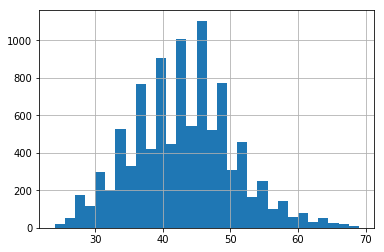

'0.0% de registros nulos'

'Variância: 0.009893085631781297'

qtd   pc
0  9809 0.99
1    99 0.01

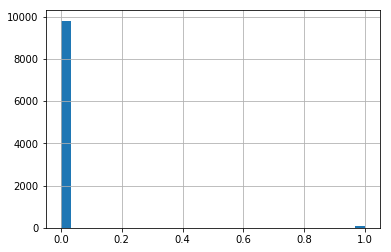

'0.0% de registros nulos'

'Variância: 0.0005044389609805372'

qtd   pc
0.00  9903 1.00
1.00     5 0.00

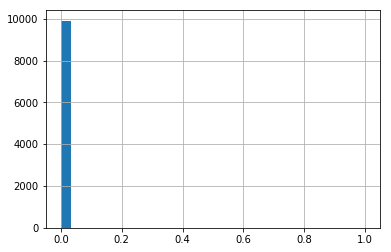

'0.0% de registros nulos'

'Variância: 0.0020146995642435677'

qtd   pc
0.00  9888 1.00
1.00    20 0.00

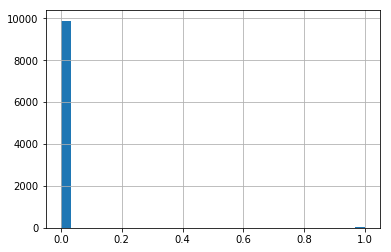

'0.0% de registros nulos'

'Variância: 0.00040359191918017996'

qtd   pc
0.00  9904 1.00
1.00     4 0.00

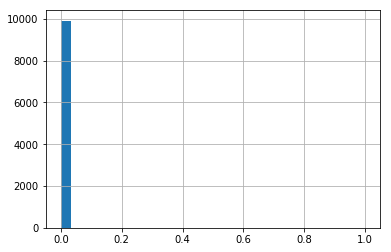

'0.0% de registros nulos'

'Variância: 0.0012097977480435684'

qtd   pc
0.00  9896 1.00
1.00    12 0.00

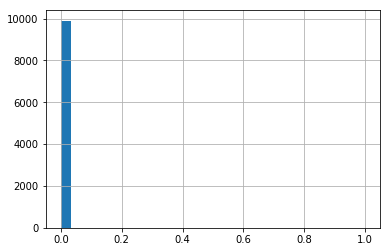

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  9908 1.00

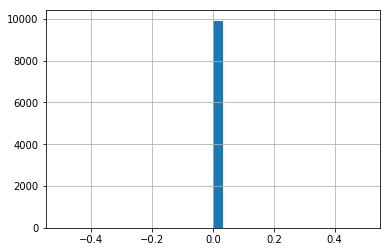

'0.0% de registros nulos'

'Variância: 0.006019648455301776'

qtd   pc
0.00  9848 0.99
1.00    60 0.01

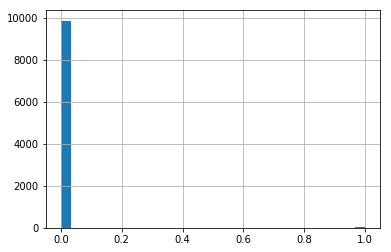

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  9908 1.00

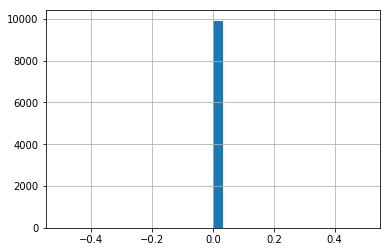

'0.0% de registros nulos'

'Variância: 0.00020183670998579362'

qtd   pc
0.00  9906 1.00
1.00     2 0.00

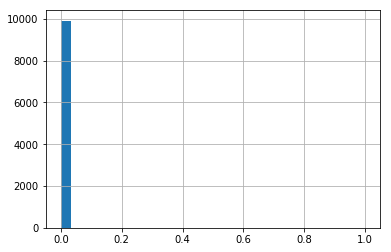

'0.0% de registros nulos'

'Variância: 0.021713440853795767'

qtd   pc
4  9688 0.98
3   220 0.02

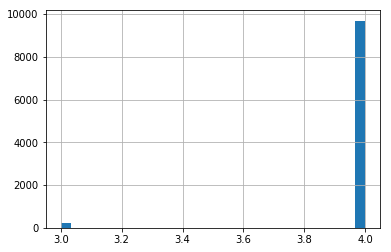

'0.0% de registros nulos'

'Variância: 0.2479248046875'

qtd   pc
1.00  5409 0.55
0.00  4499 0.45

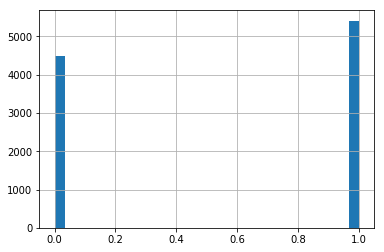

'0.0% de registros nulos'

'Variância: 0.0293731689453125'

qtd   pc
0.00  9608 0.97
1.00   300 0.03

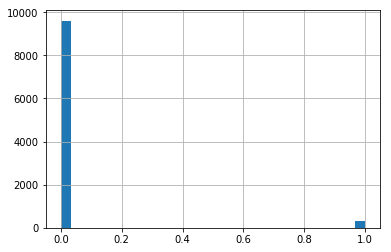

'0.0% de registros nulos'

'Variância: 0.002216339111328125'

qtd   pc
0.00  9886 1.00
1.00    22 0.00

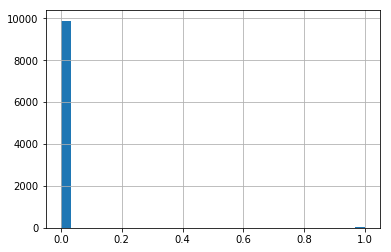

'0.0% de registros nulos'

'Variância: 0.2418212890625'

qtd   pc
0.00  5851 0.59
1.00  4057 0.41

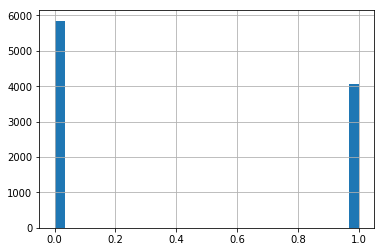

'0.0% de registros nulos'

'Variância: 0.01813061512437082'

qtd   pc
1  9725 0.98
0   183 0.02

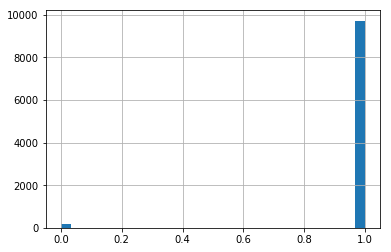

'0.0% de registros nulos'

'Variância: 0.25001544439997664'

qtd   pc
1  4985 0.50
0  4923 0.50

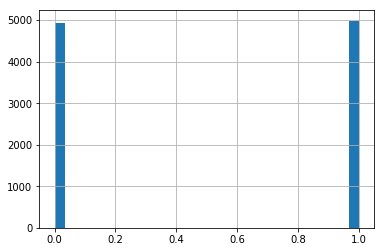

'0.0% de registros nulos'

'Variância: 0.19918141420091792'

qtd   pc
1  7188 0.73
0  2720 0.27

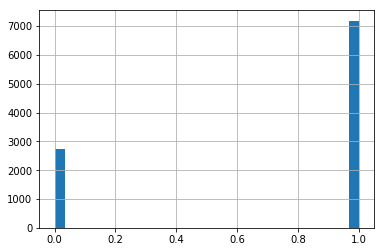

'0.0% de registros nulos'

'Variância: 0.19163770094580443'

qtd   pc
1  7348 0.74
0  2560 0.26

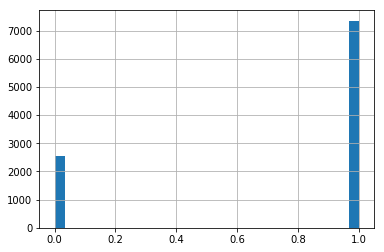

'0.0% de registros nulos'

'Variância: 0.05890489057316615'

qtd   pc
1  9362 0.94
2   313 0.03
0   220 0.02
3    13 0.00

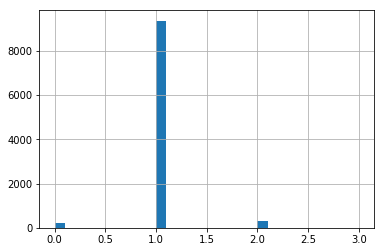

'0.0% de registros nulos'

'Variância: 0.2707247140025165'

qtd   pc
1  5233 0.53
0  4568 0.46
2   103 0.01
3     4 0.00

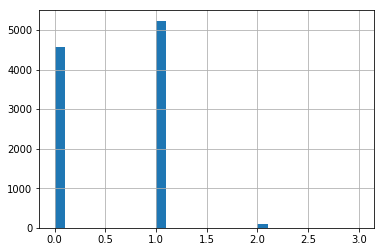

'0.0% de registros nulos'

'Variância: 0.27523909377802985'

qtd   pc
0  5398 0.54
1  4388 0.44
2   118 0.01
3     4 0.00

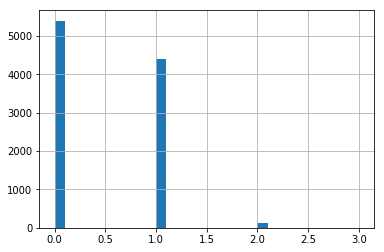

'0.0% de registros nulos'

'Variância: 0.1427312255897489'

qtd   pc
1  8355 0.84
0  1390 0.14
2   159 0.02
3     4 0.00

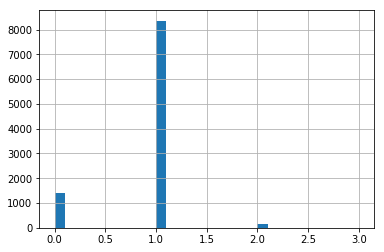

'0.0% de registros nulos'

'Variância: 0.10729689218329577'

qtd   pc
0  8737 0.88
1  1160 0.12
2    11 0.00

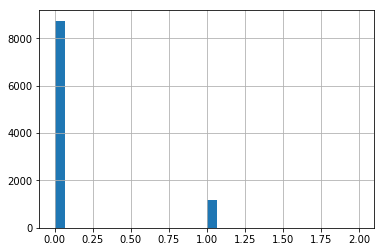

'0.0% de registros nulos'

'Variância: 5.7710933726441525'

qtd   pc
2007  5935 0.60
2009  1660 0.17
2013  1148 0.12
2011   617 0.06
2014   548 0.06

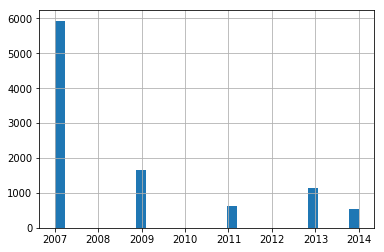

'0.0% de registros nulos'

'Variância: 0.10381028832575735'

qtd   pc
1  8852 0.89
0   843 0.09
2   209 0.02
3     4 0.00

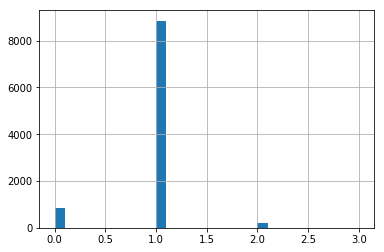

'0.0% de registros nulos'

'Variância: 0.031742225303314366'

qtd   pc
0  9586 0.97
1   321 0.03
2     1 0.00

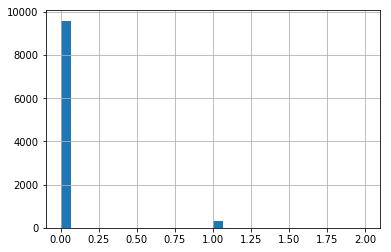

'0.0% de registros nulos'

'Variância: 0.012463213089646511'

qtd   pc
0  9786 0.99
1   121 0.01
2     1 0.00

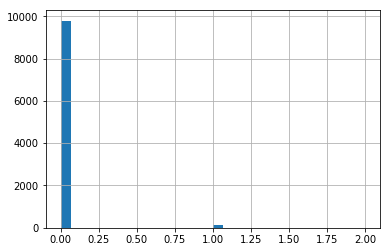

'0.0% de registros nulos'

'Variância: 0.015993582872184876'

qtd   pc
0  9750 0.98
1   157 0.02
2     1 0.00

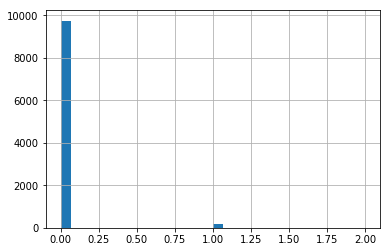

'0.0% de registros nulos'

'Variância: 0.0026175201680839724'

qtd   pc
0  9882 1.00
1    26 0.00

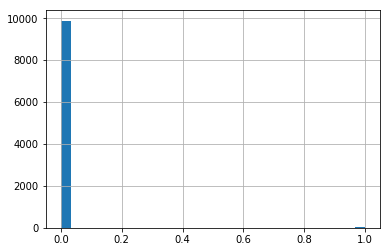

'0.0% de registros nulos'

'Variância: 0.0003027245021819595'

qtd   pc
0  9905 1.00
1     3 0.00

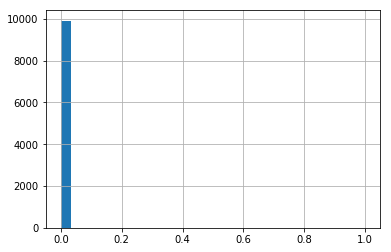

'0.0% de registros nulos'

'Variância: 0.004821586821224225'

qtd   pc
0  9860 1.00
1    48 0.00

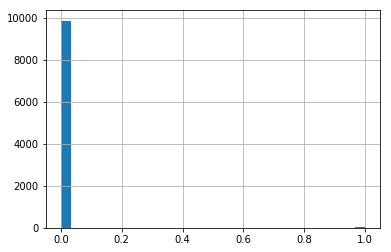

'0.0% de registros nulos'

'Variância: 0.00020183670998583138'

qtd   pc
0  9906 1.00
1     2 0.00

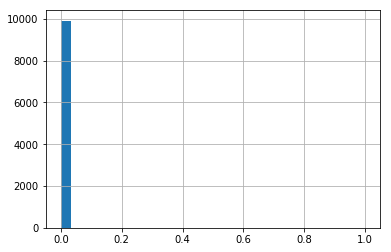

'0.0% de registros nulos'

'Variância: 0.012064429717160874'

qtd   pc
0  9787 0.99
1   121 0.01

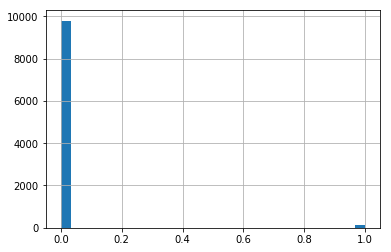

'0.0% de registros nulos'

'Variância: 0.2275592868338446'

qtd   pc
0  6439 0.65
1  3469 0.35

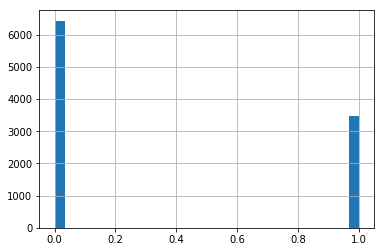

'0.0% de registros nulos'

'Variância: 0.21172270504875812'

qtd   pc
0  6893 0.70
1  3015 0.30

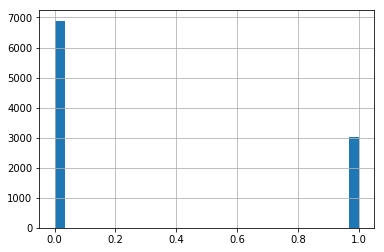

'0.0% de registros nulos'

'Variância: 0.042716551372251235'

qtd   pc
0  9465 0.96
1   443 0.04

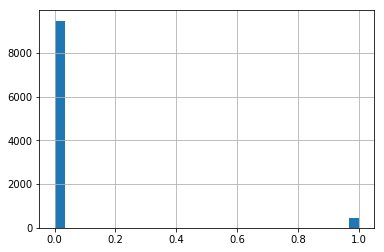

'0.0% de registros nulos'

'Variância: 0.2078775486469055'

qtd   pc
0  6988 0.71
1  2920 0.29

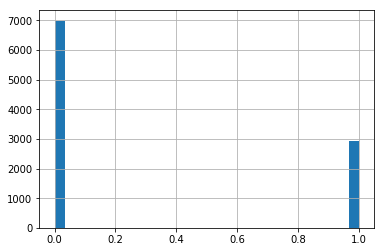

'0.0% de registros nulos'

'Variância: 0.0051213772949145675'

qtd   pc
0  9857 0.99
1    51 0.01

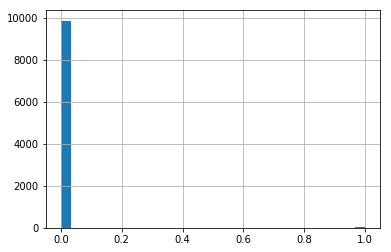

'0.0% de registros nulos'

'Variância: 0.0010083685420148186'

qtd   pc
0  9898 1.00
1    10 0.00

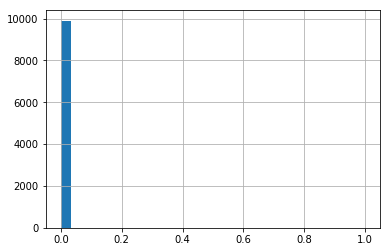

'89.28138877674606% de registros nulos'

'Variância: 0.06811610409111936'

qtd   pc
0.00  984 0.10
1.00   78 0.01

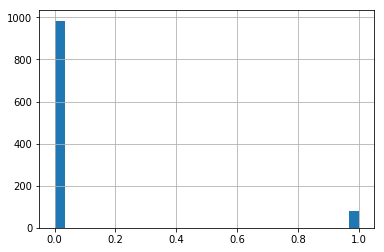

'89.28138877674606% de registros nulos'

'Variância: 7.339940645129359'

count   1062.00
mean       0.76
std        2.71
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       21.00
Name: NU_QTD_TURMAS_MEDIO_2007, dtype: float64

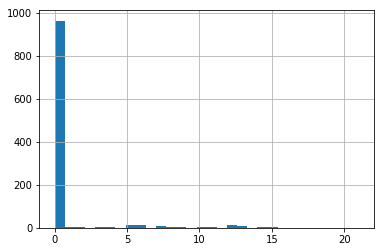

'89.28138877674606% de registros nulos'

'Variância: 0.058339590089299266'

qtd   pc
0.00  996 0.10
1.00   66 0.01

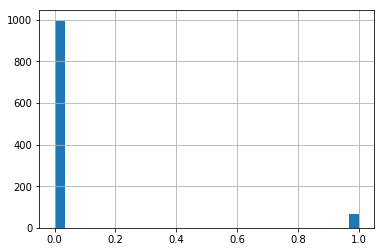

'89.28138877674606% de registros nulos'

'Variância: 11.599738014984196'

count   1062.00
mean       1.09
std        3.41
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       25.00
Name: NU_QTD_TURMAS_MEDIO_2009, dtype: float64

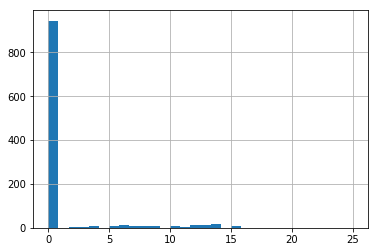

'89.28138877674606% de registros nulos'

'Variância: 0.05272448441668317'

qtd   pc
0.00  1006 0.10
1.00    55 0.01
2.00     1 0.00

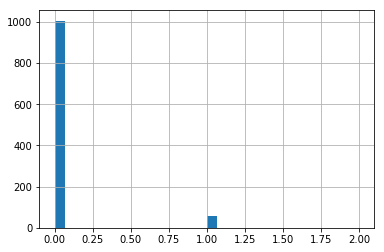

'89.28138877674606% de registros nulos'

'Variância: 14.061083687883109'

count   1062.00
mean       1.27
std        3.75
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       28.00
Name: NU_QTD_TURMAS_MEDIO_2011, dtype: float64

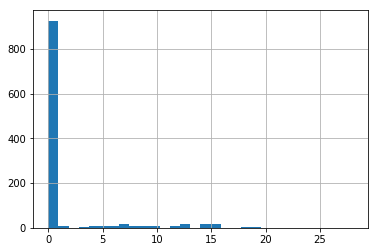

'89.28138877674606% de registros nulos'

'Variância: 0.06080768063387603'

qtd   pc
0.00  993 0.10
1.00   69 0.01

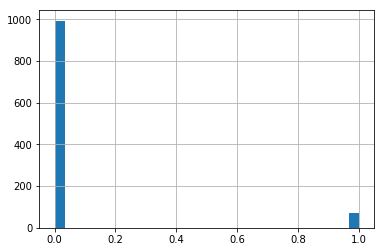

'89.28138877674606% de registros nulos'

'Variância: 11.1603060751768'

count   1062.00
mean       1.15
std        3.34
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       28.00
Name: NU_QTD_TURMAS_MEDIO_2013, dtype: float64

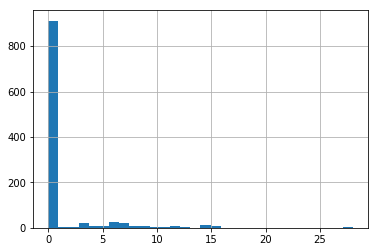

'89.28138877674606% de registros nulos'

'Variância: 0.09491809418325721'

qtd   pc
0.00  981 0.10
1.00   77 0.01
3.00    3 0.00
2.00    1 0.00

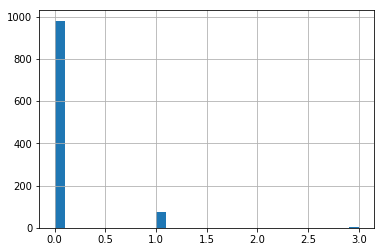

'89.28138877674606% de registros nulos'

'Variância: 16.230487352478413'

count   1062.00
mean       1.55
std        4.03
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       28.00
Name: NU_QTD_TURMAS_MEDIO_2014, dtype: float64

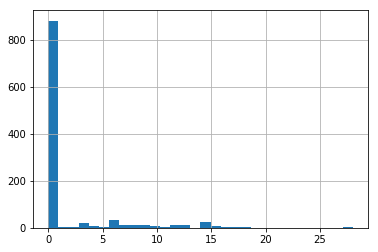

'89.28138877674606% de registros nulos'

'Variância: 0.07240530998897592'

qtd   pc
0.00  982 0.10
1.00   79 0.01
2.00    1 0.00

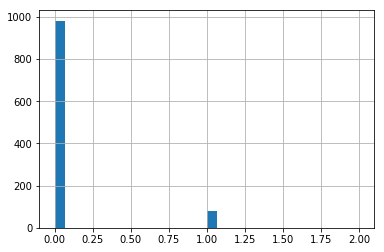

'89.28138877674606% de registros nulos'

'Variância: 13.259900317896474'

count   1062.00
mean       1.45
std        3.64
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       25.00
Name: NU_QTD_TURMAS_MEDIO_2015, dtype: float64

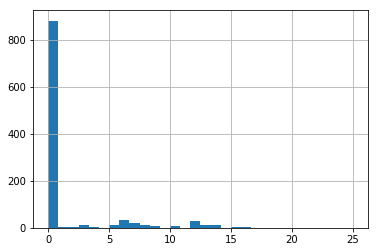

'0.0% de registros nulos'

'Variância: 0.7776573546985432'

qtd   pc
2  4006 0.40
1  3623 0.37
0  1117 0.11
3   990 0.10
4   172 0.02

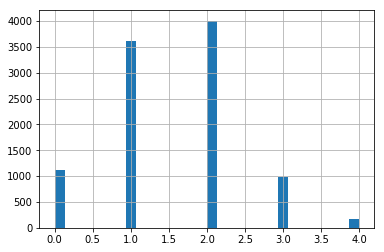

'0.0% de registros nulos'

'Variância: 0.06995737590109899'

qtd   pc
1  9185 0.93
2   715 0.07
3     8 0.00

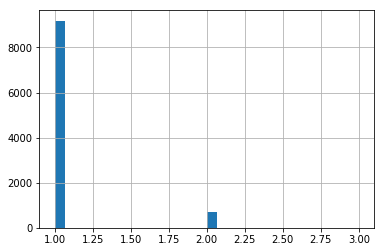

In [251]:
explora_df(prof_pbc_df15)

In [15]:
prof_pbc_df15.to_csv(f'{PATH_DF_CSV}dados_prof.csv')

In [16]:
prof_pbc_df15 = ajusta_colunas_int_df_inep(pd.read_csv(f'{PATH_DF_CSV}dados_prof.csv',index_col='CO_PESSOA_FISICA'))
prof_pbc_df15.head()

NU_IDADE_REFERENCIA  IN_POSSUI_NEC_ESPECIAL  IN_CEGUEIRA  \
CO_PESSOA_FISICA                                                             
115161698917                       41                       0         0.00   
115111512003                       54                       0         0.00   
115075856674                       41                       0         0.00   
115075569420                       47                       0         0.00   
115076358503                       41                       0         0.00   

                  IN_BAIXA_VISAO  IN_SURDEZ  IN_DEF_AUDITIVA  \
CO_PESSOA_FISICA                                               
115161698917                0.00       0.00             0.00   
115111512003                0.00       0.00             0.00   
115075856674                0.00       0.00             0.00   
115075569420                0.00       0.00             0.00   
115076358503                0.00       0.00             0.00   

                  IN_SURDOCEGUEIRA  IN_DEF_FISICA  IN_DEF_INTELECTUAL  \
CO_PESSOA_FISICA                                                        
115161698917                  0.00           0.00                0.00   
115111512003                  0.00           0.00                0.00   
115075856674                  0.00           0.00                0.00   
115075569420                  0.00           0.00                0.00   
115076358503                  0.00           0.00                0.00   

                  IN_DEF_MULTIPLA         ...           \
CO_PESSOA_FISICA                          ...            
115161698917                 0.00         ...            
115111512003                 0.00         ...            
115075856674                 0.00         ...            
115075569420                 0.00         ...            
115076358503                 0.00         ...            

                  NU_QTD_TURMAS_INFANT_2011  NU_QTD_TURMAS_MEDIO_2011  \
CO_PESSOA_FISICA                                                        
115161698917                           0.00                      0.00   
115111512003                           0.00                      0.00   
115075856674                           0.00                      0.00   
115075569420                           0.00                      0.00   
115076358503                           0.00                      0.00   

                  NU_QTD_TURMAS_INFANT_2013  NU_QTD_TURMAS_MEDIO_2013  \
CO_PESSOA_FISICA                                                        
115161698917                           1.00                      0.00   
115111512003                           0.00                      3.00   
115075856674                           0.00                      0.00   
115075569420                           0.00                      0.00   
115076358503                           0.00                      0.00   

                  NU_QTD_TURMAS_INFANT_2014  NU_QTD_TURMAS_MEDIO_2014  \
CO_PESSOA_FISICA                                                        
115161698917                           0.00                      0.00   
115111512003                           0.00                      5.00   
115075856674                           0.00                      0.00   
115075569420                           0.00                      0.00   
115076358503                           1.00                      0.00   

                  NU_QTD_TURMAS_INFANT_2015  NU_QTD_TURMAS_MEDIO_2015  \
CO_PESSOA_FISICA                                                        
115161698917                           0.00                      0.00   
115111512003                           0.00                      7.00   
115075856674                           0.00                      0.00   
115075569420                           0.00                      0.00   
115076358503                           1.00                      0.00   

                  CLSC_QTL_NU_IDADE_REFERENCIA  NU_QTD_

In [40]:
#inicia o feature selection com a variancia e nulos
VARIANCIA_MINIMA = 0.05
PC_MAX_MODA = 0.9
PC_MAX_MODA_NU = 0.6
MAXIMO_DE_NULOS  = 0.05
prof = prof_pbc_df15.copy()
qtd_ttl = prof_pbc_df15.shape[0]
cd = []
for c in prof_pbc_df15.columns:
    s = prof_pbc_df15[c]
    pc_nulos = s.isnull().sum() / qtd_ttl * 100
    pc_moda = prof_pbc_df15.loc[s == s.mode()[0]].shape[0]/qtd_ttl
    if pc_moda > PC_MAX_MODA or (c.startswith('NU') and pc_moda > PC_MAX_MODA_NU) or pc_nulos > MAXIMO_DE_NULOS:
        #display(f'{c} - {pc_moda}')
        cd.append(c)
display(f'Serao apagadas {len(cd)} de {len(prof.columns)} colunas.')    
prof.drop(cd,axis=1,inplace=True)
display(' '.join(prof.columns))
display(prof.var())
display(prof.head())

'Serao apagadas 41 de 54 colunas.'

'NU_IDADE_REFERENCIA IN_ESPECIALIZACAO IN_POS_NENHUM IN_NASCEU_DF IN_MORA_DF IN_MULHER NU_QTD_GRAD_PBC NU_QTD_GRAD_PRIV NU_ANO_PRIM_CENSO TP_COR_RACA_0 TP_COR_RACA_1 TP_COR_RACA_3 CLSC_QTL_NU_IDADE_REFERENCIA'

NU_IDADE_REFERENCIA            57.09
IN_ESPECIALIZACAO               0.25
IN_POS_NENHUM                   0.24
IN_NASCEU_DF                    0.25
IN_MORA_DF                      0.20
IN_MULHER                       0.19
NU_QTD_GRAD_PBC                 0.27
NU_QTD_GRAD_PRIV                0.28
NU_ANO_PRIM_CENSO               5.77
TP_COR_RACA_0                   0.23
TP_COR_RACA_1                   0.21
TP_COR_RACA_3                   0.21
CLSC_QTL_NU_IDADE_REFERENCIA    0.78
dtype: float32

NU_IDADE_REFERENCIA  IN_ESPECIALIZACAO  IN_POS_NENHUM  \
CO_PESSOA_FISICA                                                          
115161698917                       41               0.00           1.00   
115111512003                       54               1.00           0.00   
115075856674                       41               1.00           0.00   
115075569420                       47               1.00           0.00   
115076358503                       41               1.00           0.00   

                  IN_NASCEU_DF  IN_MORA_DF  IN_MULHER  NU_QTD_GRAD_PBC  \
CO_PESSOA_FISICA                                                         
115161698917                 1           1          1                0   
115111512003                 0           0          0                0   
115075856674                 0           1          1                1   
115075569420                 0           1          1                0   
115076358503                 1           1          1                1   

                  NU_QTD_GRAD_PRIV  NU_ANO_PRIM_CENSO  TP_COR_RACA_0  \
CO_PESSOA_FISICA                                                       
115161698917                     2               2009              1   
115111512003                     2               2007              0   
115075856674                     0               2007              1   
115075569420                     1               2007              1   
115076358503                     0               2007              0   

                  TP_COR_RACA_1  TP_COR_RACA_3  CLSC_QTL_NU_IDADE_REFERENCIA  
CO_PESSOA_FISICA                                                              
115161698917                  0              0                             1  
115111512003                  0              0                             3  
115075856674                  0              0                             1  
115075569420                  0              0                             2  
115076358503                  1              0                             1

In [41]:
prof.drop(['CLSC_QTL_NU_IDADE_REFERENCIA','IN_POS_NENHUM'],axis=1,inplace=True)

In [34]:
vs = []
for i in range(2,9):
    km = kmeans_professores(prof,i)
    p = pd.Series(km.labels_).value_counts()
    v = np.min(p)/np.max(p)    
    vs.append(v)
    display(f'{i} - {v}')
    display(p)

display(f'O conjunto com a menor diferenca entre o maximo e o minimo foi {np.argmax(vs) + 2} com {max(vs)}.')

'2 - 0.5387482528342911'

0    6439
1    3469
dtype: int64

'3 - 0.8267068823690704'

1    3647
2    3246
0    3015
dtype: int64

'4 - 0.6432360742705571'

3    3016
1    2920
0    2032
2    1940
dtype: int64

'5 - 0.5684931506849316'

1    2920
4    1895
0    1759
3    1674
2    1660
dtype: int64

'6 - 0.3711442786069652'

0    3015
2    1700
4    1421
5    1357
3    1296
1    1119
dtype: int64

'7 - 0.4152112676056338'

5    1775
0    1731
4    1634
1    1479
6    1354
2    1198
3     737
dtype: int64

'8 - 0.6419270833333334'

5    1536
0    1508
1    1479
7    1123
4    1112
3    1094
6    1070
2     986
dtype: int64

'O conjunto com a menor diferenca entre o maximo e o minimo foi 3 com 0.8267068823690704.'

In [42]:
p_km = prof.copy()

In [44]:
km = kmeans_professores(p_km,8)
display(pd.Series(km.labels_).value_counts())
prof['rotulos'] = pd.Categorical(km.labels_);
prof.rotulos.value_counts()

5    1536
0    1508
1    1479
7    1123
4    1112
3    1094
6    1070
2     986
dtype: int64

5    1536
0    1508
1    1479
7    1123
4    1112
3    1094
6    1070
2     986
Name: rotulos, dtype: int64

Base de TREINO
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1118
          1       1.00      1.00      1.00      1108
          2       1.00      1.00      1.00       740
          3       1.00      1.00      1.00       813
          4       1.00      1.00      1.00       853
          5       1.00      1.00      1.00      1163
          6       1.00      1.00      1.00       801
          7       1.00      1.00      1.00       835

avg / total       1.00      1.00      1.00      7431

Base de TESTE
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       390
          1       1.00      1.00      1.00       371
          2       1.00      1.00      1.00       246
          3       1.00      1.00      1.00       281
          4       1.00      1.00      1.00       259
          5       1.00      1.00      1.00       373
          6       1.00      1.00      1.00       269
          7  

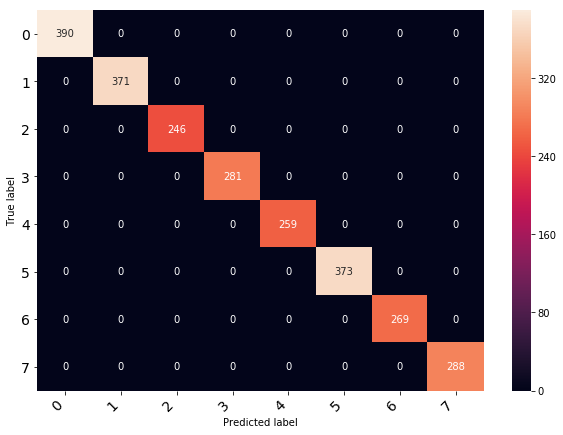

Nao foi possivel mostrar a ROC.
Feature ranking:
1. feature IN_NASCEU_DF (0.300724)
2. feature IN_ESPECIALIZACAO (0.256222)
3. feature TP_COR_RACA_1 (0.153333)
4. feature TP_COR_RACA_0 (0.133762)
5. feature TP_COR_RACA_3 (0.110084)
6. feature NU_IDADE_REFERENCIA (0.029686)
7. feature NU_ANO_PRIM_CENSO (0.004820)
8. feature NU_QTD_GRAD_PRIV (0.003305)
9. feature NU_QTD_GRAD_PBC (0.003234)
10. feature IN_MULHER (0.002784)
11. feature IN_MORA_DF (0.002045)


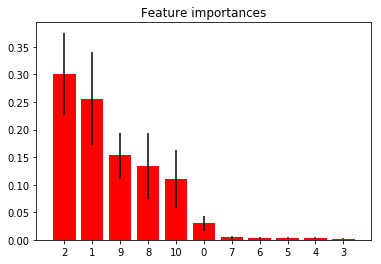

In [45]:
ft, rf = processa_tudo(prof,False,'rotulos',vai_escalar=True);

In [47]:
QTD_FEATURES_IMPORTANTES = 6

/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


Base de TREINO
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1118
          1       1.00      1.00      1.00      1108
          2       1.00      1.00      1.00       740
          3       1.00      1.00      1.00       813
          4       1.00      1.00      1.00       853
          5       1.00      1.00      1.00      1163
          6       1.00      1.00      1.00       801
          7       1.00      1.00      1.00       835

avg / total       1.00      1.00      1.00      7431

Base de TESTE
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       390
          1       1.00      1.00      1.00       371
          2       1.00      1.00      1.00       246
          3       1.00      1.00      1.00       281
          4       1.00      1.00      1.00       259
          5       1.00      1.00      1.00       373
          6       1.00      1.00      1.00       269
          7  

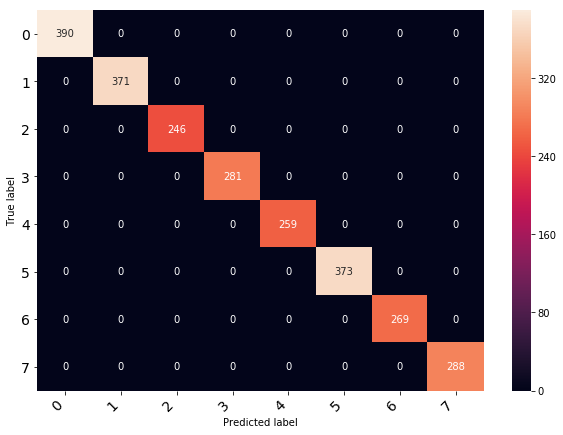

Nao foi possivel mostrar a ROC.
Feature ranking:
1. feature IN_NASCEU_DF (0.313497)
2. feature IN_ESPECIALIZACAO (0.250116)
3. feature TP_COR_RACA_1 (0.156198)
4. feature TP_COR_RACA_3 (0.147500)
5. feature TP_COR_RACA_0 (0.108707)
6. feature NU_IDADE_REFERENCIA (0.023982)


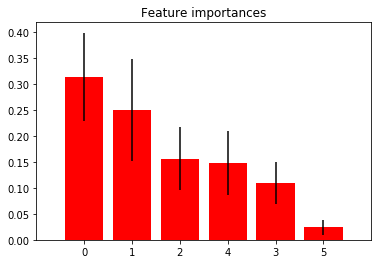

In [48]:
processa_tudo(prof[ft[:QTD_FEATURES_IMPORTANTES]+['rotulos']],False,'rotulos');

In [49]:
prof = prof[ft[:QTD_FEATURES_IMPORTANTES]+['rotulos']]

In [50]:
prof.head()

IN_NASCEU_DF  IN_ESPECIALIZACAO  TP_COR_RACA_1  \
CO_PESSOA_FISICA                                                   
115161698917                 1               0.00              0   
115111512003                 0               1.00              0   
115075856674                 0               1.00              0   
115075569420                 0               1.00              0   
115076358503                 1               1.00              1   

                  TP_COR_RACA_0  TP_COR_RACA_3  NU_IDADE_REFERENCIA rotulos  
CO_PESSOA_FISICA                                                             
115161698917                  1              0                   41       6  
115111512003                  0              0                   54       2  
115075856674                  1              0                   41       0  
115075569420                  1              0                   47       0  
115076358503                  0              0                   41       1

rotulos
0   0.47
1   1.00
2   0.00
3   0.00
4   0.55
5   0.00
6   1.00
7   1.00
Name: IN_NASCEU_DF, dtype: float64

4985

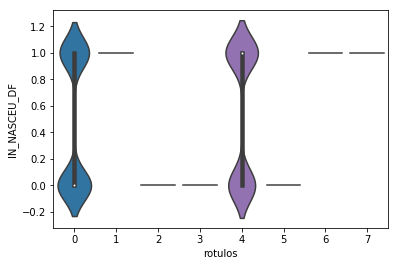

rotulos
0   1.00
1   0.56
2   1.00
3   0.00
4   0.00
5   0.62
6   0.00
7   1.00
Name: IN_ESPECIALIZACAO, dtype: float16

5410.0

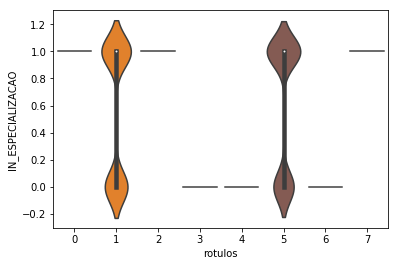

rotulos
0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
Name: TP_COR_RACA_1, dtype: int8

3015

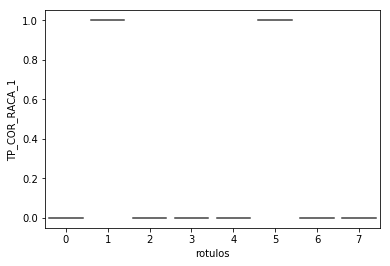

rotulos
0   1.00
1   0.00
2   0.00
3   0.91
4   0.00
5   0.00
6   0.90
7   0.00
Name: TP_COR_RACA_0, dtype: float64

3469

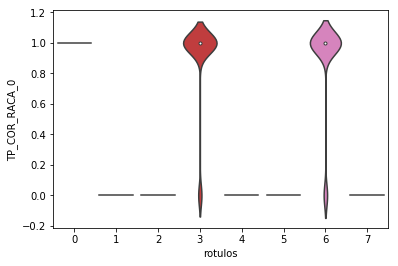

rotulos
0   0.00
1   0.00
2   0.86
3   0.00
4   1.00
5   0.00
6   0.00
7   0.85
Name: TP_COR_RACA_3, dtype: float64

2920

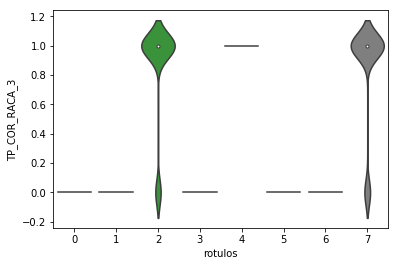

count  mean  std   min   25%   50%   75%   max
rotulos                                                 
0       1508.00 43.80 7.09 26.00 39.00 44.00 48.00 69.00
1       1479.00 39.93 6.43 25.00 35.00 40.00 45.00 69.00
2        986.00 44.89 7.17 26.00 40.00 45.00 50.00 68.00
3       1094.00 46.01 7.89 24.00 41.00 46.00 51.00 68.00
4       1112.00 41.26 7.93 25.00 35.00 42.00 47.00 68.00
5       1536.00 45.51 7.96 25.00 40.00 46.00 50.00 69.00
6       1070.00 40.22 6.60 24.00 35.00 40.00 45.00 67.00
7       1123.00 40.50 5.97 25.00 36.00 40.00 45.00 65.00

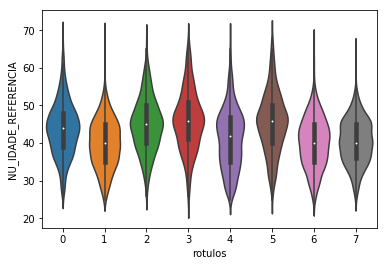

In [51]:
import seaborn as sns
for c in prof.columns[:-1]:
    display(HTML(f'<h2>{c}</h2>'))
    if prof[c].dtype == bool:
        prof[c] = prof[c].astype(np.int8)
    sns.violinplot(y=c,x='rotulos',data=prof)
    if c.startswith('NU'):
        display(prof.groupby('rotulos')[c].describe())
    elif c.startswith('CLSC'):
        sns.heatmap(prof.pivot_table(index=c,columns='rotulos',values='IN_ESPECIALIZACAO',aggfunc='count'), annot=True, fmt="d",cmap='RdYlGn')
        plt.show()
    else:
        display(prof.groupby('rotulos')[c].mean())
        display(prof[c].sum())
        
    plt.show()

<table><tr>
    <td><img src='img/Eliza_Simpson_Detective.png' /></td>
<td>
<h3>Elementar...</h3>
<ul>
<li><strong>Classe 0 - 1.508 professores :</strong>
<ul>
<li>Segundo maior grupo</li>
<li>47% nasceu no DF</li>
<li>Possui especializa&ccedil;&atilde;o</li>
<li>Ra&ccedil;a/cor n&atilde;o declarada</li>
</ul>
</li>
<li><strong>Classe 1 - 1.479 professores:</strong>
<ul>
<li>Nasceu no DF</li>
<li>56% possui especializa&ccedil;&atilde;o</li>
<li>Ra&ccedil;a/cor branca</li>
<li>Grupo mais jovem</li>
</ul>
</li>
<li><strong>Classe 2 - 986 professores:</strong>
<ul>
<li>Menor grupo</li>
<li>N&atilde;o nasceu no DF</li>
<li>Possui especializa&ccedil;&atilde;o</li>
<li>86% Ra&ccedil;a/cor parda</li>
</ul>
</li>
<li><strong>Classe 3 - 1.094 professores:</strong>
<ul>
<li>N&atilde;o nasceu no DF</li>
<li>N&atilde;o possui especializa&ccedil;&atilde;o</li>
<li>91% Ra&ccedil;a/cor n&atilde;o declarada</li>
<li>Grupo mais velho</li>
<li></li>
</ul>
</li>
<li><strong>Classe 4 - 1.112 professores:</strong>
<ul>
<li>55% nasceu no DF</li>
<li>N&atilde;o possui especializa&ccedil;&atilde;o</li>
<li>Ra&ccedil;a/cor parda</li>
<li></li>
</ul>
</li>
<li><strong>Classe 5 - 1.536 professores:</strong>
<ul>
<li>Maior grupo</li>
<li>N&atilde;o nasceu no DF</li>
<li>62% possui especializa&ccedil;&atilde;o</li>
<li>Ra&ccedil;a/cor branca</li>
<li>Segundo grupo mais velho</li>
<li></li>
</ul>
</li>
<li><strong>Classe 6 - 1.070 professores:</strong>
<ul>
<li>Segundo menor grupo</li>
<li>Nasceu no DF</li>
<li>N&atilde;o possui especializa&ccedil;&atilde;o</li>
<li>90% Ra&ccedil;a/cor n&atilde;o declarada</li>
<li>Segundo grupo mais jovem</li>
<li></li>
</ul>
</li>
<li><strong>Classe 7 - 1.123 professores:</strong><br />
<ul>
<li>Nasceu no DF</li>
<li>Possui especializa&ccedil;&atilde;o</li>
<li>85% ra&ccedil;a/cor parda</li>
</ul>
</li>
</ul>
</td>
</tr>
</table>

In [52]:
prof.to_csv(f'{PATH_DF_CSV}prof_feature_mod.csv')

In [5]:
prof = pd.read_csv(f'{PATH_DF_CSV}prof_feature_mod.csv',index_col='CO_PESSOA_FISICA')
prof.head()

IN_NASCEU_DF  IN_ESPECIALIZACAO  TP_COR_RACA_1  \
CO_PESSOA_FISICA                                                   
115161698917                 1               0.00              0   
115111512003                 0               1.00              0   
115075856674                 0               1.00              0   
115075569420                 0               1.00              0   
115076358503                 1               1.00              1   

                  TP_COR_RACA_0  TP_COR_RACA_3  NU_IDADE_REFERENCIA  rotulos  
CO_PESSOA_FISICA                                                              
115161698917                  1              0                   41        6  
115111512003                  0              0                   54        2  
115075856674                  1              0                   41        0  
115075569420                  1              0                   47        0  
115076358503                  0              0                   41        1

<table columns=2 style='width:100%'><tr><td>
<img src='img/escola.jpg'/></td><td> <h2>Escolas.</h2><br/>
    Escolas que estavam em funcionamento em 2015 e 2017.</td></tr></table>

In [6]:
#escolas da rede distrital do DF em funcionamento no ano em questao
fen = lambda df: df.loc[(df.CO_UF == 53) & (df.TP_SITUACAO_FUNCIONAMENTO == 1) & (df.TP_DEPENDENCIA == 2)] 
fev = lambda df: df.loc[(df.FK_COD_ESTADO == 53) & (df.DESC_SITUACAO_FUNCIONAMENTO == 1) & (df.ID_DEPENDENCIA_ADM == 2)] 
l_df_escolas = lambda ano: monta_df_docente(f'{ARQ_PATH}{ano}/ESCOLAS.CSV')
escolas_df = {a : fen(l_df_escolas(a)) if a >= 2015 else fev(l_df_escolas(a)) for a in tqdm(anos_psq)}


100%|██████████| 7/7 [01:34<00:00, 13.44s/it]


## Features das escolas

- Dados da infraestrutura da escola, disponiveis no censo
- Dados da vizinhanca, conseguidos no censo


In [7]:
cols_escola = [
'CO_ENTIDADE',
'IN_LOCAL_FUNC_PREDIO_ESCOLAR', 'TP_OCUPACAO_PREDIO_ESCOLAR',
'IN_LOCAL_FUNC_SALAS_EMPRESA', 'IN_LOCAL_FUNC_SOCIOEDUCATIVO',
'IN_LOCAL_FUNC_UNID_PRISIONAL','IN_LOCAL_FUNC_PRISIONAL_SOCIO',
'IN_LOCAL_FUNC_TEMPLO_IGREJA','IN_LOCAL_FUNC_CASA_PROFESSOR',
'IN_LOCAL_FUNC_GALPAO','IN_LOCAL_FUNC_SALAS_OUTRA_ESC',
'IN_LOCAL_FUNC_OUTROS','IN_PREDIO_COMPARTILHADO',
'IN_AGUA_FILTRADA','IN_AGUA_REDE_PUBLICA',
'IN_AGUA_POCO_ARTESIANO','IN_AGUA_CACIMBA',
'IN_AGUA_FONTE_RIO', 'IN_AGUA_INEXISTENTE',
'IN_ENERGIA_REDE_PUBLICA', 'IN_ENERGIA_GERADOR',
'IN_ENERGIA_OUTROS', 'IN_ENERGIA_INEXISTENTE',
'IN_ESGOTO_REDE_PUBLICA','IN_ESGOTO_FOSSA',
'IN_ESGOTO_INEXISTENTE','IN_LIXO_COLETA_PERIODICA',
'IN_LIXO_QUEIMA','IN_LIXO_JOGA_OUTRA_AREA',
'IN_LIXO_RECICLA','IN_LIXO_ENTERRA',
'IN_LIXO_OUTROS','IN_SALA_DIRETORIA',
'IN_SALA_PROFESSOR','IN_LABORATORIO_INFORMATICA',
'IN_LABORATORIO_CIENCIAS','IN_SALA_ATENDIMENTO_ESPECIAL',
'IN_QUADRA_ESPORTES_COBERTA','IN_QUADRA_ESPORTES_DESCOBERTA',
'IN_QUADRA_ESPORTES','IN_COZINHA', 'IN_BIBLIOTECA','IN_SALA_LEITURA',
'IN_BIBLIOTECA_SALA_LEITURA', 'IN_PARQUE_INFANTIL',
'IN_BERCARIO', 'IN_BANHEIRO_FORA_PREDIO',
'IN_BANHEIRO_DENTRO_PREDIO','IN_BANHEIRO_EI',
'IN_BANHEIRO_PNE','IN_DEPENDENCIAS_PNE',
'IN_SECRETARIA','IN_BANHEIRO_CHUVEIRO',
'IN_REFEITORIO', 'IN_DESPENSA',
'IN_ALMOXARIFADO', 'IN_AUDITORIO',
'IN_PATIO_COBERTO', 'IN_PATIO_DESCOBERTO',
'IN_ALOJAM_ALUNO', 'IN_ALOJAM_PROFESSOR',
'IN_AREA_VERDE', 'IN_LAVANDERIA',
'IN_DEPENDENCIAS_OUTRAS', 'NU_SALAS_EXISTENTES',
'NU_SALAS_UTILIZADAS', 'IN_EQUIP_TV',
'IN_EQUIP_VIDEOCASSETE', 'IN_EQUIP_DVD',
'IN_EQUIP_PARABOLICA', 'IN_EQUIP_COPIADORA',
'IN_EQUIP_RETROPROJETOR', 'IN_EQUIP_IMPRESSORA',
'IN_EQUIP_IMPRESSORA_MULT','IN_EQUIP_SOM',
'IN_EQUIP_MULTIMIDIA','IN_EQUIP_FAX',
'IN_EQUIP_FOTO','IN_COMPUTADOR',
'NU_COMPUTADOR','NU_COMP_ADMINISTRATIVO',
'NU_COMP_ALUNO','IN_INTERNET',
'IN_BANDA_LARGA','NU_FUNCIONARIOS',
'IN_ALIMENTACAO','TP_AEE',
'TP_ATIVIDADE_COMPLEMENTAR', 'IN_FUNDAMENTAL_CICLOS',
'IN_MATERIAL_ESP_QUILOMBOLA', 'IN_MATERIAL_ESP_INDIGENA',
'IN_MATERIAL_ESP_NAO_UTILIZA', 'IN_EDUCACAO_INDIGENA',
'IN_BRASIL_ALFABETIZADO', 'IN_FINAL_SEMANA',
'IN_FORMACAO_ALTERNANCIA'
]

In [8]:
fte = escolas_df[2015].copy()[cols_escola].drop_duplicates()
fte.shape

(660, 96)

In [9]:
fte['NU_PCT_SALAS_UTILIZADAS'] = fte.NU_SALAS_UTILIZADAS/fte.NU_SALAS_EXISTENTES
cd = ['NU_SALAS_UTILIZADAS']
fte['NU_PROP_FUNS_SALAS_UTZD'] = fte.NU_FUNCIONARIOS/fte.NU_SALAS_UTILIZADAS
fte['NU_PROP_CPU_SALAS_UTZD'] = fte.NU_COMPUTADOR/fte.NU_SALAS_UTILIZADAS
fte['NU_PRIM_ANO_CENSO'] = 0
for a in anos_psq[:-1]:
    cp = 'CO_PESSOA_FISICA' if a >= 2015 else 'FK_COD_DOCENTE'
    ce = 'CO_ENTIDADE' if a >= 2015 else 'PK_COD_ENTIDADE'
    np = dfs[a].loc[dfs[a][ce].isin(escolas_df[a][ce].values)].groupby(ce)[[cp]].nunique().reset_index()
    np.columns = ['CO_ENTIDADE','qtd']
    fte[f'NU_TTL_PROF_{a}'] = fte.merge(np,on='CO_ENTIDADE',how='left')['qtd'].values
    fte.loc[fte.CO_ENTIDADE.isin(escolas_df[a][ce]) & fte.NU_PRIM_ANO_CENSO == 0,'NU_PRIM_ANO_CENSO'] = a

fte['NU_DIF_QTD_DOCENTES_13_14'] = fte[f'NU_TTL_PROF_2013'] - fte[f'NU_TTL_PROF_2014'] 
fte['NU_DIF_QTD_DOCENTES_14_15'] = fte[f'NU_TTL_PROF_2014'] - fte[f'NU_TTL_PROF_2015'] 
fte['NU_PROP_PROF_FUNC_2015'] = fte.NU_TTL_PROF_2015 / fte.NU_FUNCIONARIOS



In [10]:
fte.head()

CO_ENTIDADE  IN_LOCAL_FUNC_PREDIO_ESCOLAR  TP_OCUPACAO_PREDIO_ESCOLAR  \
45       53014294                          1.00                        1.00   
244      53004167                          1.00                        1.00   
381      53002296                          1.00                        1.00   
676      53005759                          1.00                        1.00   
1209     53001567                          1.00                        1.00   

      IN_LOCAL_FUNC_SALAS_EMPRESA  IN_LOCAL_FUNC_SOCIOEDUCATIVO  \
45                           0.00                          0.00   
244                          0.00                          0.00   
381                          0.00                          0.00   
676                          0.00                          0.00   
1209                         0.00                          0.00   

      IN_LOCAL_FUNC_UNID_PRISIONAL  IN_LOCAL_FUNC_PRISIONAL_SOCIO  \
45                            0.00                           0.00   
244                           0.00                           0.00   
381                           0.00                           0.00   
676                           0.00                           0.00   
1209                          0.00                           0.00   

      IN_LOCAL_FUNC_TEMPLO_IGREJA  IN_LOCAL_FUNC_CASA_PROFESSOR  \
45                           0.00                          0.00   
244                          0.00                          0.00   
381                          0.00                          0.00   
676                          0.00                          0.00   
1209                         0.00                          0.00   

      IN_LOCAL_FUNC_GALPAO           ...            NU_PRIM_ANO_CENSO  \
45                    0.00           ...                         2007   
244                   0.00           ...                         2007   
381                   0.00           ...                         2007   
676                   0.00           ...                         2007   
1209                  0.00           ...                         2007   

      NU_TTL_PROF_2007  NU_TTL_PROF_2009  NU_TTL_PROF_2011  NU_TTL_PROF_2013  \
45                 nan             60.00             38.00             35.00   
244                nan             15.00             12.00              7.00   
381                nan              9.00              9.00              8.00   
676                nan              9.00              9.00              6.00   
1209               nan             32.00             23.00             21.00   

      NU_TTL_PROF_2014  NU_TTL_PROF_2015  NU_DIF_QTD_DOCENTES_13_14  \
45               35.00             36.00                       0.00   
244               5.00              5.00                       2.00   
381              12.00             15.00                      -4.00   
676               6.00              7.00                       0.00   
1209             20.00             17.00                       1.00   

      NU_DIF_QTD_DOCENTES_14_15  NU_PROP_PROF_FUNC_2015  
45                        -1.00                    0.37  
244                        0.00                    0.13  
381                       -3.00                    0.35  
676                       -1.00                    0.19  
1209                       3.00                    0.30  

[5 rows x 109 columns]

In [11]:
fte.drop(cd,axis=1,inplace=True)
fte.set_index('CO_ENTIDADE',inplace=True)

'0.0% de registros nulos'

'Variância: 0.00603485107421875'

qtd   pc
1.00  656 0.99
0.00    4 0.01

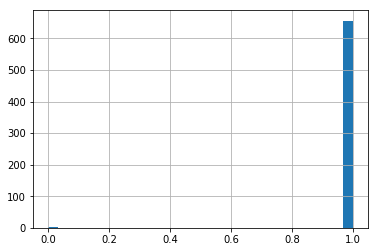

'0.6060606060606061% de registros nulos'

'Variância: 0.105224609375'

qtd   pc
1.00  636 0.96
3.00   17 0.03
2.00    3 0.00

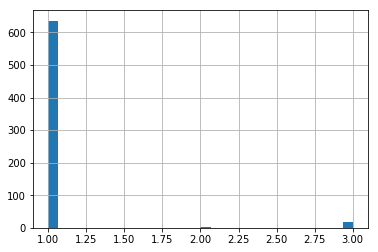

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

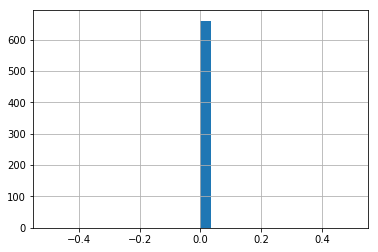

'0.0% de registros nulos'

'Variância: 0.007526397705078125'

qtd   pc
0.00  655 0.99
1.00    5 0.01

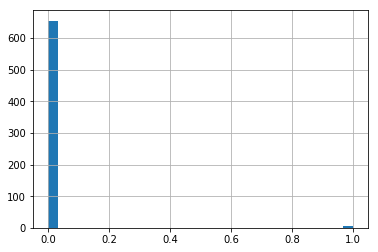

'0.0% de registros nulos'

'Variância: 0.0090179443359375'

qtd   pc
0.00  654 0.99
1.00    6 0.01

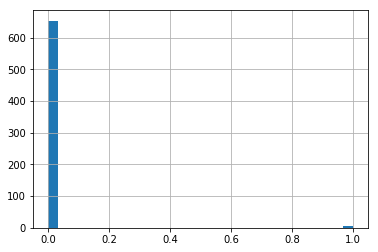

'0.0% de registros nulos'

'Variância: 0.0149383544921875'

qtd   pc
0.00  650 0.98
1.00   10 0.02

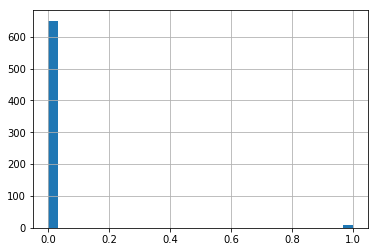

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

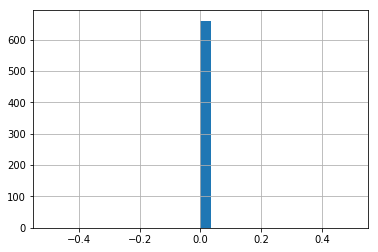

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

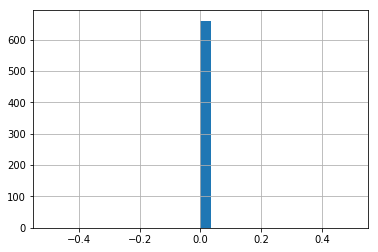

'0.0% de registros nulos'

'Variância: 0.0030269622802734375'

qtd   pc
0.00  658 1.00
1.00    2 0.00

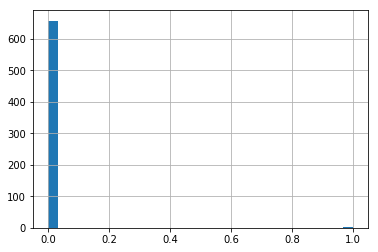

'0.0% de registros nulos'

'Variância: 0.0090179443359375'

qtd   pc
0.00  654 0.99
1.00    6 0.01

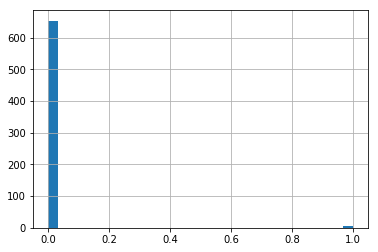

'0.0% de registros nulos'

'Variância: 0.0149383544921875'

qtd   pc
0.00  650 0.98
1.00   10 0.02

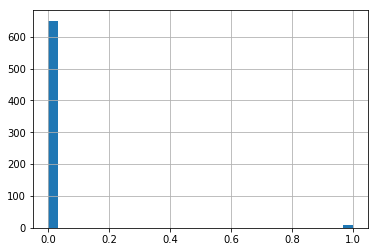

'0.6060606060606061% de registros nulos'

'Variância: 0.029632568359375'

qtd   pc
0.00  636 0.96
1.00   20 0.03

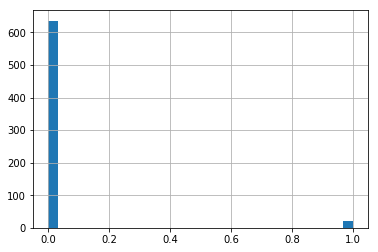

'0.0% de registros nulos'

'Variância: 0.0030269622802734375'

qtd   pc
1.00  658 1.00
0.00    2 0.00

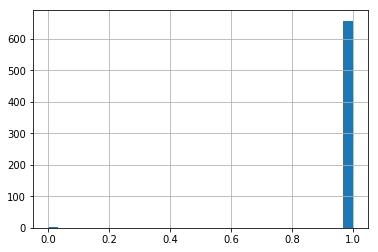

'0.0% de registros nulos'

'Variância: 0.07269287109375'

qtd   pc
1.00  608 0.92
0.00   52 0.08

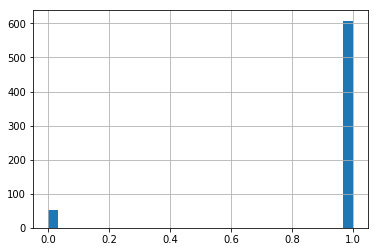

'0.0% de registros nulos'

'Variância: 0.08526611328125'

qtd   pc
0.00  598 0.91
1.00   62 0.09

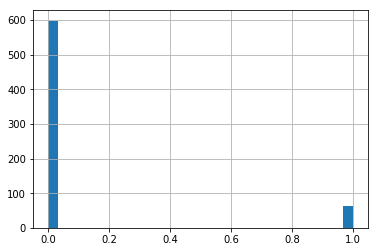

'0.0% de registros nulos'

'Variância: 0.0045318603515625'

qtd   pc
0.00  657 1.00
1.00    3 0.00

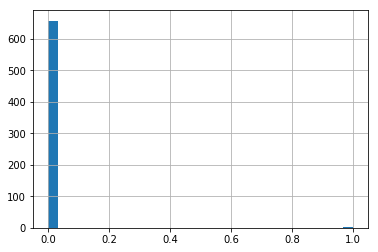

'0.0% de registros nulos'

'Variância: 0.0030269622802734375'

qtd   pc
0.00  658 1.00
1.00    2 0.00

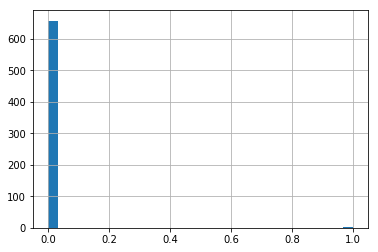

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

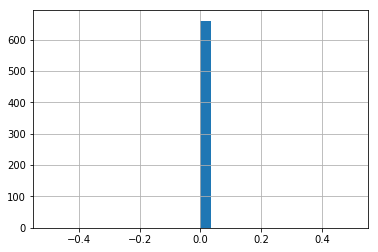

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
1.00  660 1.00

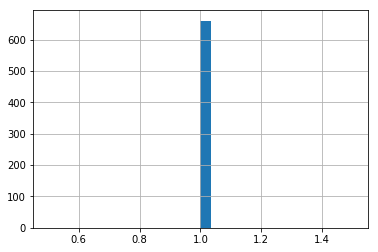

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

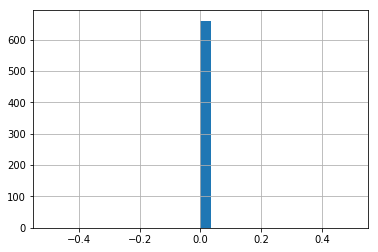

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

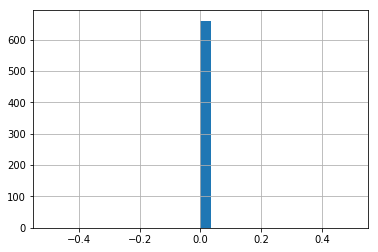

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

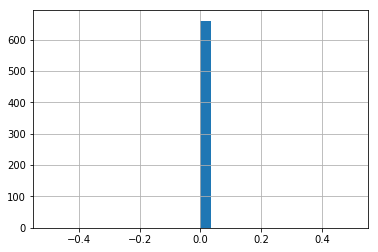

'0.0% de registros nulos'

'Variância: 0.1451416015625'

qtd   pc
1.00  544 0.82
0.00  116 0.18

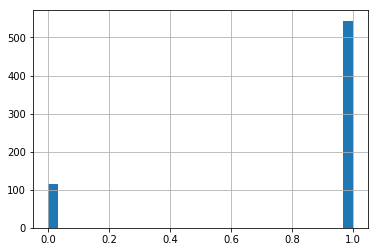

'0.0% de registros nulos'

'Variância: 0.1451416015625'

qtd   pc
0.00  544 0.82
1.00  116 0.18

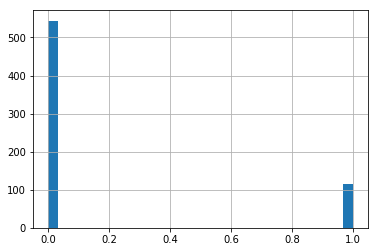

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

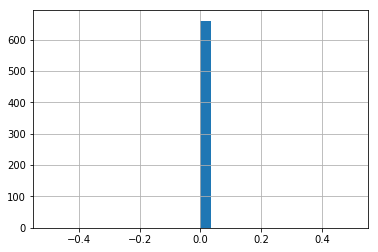

'0.0% de registros nulos'

'Variância: 0.0030269622802734375'

qtd   pc
1.00  658 1.00
0.00    2 0.00

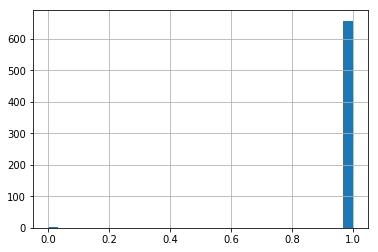

'0.0% de registros nulos'

'Variância: 0.01346588134765625'

qtd   pc
0.00  651 0.99
1.00    9 0.01

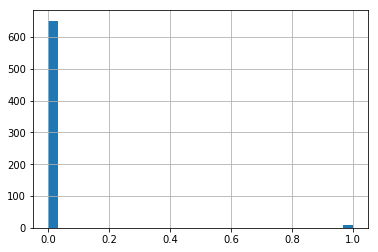

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

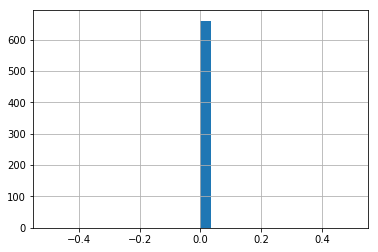

'0.0% de registros nulos'

'Variância: 0.057037353515625'

qtd   pc
0.00  620 0.94
1.00   40 0.06

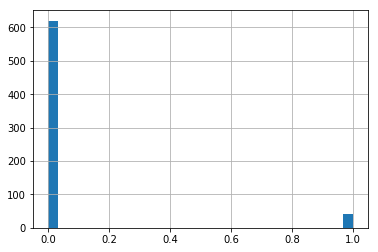

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

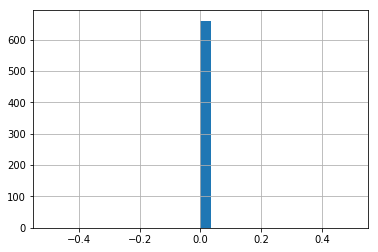

'0.0% de registros nulos'

'Variância: 0.0015153884887695312'

qtd   pc
0.00  659 1.00
1.00    1 0.00

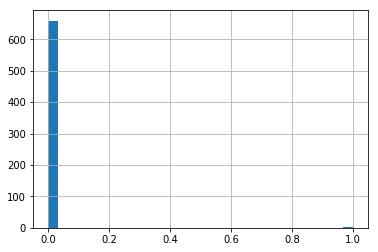

'0.0% de registros nulos'

'Variância: 0.0105133056640625'

qtd   pc
1.00  653 0.99
0.00    7 0.01

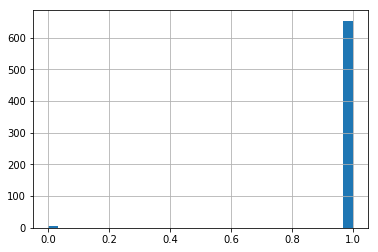

'0.0% de registros nulos'

'Variância: 0.01346588134765625'

qtd   pc
1.00  651 0.99
0.00    9 0.01

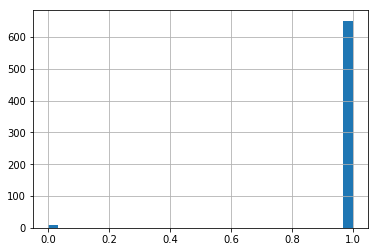

'0.0% de registros nulos'

'Variância: 0.1546630859375'

qtd   pc
1.00  534 0.81
0.00  126 0.19

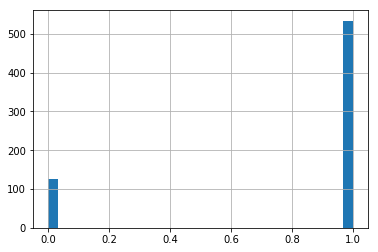

'0.0% de registros nulos'

'Variância: 0.14404296875'

qtd   pc
0.00  545 0.83
1.00  115 0.17

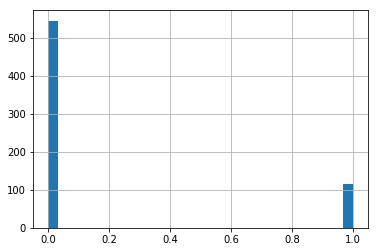

'0.0% de registros nulos'

'Variância: 0.186279296875'

qtd   pc
1.00  497 0.75
0.00  163 0.25

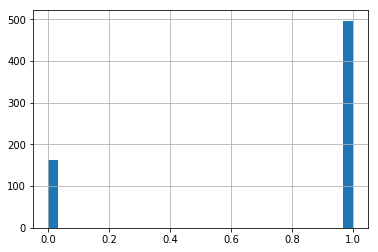

'0.0% de registros nulos'

'Variância: 0.1885986328125'

qtd   pc
0.00  494 0.75
1.00  166 0.25

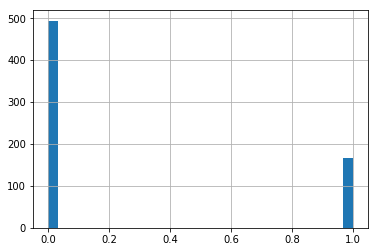

'0.0% de registros nulos'

'Variância: 0.248046875'

qtd   pc
0.00  362 0.55
1.00  298 0.45

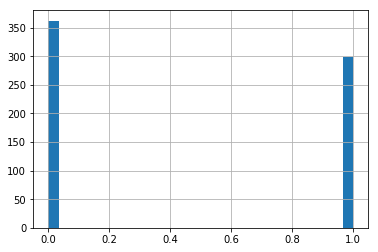

'0.0% de registros nulos'

'Variância: 0.2308349609375'

qtd   pc
1.00  422 0.64
0.00  238 0.36

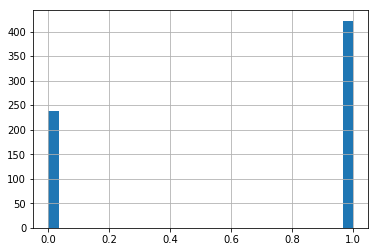

'0.0% de registros nulos'

'Variância: 0.0207977294921875'

qtd   pc
1.00  646 0.98
0.00   14 0.02

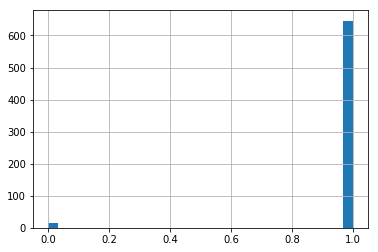

'0.0% de registros nulos'

'Variância: 0.21337890625'

qtd   pc
0.00  457 0.69
1.00  203 0.31

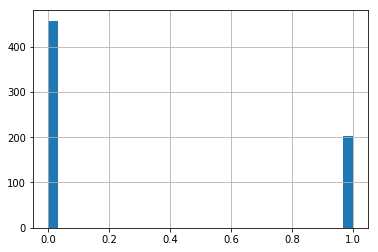

'0.0% de registros nulos'

'Variância: 0.1944580078125'

qtd   pc
1.00  486 0.74
0.00  174 0.26

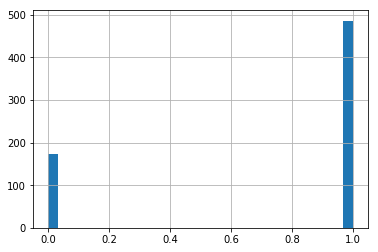

'0.0% de registros nulos'

'Variância: 0.11236572265625'

qtd   pc
1.00  575 0.87
0.00   85 0.13

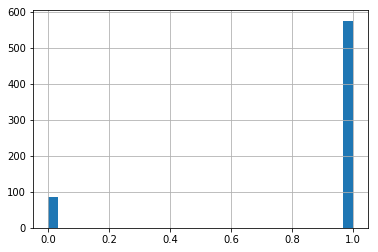

'0.0% de registros nulos'

'Variância: 0.2496337890625'

qtd   pc
1.00  347 0.53
0.00  313 0.47

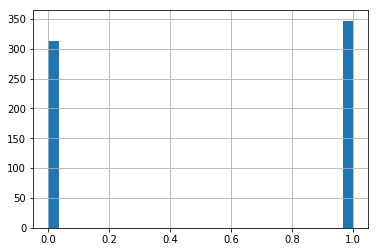

'0.0% de registros nulos'

'Variância: 0.0030269622802734375'

qtd   pc
0.00  658 1.00
1.00    2 0.00

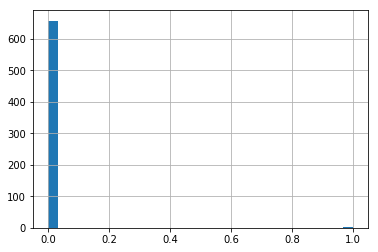

'0.0% de registros nulos'

'Variância: 0.057037353515625'

qtd   pc
0.00  620 0.94
1.00   40 0.06

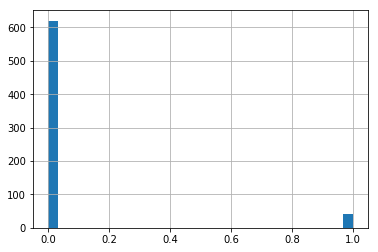

'0.0% de registros nulos'

'Variância: 0.0015153884887695312'

qtd   pc
1.00  659 1.00
0.00    1 0.00

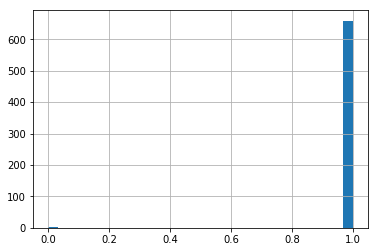

'0.0% de registros nulos'

'Variância: 0.2239990234375'

qtd   pc
0.00  437 0.66
1.00  223 0.34

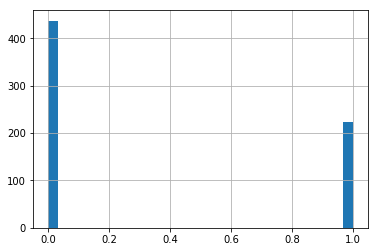

'0.0% de registros nulos'

'Variância: 0.1766357421875'

qtd   pc
1.00  509 0.77
0.00  151 0.23

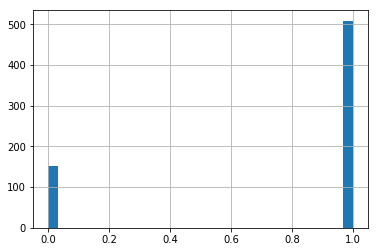

'0.0% de registros nulos'

'Variância: 0.232177734375'

qtd   pc
1.00  419 0.63
0.00  241 0.37

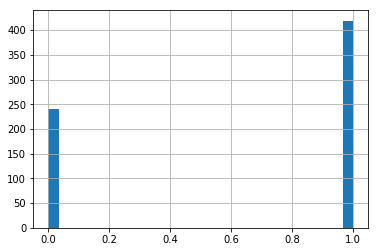

'0.0% de registros nulos'

'Variância: 0.054351806640625'

qtd   pc
1.00  622 0.94
0.00   38 0.06

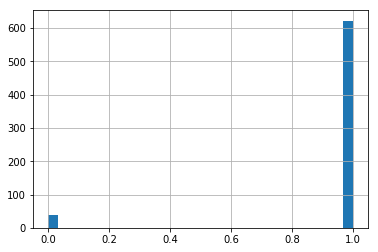

'0.0% de registros nulos'

'Variância: 0.250244140625'

qtd   pc
1.00  339 0.51
0.00  321 0.49

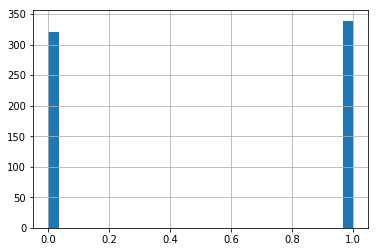

'0.0% de registros nulos'

'Variância: 0.16748046875'

qtd   pc
0.00  520 0.79
1.00  140 0.21

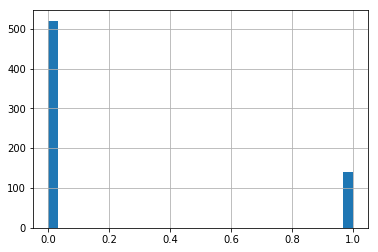

'0.0% de registros nulos'

'Variância: 0.220947265625'

qtd   pc
1.00  443 0.67
0.00  217 0.33

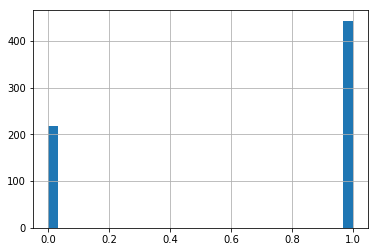

'0.0% de registros nulos'

'Variância: 0.203857421875'

qtd   pc
0.00  472 0.72
1.00  188 0.28

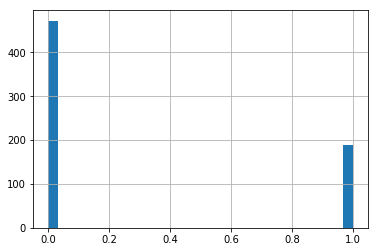

'0.0% de registros nulos'

'Variância: 0.10791015625'

qtd   pc
0.00  579 0.88
1.00   81 0.12

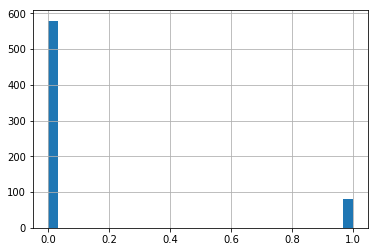

'0.0% de registros nulos'

'Variância: 0.19873046875'

qtd   pc
1.00  480 0.73
0.00  180 0.27

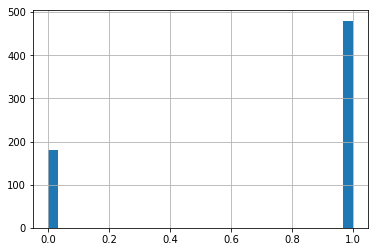

'0.0% de registros nulos'

'Variância: 0.243896484375'

qtd   pc
0.00  384 0.58
1.00  276 0.42

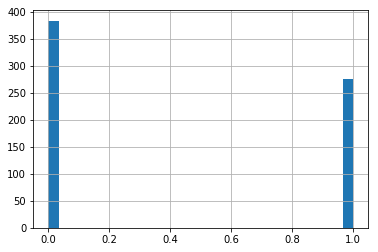

'0.0% de registros nulos'

'Variância: 0.0015153884887695312'

qtd   pc
0.00  659 1.00
1.00    1 0.00

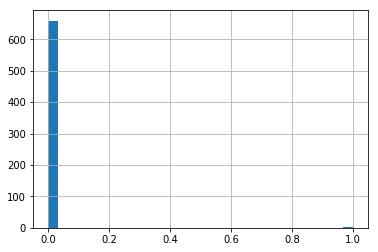

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

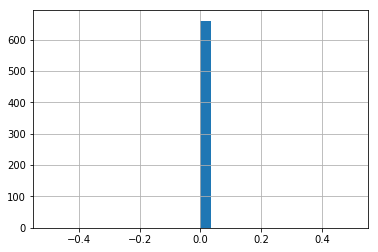

'0.0% de registros nulos'

'Variância: 0.2489013671875'

qtd   pc
0.00  354 0.54
1.00  306 0.46

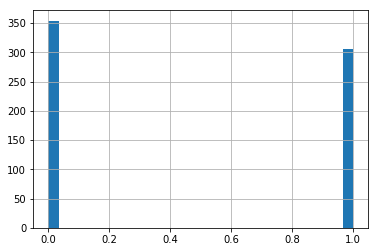

'0.0% de registros nulos'

'Variância: 0.01934814453125'

qtd   pc
0.00  647 0.98
1.00   13 0.02

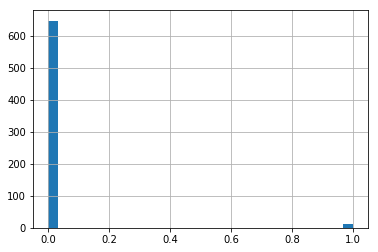

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

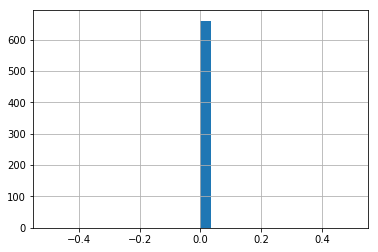

'0.15151515151515152% de registros nulos'

'Variância: 79.75'

count   659.00
mean     15.15
std       8.93
min       2.00
25%       9.00
50%      15.00
75%      20.00
max      84.00
Name: NU_SALAS_EXISTENTES, dtype: float64

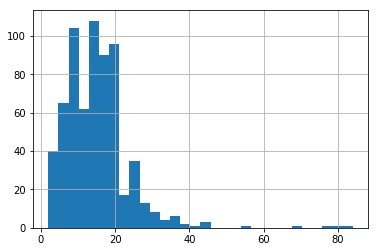

'0.0% de registros nulos'

'Variância: 0.0149383544921875'

qtd   pc
1.00  650 0.98
0.00   10 0.02

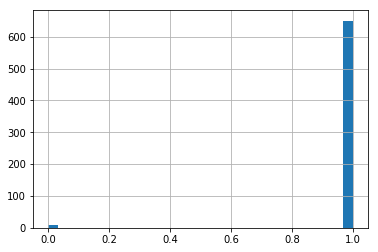

'0.0% de registros nulos'

'Variância: 0.246826171875'

qtd   pc
1.00  370 0.56
0.00  290 0.44

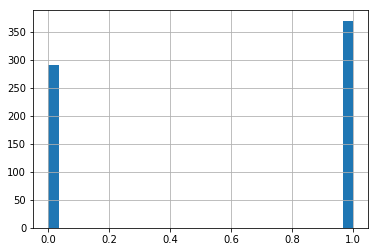

'0.0% de registros nulos'

'Variância: 0.04205322265625'

qtd   pc
1.00  631 0.96
0.00   29 0.04

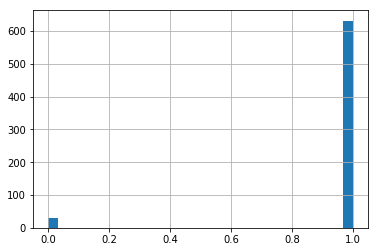

'0.0% de registros nulos'

'Variância: 0.24853515625'

qtd   pc
1.00  358 0.54
0.00  302 0.46

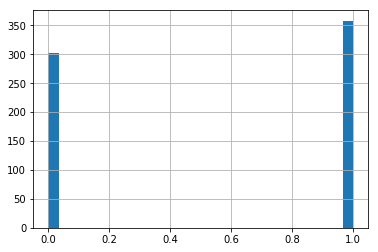

'0.0% de registros nulos'

'Variância: 0.07269287109375'

qtd   pc
1.00  608 0.92
0.00   52 0.08

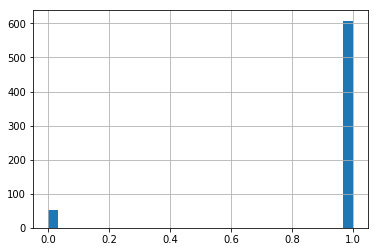

'0.0% de registros nulos'

'Variância: 0.1724853515625'

qtd   pc
1.00  514 0.78
0.00  146 0.22

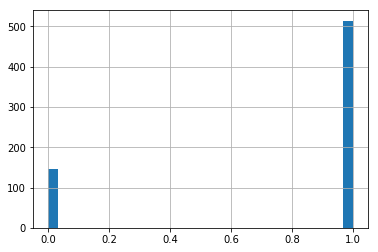

'0.0% de registros nulos'

'Variância: 0.039276123046875'

qtd   pc
1.00  633 0.96
0.00   27 0.04

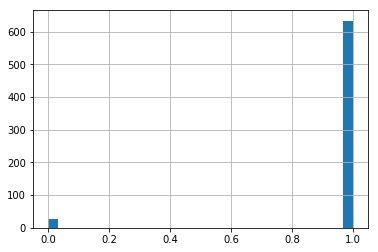

'0.0% de registros nulos'

'Variância: 0.2236328125'

qtd   pc
0.00  438 0.66
1.00  222 0.34

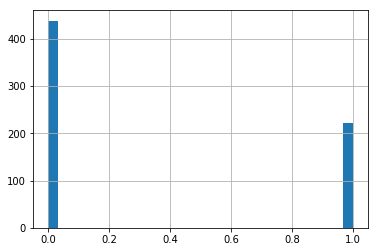

'0.0% de registros nulos'

'Variância: 0.06365966796875'

qtd   pc
1.00  615 0.93
0.00   45 0.07

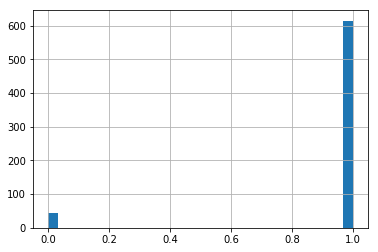

'0.0% de registros nulos'

'Variância: 0.07525634765625'

qtd   pc
1.00  606 0.92
0.00   54 0.08

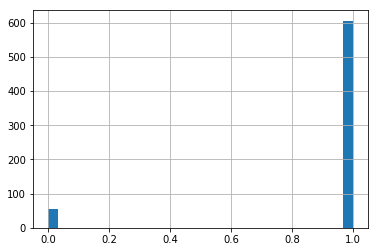

'0.0% de registros nulos'

'Variância: 0.2393798828125'

qtd   pc
0.00  399 0.60
1.00  261 0.40

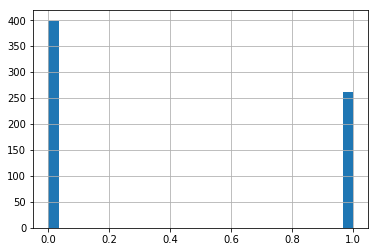

'0.0% de registros nulos'

'Variância: 0.220947265625'

qtd   pc
1.00  443 0.67
0.00  217 0.33

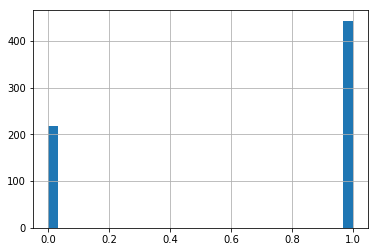

'0.0% de registros nulos'

'Variância: 0.0045318603515625'

qtd   pc
1.00  657 1.00
0.00    3 0.00

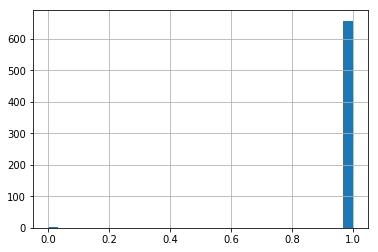

'0.0% de registros nulos'

'Variância: inf'

count   660.00
mean     25.81
std        inf
min       0.00
25%      14.00
50%      22.00
75%      31.00
max     639.00
Name: NU_COMPUTADOR, dtype: float64

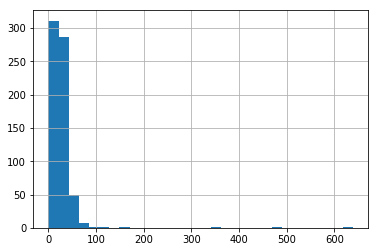

'0.0% de registros nulos'

'Variância: 38.1875'

count   660.00
mean      4.83
std       6.18
min       0.00
25%       2.00
50%       4.00
75%       6.00
max     100.00
Name: NU_COMP_ADMINISTRATIVO, dtype: float64

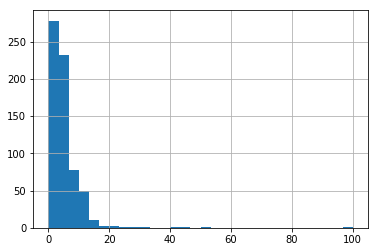

'0.0% de registros nulos'

'Variância: 158.0'

count   660.00
mean     14.29
std      12.57
min       0.00
25%       0.00
50%      13.50
75%      20.00
max      80.00
Name: NU_COMP_ALUNO, dtype: float64

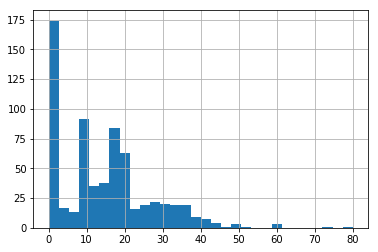

'0.0% de registros nulos'

'Variância: 0.04345703125'

qtd   pc
1.00  630 0.95
0.00   30 0.05

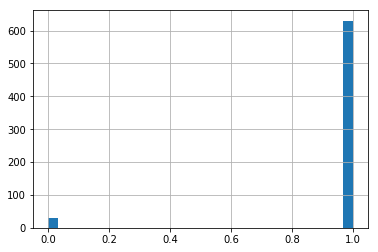

'0.0% de registros nulos'

'Variância: 0.08026123046875'

qtd   pc
1.00  602 0.91
0.00   58 0.09

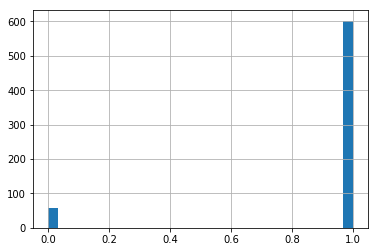

'0.0% de registros nulos'

'Variância: inf'

count   660.00
mean     77.19
std        inf
min      10.00
25%      49.00
50%      70.00
75%      97.00
max     393.00
Name: NU_FUNCIONARIOS, dtype: float64

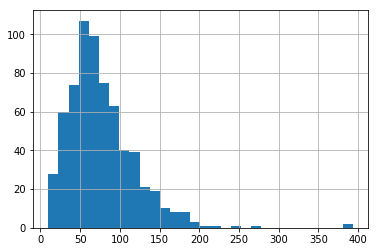

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
1.00  660 1.00

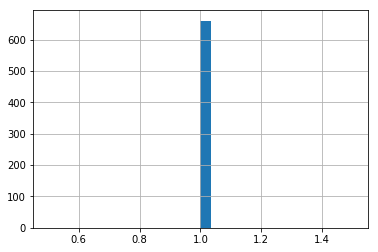

'0.0% de registros nulos'

'Variância: 0.2413330078125'

qtd   pc
1.00  393 0.60
0.00  267 0.40

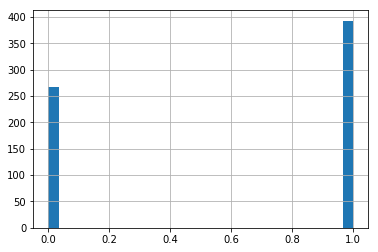

'0.0% de registros nulos'

'Variância: 0.296875'

qtd   pc
0.00  408 0.62
1.00  234 0.35
2.00   18 0.03

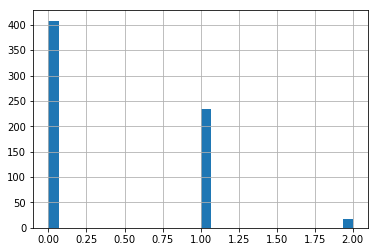

'20.151515151515152% de registros nulos'

'Variância: 0.2476806640625'

qtd   pc
1.00  292 0.44
0.00  235 0.36

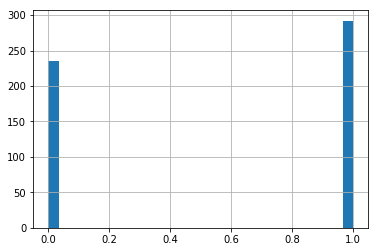

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

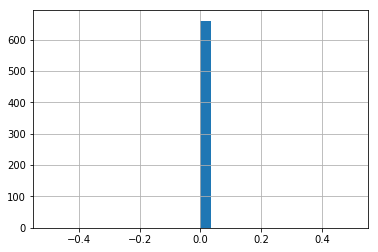

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

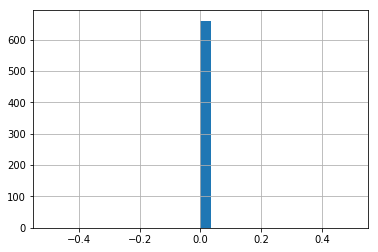

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
1.00  660 1.00

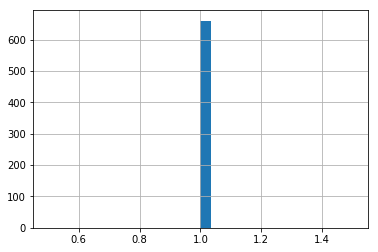

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  660 1.00

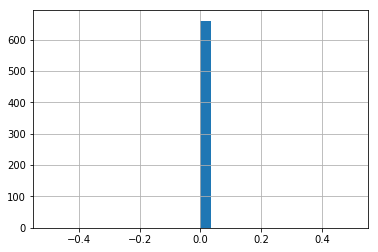

'0.0% de registros nulos'

'Variância: 0.0596923828125'

qtd   pc
0.00  618 0.94
1.00   42 0.06

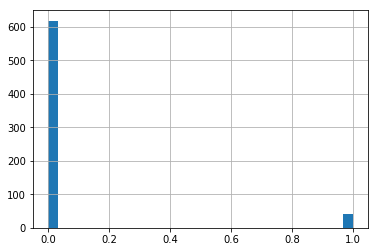

'0.0% de registros nulos'

'Variância: 0.15380859375'

qtd   pc
0.00  535 0.81
1.00  125 0.19

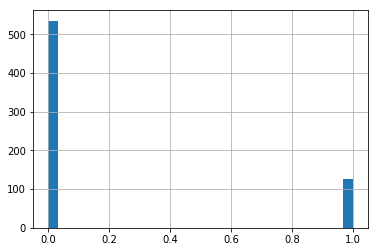

'1.9696969696969695% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  647 0.98

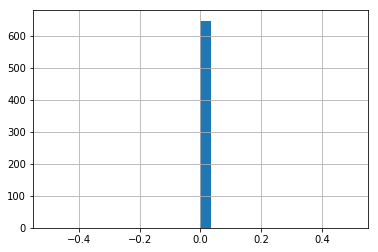

'0.15151515151515152% de registros nulos'

'Variância: 0.01837158203125'

count   659.00
mean      0.96
std       0.14
min       0.06
25%       0.93
50%       1.00
75%       1.00
max       2.06
Name: NU_PCT_SALAS_UTILIZADAS, dtype: float64

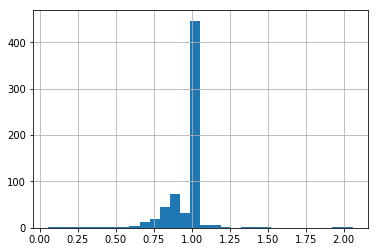

'0.0% de registros nulos'

'Variância: 20.046875'

count   660.00
mean      5.88
std       4.48
min       0.62
25%       4.58
50%       5.39
75%       6.46
max      96.00
Name: NU_PROP_FUNS_SALAS_UTZD, dtype: float64

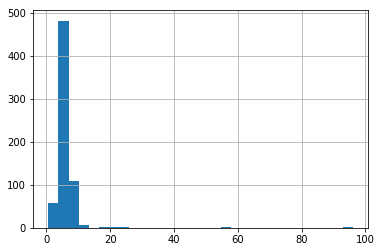

'0.0% de registros nulos'

'Variância: 11.6328125'

count   660.00
mean      2.10
std       3.41
min       0.00
25%       1.06
50%       1.73
75%       2.43
max      60.75
Name: NU_PROP_CPU_SALAS_UTZD, dtype: float64

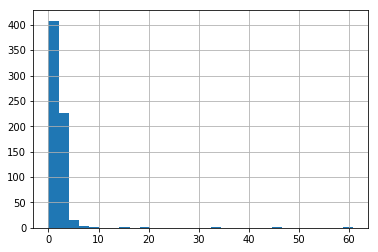

'0.0% de registros nulos'

'Variância: 1.0232215937830498'

qtd   pc
2007  621 0.94
2009   23 0.03
2011    8 0.01
2015    7 0.01
2013    1 0.00

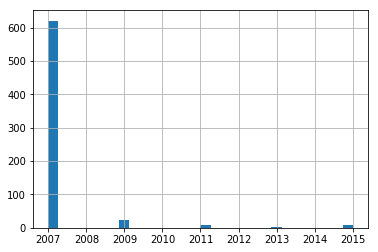

'100.0% de registros nulos'

'Variância: nan'

Empty DataFrame
Columns: [qtd, pc]
Index: []

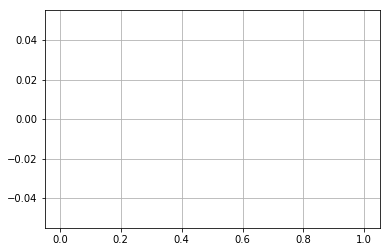

'5.909090909090909% de registros nulos'

'Variância: 480.9041504337442'

count   621.00
mean     33.84
std      21.93
min       2.00
25%      18.00
50%      30.00
75%      46.00
max     123.00
Name: NU_TTL_PROF_2009, dtype: float64

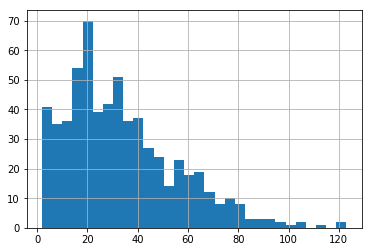

'4.696969696969696% de registros nulos'

'Variância: 322.46962623920297'

count   629.00
mean     24.96
std      17.96
min       1.00
25%      13.00
50%      20.00
75%      33.00
max      94.00
Name: NU_TTL_PROF_2011, dtype: float64

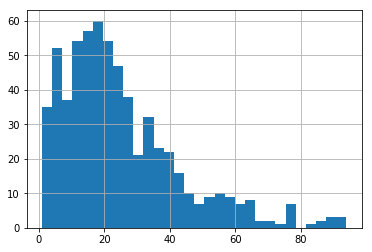

'1.9696969696969695% de registros nulos'

'Variância: 305.59799694709085'

count   647.00
mean     25.12
std      17.48
min       1.00
25%      12.00
50%      21.00
75%      34.00
max     100.00
Name: NU_TTL_PROF_2013, dtype: float64

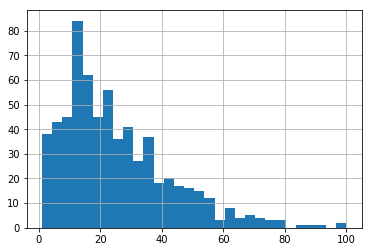

'1.3636363636363635% de registros nulos'

'Variância: 318.0424152191896'

count   651.00
mean     25.43
std      17.83
min       1.00
25%      12.00
50%      21.00
75%      34.50
max     103.00
Name: NU_TTL_PROF_2014, dtype: float64

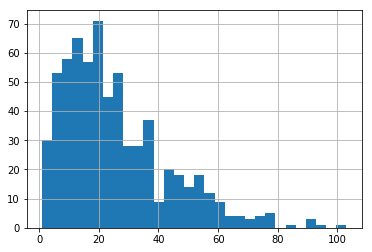

'0.15151515151515152% de registros nulos'

'Variância: 362.91774863821536'

count   659.00
mean     27.43
std      19.05
min       1.00
25%      13.00
50%      23.00
75%      36.00
max     123.00
Name: NU_TTL_PROF_2015, dtype: float64

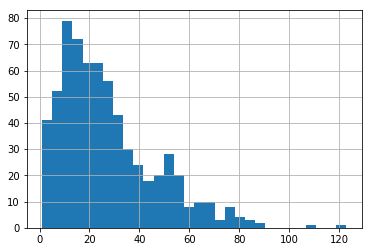

'2.1212121212121215% de registros nulos'

'Variância: 28.355957952336425'

count   646.00
mean     -0.27
std       5.33
min     -35.00
25%      -2.00
50%       0.00
75%       2.00
max      32.00
Name: NU_DIF_QTD_DOCENTES_13_14, dtype: float64

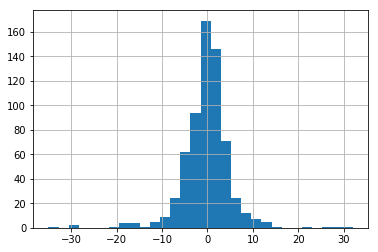

'1.5151515151515151% de registros nulos'

'Variância: 34.25814863102994'

count   650.00
mean     -2.14
std       5.85
min     -34.00
25%      -4.00
50%      -1.00
75%       1.00
max      36.00
Name: NU_DIF_QTD_DOCENTES_14_15, dtype: float64

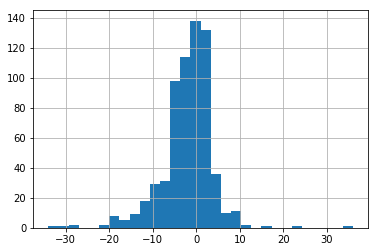

'0.15151515151515152% de registros nulos'

'Variância: 0.014279819810089805'

count   659.00
mean      0.34
std       0.12
min       0.03
25%       0.26
50%       0.33
75%       0.41
max       0.90
Name: NU_PROP_PROF_FUNC_2015, dtype: float64

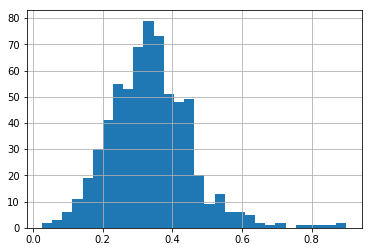

In [16]:
explora_df(fte)

In [17]:
f = fte.copy()
#inicia o feature selection com a variancia e nulos
VARIANCIA_MINIMA = 0.05
PC_MAX_MODA = 0.9
PC_MAX_MODA_NU = 0.6
MAXIMO_DE_NULOS  = 0.05
qtd_ttl = f.shape[0]
cd = []
for c in f.columns:
    s = f[c]
    pc_nulos = s.isnull().sum() / qtd_ttl * 100
    try:
        a = f.loc[s == s.mode()[0]].shape[0]
    except:
        a = 0
        pass
    pc_moda = a/qtd_ttl
    if pc_moda > PC_MAX_MODA or (c.startswith('NU') and pc_moda > PC_MAX_MODA_NU) or pc_nulos > MAXIMO_DE_NULOS:
        #display(f'{c} - {pc_moda}')
        cd.append(c)
    
f.drop(cd,axis=1,inplace=True)
display(' '.join(f.columns))
display(f'Restaram {len(f.columns)/len(fte.columns)} das colunas')
display(f.var())
display(f.head())

'IN_ESGOTO_REDE_PUBLICA IN_ESGOTO_FOSSA IN_LABORATORIO_INFORMATICA IN_LABORATORIO_CIENCIAS IN_SALA_ATENDIMENTO_ESPECIAL IN_QUADRA_ESPORTES_COBERTA IN_QUADRA_ESPORTES_DESCOBERTA IN_QUADRA_ESPORTES IN_BIBLIOTECA IN_SALA_LEITURA IN_BIBLIOTECA_SALA_LEITURA IN_PARQUE_INFANTIL IN_BANHEIRO_EI IN_BANHEIRO_PNE IN_DEPENDENCIAS_PNE IN_BANHEIRO_CHUVEIRO IN_REFEITORIO IN_DESPENSA IN_ALMOXARIFADO IN_AUDITORIO IN_PATIO_COBERTO IN_PATIO_DESCOBERTO IN_AREA_VERDE IN_EQUIP_VIDEOCASSETE IN_EQUIP_PARABOLICA IN_EQUIP_RETROPROJETOR IN_EQUIP_IMPRESSORA_MULT IN_EQUIP_FAX IN_EQUIP_FOTO NU_COMPUTADOR NU_COMP_ADMINISTRATIVO NU_COMP_ALUNO NU_FUNCIONARIOS TP_AEE TP_ATIVIDADE_COMPLEMENTAR IN_FINAL_SEMANA NU_PROP_FUNS_SALAS_UTZD NU_PROP_CPU_SALAS_UTZD'

'Restaram 0.35514018691588783 das colunas'

IN_ESGOTO_REDE_PUBLICA             0.15
IN_ESGOTO_FOSSA                    0.15
IN_LABORATORIO_INFORMATICA         0.15
IN_LABORATORIO_CIENCIAS            0.14
IN_SALA_ATENDIMENTO_ESPECIAL       0.19
IN_QUADRA_ESPORTES_COBERTA         0.19
IN_QUADRA_ESPORTES_DESCOBERTA      0.25
IN_QUADRA_ESPORTES                 0.23
IN_BIBLIOTECA                      0.21
IN_SALA_LEITURA                    0.19
IN_BIBLIOTECA_SALA_LEITURA         0.11
IN_PARQUE_INFANTIL                 0.25
IN_BANHEIRO_EI                     0.22
IN_BANHEIRO_PNE                    0.18
IN_DEPENDENCIAS_PNE                0.23
IN_BANHEIRO_CHUVEIRO               0.25
IN_REFEITORIO                      0.17
IN_DESPENSA                        0.22
IN_ALMOXARIFADO                    0.20
IN_AUDITORIO                       0.11
IN_PATIO_COBERTO                   0.20
IN_PATIO_DESCOBERTO                0.24
IN_AREA_VERDE                      0.25
IN_EQUIP_VIDEOCASSETE              0.25
IN_EQUIP_PARABOLICA                0.25


IN_ESGOTO_REDE_PUBLICA  IN_ESGOTO_FOSSA  \
CO_ENTIDADE                                            
53014294                       1.00             0.00   
53004167                       1.00             0.00   
53002296                       1.00             0.00   
53005759                       0.00             1.00   
53001567                       1.00             0.00   

             IN_LABORATORIO_INFORMATICA  IN_LABORATORIO_CIENCIAS  \
CO_ENTIDADE                                                        
53014294                           1.00                     0.00   
53004167                           0.00                     0.00   
53002296                           0.00                     0.00   
53005759                           1.00                     0.00   
53001567                           1.00                     0.00   

             IN_SALA_ATENDIMENTO_ESPECIAL  IN_QUADRA_ESPORTES_COBERTA  \
CO_ENTIDADE                                                             
53014294                             1.00                        1.00   
53004167                             0.00                        0.00   
53002296                             0.00                        0.00   
53005759                             1.00                        0.00   
53001567                             1.00                        0.00   

             IN_QUADRA_ESPORTES_DESCOBERTA  IN_QUADRA_ESPORTES  IN_BIBLIOTECA  \
CO_ENTIDADE                                                                     
53014294                              0.00                1.00           1.00   
53004167                              0.00                0.00           0.00   
53002296                              0.00                0.00           0.00   
53005759                              0.00                0.00           0.00   
53001567                              0.00                0.00           1.00   

             IN_SALA_LEITURA           ...            IN_EQUIP_FOTO  \
CO_ENTIDADE                            ...                            
53014294                1.00           ...                     1.00   
53004167                0.00           ...                     1.00   
53002296                0.00           ...                     0.00   
53005759                1.00           ...                     0.00   
53001567                1.00           ...                     1.00   

             NU_COMPUTADOR  NU_COMP_ADMINISTRATIVO  NU_COMP_ALUNO  \
CO_ENTIDADE                                                         
53014294             41.00                    7.00          36.00   
53004167              3.00                    2.00           0.00   
53002296              3.00                    0.00           0.00   
53005759              8.00                    4.00           4.00   
53001567             22.00                   10.00          12.00   

             NU_FUNCIONARIOS  TP_AEE  TP_ATIVIDADE_COMPLEMENTAR  \
CO_ENTIDADE                                                       
53014294               98.00    1.00                       1.00   
53004167               39.00    0.00                       0.00   
53002296               43.00    1.00                       0.00   
53005759               37.00    1.00                       1.00   
53001567               56.00    1.00                       0.00   

             IN_FINAL_SEMANA  NU_PROP_FUNS_SALAS_UTZD  NU_PROP_CPU_SALAS_UTZD  
CO_ENTIDADE                                                                    
53014294                0.00                     4.67                    1.95  
53004167                0.00                     9.75                    0.75  
53002296                1.00                     8.60                    0.60  
53005759                0.00                     7.40                    1.60  
53001567                0.00                     5.60                    2.20  

[5 rows x 38 columns]

In [18]:
escolas = ajusta_colunas_int_df_inep( pd.read_csv(f'{CSV_PATH}lclz_df/DADOS_ESCOLAS_PUBLICAS.csv',index_col='CO_ENTIDADE'))
escolas.head()

TP_OCUPACAO_PREDIO_ESCOLAR  IN_LOCAL_FUNC_UNID_PRISIONAL  \
CO_ENTIDADE                                                             
11000023                           2.00                          0.00   
11000040                           1.00                          0.00   
11000201                           1.00                          0.00   
11000260                           1.00                          0.00   
11000295                           1.00                          0.00   

             IN_LOCAL_FUNC_PRISIONAL_SOCIO  IN_AGUA_FILTRADA  \
CO_ENTIDADE                                                    
11000023                              0.00              1.00   
11000040                              0.00              1.00   
11000201                              0.00              1.00   
11000260                              0.00              1.00   
11000295                              0.00              1.00   

             IN_AGUA_REDE_PUBLICA  IN_AGUA_POCO_ARTESIANO  IN_AGUA_CACIMBA  \
CO_ENTIDADE                                                                  
11000023                     0.00                    1.00             0.00   
11000040                     0.00                    1.00             0.00   
11000201                     0.00                    1.00             0.00   
11000260                     0.00                    1.00             0.00   
11000295                     1.00                    1.00             0.00   

             IN_AGUA_FONTE_RIO  IN_AGUA_INEXISTENTE  IN_ENERGIA_REDE_PUBLICA  \
CO_ENTIDADE                                                                    
11000023                  0.00                 0.00                     1.00   
11000040                  0.00                 0.00                     1.00   
11000201                  0.00                 0.00                     1.00   
11000260                  0.00                 0.00                     1.00   
11000295                  0.00                 0.00                     1.00   

               ...     IN_LIXO_ENTERRA  IN_LIXO_OUTROS  IN_EJA       CEP  \
CO_ENTIDADE    ...                                                         
11000023       ...                0.00            0.00    0.00  76824556   
11000040       ...                0.00            0.00    0.00  76801000   
11000201       ...                0.00            0.00    0.00  76820168   
11000260       ...                0.00            0.00    0.00  76821291   
11000295       ...                0.00            0.00    0.00  76820732   

               PRECISAO   LAT   LONG  TP_CATEGORIA_ESCOLA_PRIVADA  pc_desist  \
CO_ENTIDADE                                                                    
11000023     4 Estrelas -8.76 -63.84                          nan       0.16   
11000040     3 Estrelas -8.80 -63.88                          nan       0.47   
11000201     4 Estrelas -8.76 -63.88                          nan       0.29   
11000260     4 Estrelas -8.73 -63.88                          nan       0.04   
11000295     4 Estrelas -8.74 -63.88                          nan       0.05   

             PREC_BOA  
CO_ENTIDADE            
11000023         True  
11000040         True  
11000201         True  
11000260         True  
11000295         True  

[5 rows x 30 columns]

In [19]:
f = f.merge(escolas.loc[escolas.PREC_BOA==1][['LAT','LONG']],left_index=True,right_index=True)
dsc = dados_setor_censitario(f'{CSV_PATH}lclz_df/censo_df/dados/',glob(f'{CSV_PATH}lclz_df/censo_df/*.shp')[0],f.reset_index())
dsc.head()

100%|██████████| 4454/4454 [06:04<00:00, 12.22it/s]


CO_ENTIDADE CO_SETOR_CENSITARIO  DISTANCIA_SETOR_ENTIDADE  \
0  53002296.00     530010805060145                      1.56   
1  53001567.00     530010805060145                      0.21   
2  53002326.00     530010805060145                      0.98   
3  53001648.00     530010805060145                      0.21   
4  53001540.00     530010805060145                      0.98   

   area_media_domicilio  densidade_demografica  qtd_alugados  qtd_cedidos  \
0                  0.00                   0.00         47.00         2.00   
1                  0.00                   0.00         47.00         2.00   
2                  0.00                   0.00         47.00         2.00   
3                  0.00                   0.00         47.00         2.00   
4                  0.00                   0.00         47.00         2.00   

   qtd_dom_renda_max_per_mais_5sm  qtd_dom_renda_per_cap_abx_1sm  \
0                           70.00                          15.00   
1                           70.00                          15.00   
2                           70.00                          15.00   
3                           70.00                          15.00   
4                           70.00                          15.00   

   qtd_domicilios  qtd_em_aquisicao  qtd_mulheres  qtd_mulheres_resp  \
0          159.00             10.00        271.00              89.00   
1          159.00             10.00        271.00              89.00   
2          159.00             10.00        271.00              89.00   
3          159.00             10.00        271.00              89.00   
4          159.00             10.00        271.00              89.00   

   qtd_pessoas  qtd_pss_abx_12  qtd_pss_acima_65  qtd_pss_acima_90  \
0       472.00           49.00             44.00              1.00   
1       472.00           49.00             44.00              1.00   
2       472.00           49.00             44.00              1.00   
3       472.00           49.00             44.00              1.00   
4       472.00           49.00             44.00              1.00   

   qtd_quitados  renda_media_dom  sit_setor  
0        100.00          6898.43       1.00  
1        100.00          6898.43       1.00  
2        100.00          6898.43       1.00  
3        100.00          6898.43       1.00  
4        100.00          6898.43       1.00

In [20]:
dsc.columns

Index(['CO_ENTIDADE', 'CO_SETOR_CENSITARIO', 'DISTANCIA_SETOR_ENTIDADE',
       'area_media_domicilio', 'densidade_demografica', 'qtd_alugados',
       'qtd_cedidos', 'qtd_dom_renda_max_per_mais_5sm',
       'qtd_dom_renda_per_cap_abx_1sm', 'qtd_domicilios', 'qtd_em_aquisicao',
       'qtd_mulheres', 'qtd_mulheres_resp', 'qtd_pessoas', 'qtd_pss_abx_12',
       'qtd_pss_acima_65', 'qtd_pss_acima_90', 'qtd_quitados',
       'renda_media_dom', 'sit_setor'],
      dtype='object')

In [21]:
dg = dsc.dropna().drop_duplicates().groupby('CO_ENTIDADE')

In [24]:
b = dg[[col for col in dsc.columns if col.startswith('qtd_')]].sum()

In [30]:
set_agp_esc = pd.DataFrame()
#contagens
set_agp_esc['NU_QTD_SETORES_CENSITARIOS'] = dg['CO_SETOR_CENSITARIO'].nunique()
#medias
set_agp_esc['NU_MEDIA_DISTANCIA_ESCOLA_SETOR'] = dg['DISTANCIA_SETOR_ENTIDADE'].mean()
#medianas
set_agp_esc['NU_MEDIANA_RENDA_MEDIA'] = dg['renda_media_dom'].median()
set_agp_esc['NU_MEDIANA_QTD_DOMICILIOS'] = dg['qtd_domicilios'].median()
set_agp_esc['NU_MEDIANA_QTD_PESSOAS'] = dg['qtd_pessoas'].median()
#somas
set_agp_esc['NU_SOMA_QTD_DOMICILIOS'] = b['qtd_domicilios']
set_agp_esc['NU_SOMA_QTD_PESSOAS'] = b['qtd_pessoas']
#proporcoes
set_agp_esc['NU_PROP_DOM_ALUGADOS'] = b['qtd_alugados']/b['qtd_domicilios']
set_agp_esc['NU_PROP_DOM_CEDIDOS'] = b['qtd_cedidos']/b['qtd_domicilios']
set_agp_esc['NU_PROP_DOM_EM_AQUISICAO'] = b['qtd_em_aquisicao']/b['qtd_domicilios']
set_agp_esc['NU_PROP_DOM_RENDA_PERCAPITA_ACIMA_5SM'] = b['qtd_dom_renda_max_per_mais_5sm']/b['qtd_domicilios']
set_agp_esc['NU_PROP_DOM_RENDA_PERCAPITA_ABXO_1SM'] = b['qtd_dom_renda_per_cap_abx_1sm']/b['qtd_domicilios']
set_agp_esc['NU_PROP_PSS_MULHERES'] = b['qtd_mulheres']/b['qtd_pessoas']
set_agp_esc['NU_PROP_PSS_MULHERES_RSP'] = b['qtd_mulheres_resp']/b['qtd_pessoas']
set_agp_esc['NU_PROP_PSS_ABXO_12ANOS'] = b['qtd_pss_abx_12']/b['qtd_pessoas']
set_agp_esc['NU_PROP_PSS_ACIMA_65ANOS'] = b['qtd_pss_acima_65']/b['qtd_pessoas']
set_agp_esc['NU_PROP_PSS_ACIMA_90ANOS'] = b['qtd_pss_acima_90']/b['qtd_pessoas']


In [32]:
display(set_agp_esc.shape)
set_agp_esc.head()

(500, 17)

NU_QTD_SETORES_CENSITARIOS  NU_MEDIA_DISTANCIA_ESCOLA_SETOR  \
CO_ENTIDADE                                                                
53000200.00                         161                             1.43   
53000234.00                          67                             1.95   
53000714.00                         161                             1.43   
53000846.00                         187                             1.49   
53000854.00                         129                             2.02   

             NU_MEDIANA_RENDA_MEDIA  NU_MEDIANA_QTD_DOMICILIOS  \
CO_ENTIDADE                                                      
53000200.00                11234.02                     177.00   
53000234.00                11433.29                     164.00   
53000714.00                11234.02                     177.00   
53000846.00                11234.02                     180.00   
53000854.00                 9314.70                     190.00   

             NU_MEDIANA_QTD_PESSOAS  NU_SOMA_QTD_DOMICILIOS  \
CO_ENTIDADE                                                   
53000200.00                  509.00                29557.00   
53000234.00                  464.00                10924.00   
53000714.00                  509.00                29557.00   
53000846.00                  492.00                34966.00   
53000854.00                  573.00                25968.00   

             NU_SOMA_QTD_PESSOAS  NU_PROP_DOM_ALUGADOS  NU_PROP_DOM_CEDIDOS  \
CO_ENTIDADE                                                                   
53000200.00             83601.00                  0.28                 0.11   
53000234.00             30338.00                  0.30                 0.11   
53000714.00             83601.00                  0.28                 0.11   
53000846.00             93855.00                  0.33                 0.10   
53000854.00             76734.00                  0.29                 0.13   

             NU_PROP_DOM_EM_AQUISICAO  NU_PROP_DOM_RENDA_PERCAPITA_ACIMA_5SM  \
CO_ENTIDADE                                                                    
53000200.00                      0.06                                   0.66   
53000234.00                      0.05                                   0.71   
53000714.00                      0.06                                   0.66   
53000846.00                      0.06                                   0.69   
53000854.00                      0.09                                   0.53   

             NU_PROP_DOM_RENDA_PERCAPITA_ABXO_1SM  NU_PROP_PSS_MULHERES  \
CO_ENTIDADE                                                               
53000200.00                                  0.04                  0.55   
53000234.00                                  0.02                  0.55   
53000714.00                                  0.04                  0.55   
53000846.00                                  0.03                  0.55   
53000854.00                                  0.09                  0.53   

             NU_PROP_PSS_MULHERES_RSP  NU_PROP_PSS_ABXO_12ANOS  \
CO_ENTIDADE                                                      
53000200.00                      0.16                     0.12   
53000234.00                      0.15                     0.11   
53000714.00                      0.16                     0.12   
53000846.00                      0.17                     0.12   
53000854.00                      0.15                     0.15   

             NU_PROP_PSS_ACIMA_65ANOS  NU_PROP_PSS_ACIMA_90ANOS  
CO_ENTIDADE                                                      
53000200.00                      0.13                      0.00  
53000234.00                      0.14                      0.00  
53000714.00                      0.13                      0.00  
53000846.00                      0.12                      0.00  
53000854.00                      0.08                      0.00

In [35]:
import numpy as np

for col in set_agp_esc.columns:
    if col.startswith('NU_MEDIA') or col.startswith('NU_PROP'):
        set_agp_esc[col] = set_agp_esc[col].astype(np.float16)
    else:
        set_agp_esc[col] = set_agp_esc[col].astype(np.int16)
        

In [37]:
set_agp_esc.index = set_agp_esc.index.astype(np.int64)

In [42]:
features_escolas = f.drop(['LAT','LONG'],axis=1).merge(set_agp_esc,left_index=True,right_index=True)

In [73]:
f = features_escolas.copy()
#inicia o feature selection com a variancia e nulos
VARIANCIA_MINIMA = 0.05
PC_MAX_MODA = 0.9
PC_MAX_MODA_NU = 0.6
MAXIMO_DE_NULOS  = 0.05
qtd_ttl = f.shape[0]
cd = []
for c in f.columns:
    s = f[c]
    pc_nulos = s.isnull().sum() / qtd_ttl * 100
    try:
        a = f.loc[s == s.mode()[0]].shape[0]
    except:
        a = 0
        pass
    pc_moda = a/qtd_ttl
    if pc_moda > PC_MAX_MODA or (c.startswith('NU') and pc_moda > PC_MAX_MODA_NU) or pc_nulos > MAXIMO_DE_NULOS:
        #display(f'{c} - {pc_moda}')
        cd.append(c)
    
f.drop(cd,axis=1,inplace=True)
display(' '.join(f.columns))
display(f'Restaram {len(f.columns)/len(fte.columns)} das colunas')
display(f.var())
display(f.head())

'IN_ESGOTO_REDE_PUBLICA IN_ESGOTO_FOSSA IN_LABORATORIO_INFORMATICA IN_LABORATORIO_CIENCIAS IN_SALA_ATENDIMENTO_ESPECIAL IN_QUADRA_ESPORTES_COBERTA IN_QUADRA_ESPORTES_DESCOBERTA IN_QUADRA_ESPORTES IN_BIBLIOTECA IN_SALA_LEITURA IN_BIBLIOTECA_SALA_LEITURA IN_PARQUE_INFANTIL IN_BANHEIRO_EI IN_BANHEIRO_PNE IN_DEPENDENCIAS_PNE IN_BANHEIRO_CHUVEIRO IN_REFEITORIO IN_DESPENSA IN_ALMOXARIFADO IN_AUDITORIO IN_PATIO_COBERTO IN_PATIO_DESCOBERTO IN_AREA_VERDE IN_EQUIP_VIDEOCASSETE IN_EQUIP_PARABOLICA IN_EQUIP_RETROPROJETOR IN_EQUIP_IMPRESSORA_MULT IN_EQUIP_FAX IN_EQUIP_FOTO NU_COMPUTADOR NU_COMP_ADMINISTRATIVO NU_COMP_ALUNO NU_FUNCIONARIOS TP_AEE TP_ATIVIDADE_COMPLEMENTAR IN_FINAL_SEMANA NU_PROP_FUNS_SALAS_UTZD NU_PROP_CPU_SALAS_UTZD NU_QTD_SETORES_CENSITARIOS NU_MEDIA_DISTANCIA_ESCOLA_SETOR NU_MEDIANA_RENDA_MEDIA NU_MEDIANA_QTD_DOMICILIOS NU_MEDIANA_QTD_PESSOAS NU_SOMA_QTD_DOMICILIOS NU_SOMA_QTD_PESSOAS NU_PROP_DOM_ALUGADOS NU_PROP_DOM_CEDIDOS NU_PROP_DOM_EM_AQUISICAO NU_PROP_DOM_RENDA_PERCAPITA_AC

'Restaram 0.514018691588785 das colunas'

IN_ESGOTO_REDE_PUBLICA                          0.13
IN_ESGOTO_FOSSA                                 0.13
IN_LABORATORIO_INFORMATICA                      0.15
IN_LABORATORIO_CIENCIAS                         0.15
IN_SALA_ATENDIMENTO_ESPECIAL                    0.18
IN_QUADRA_ESPORTES_COBERTA                      0.18
IN_QUADRA_ESPORTES_DESCOBERTA                   0.25
IN_QUADRA_ESPORTES                              0.23
IN_BIBLIOTECA                                   0.21
IN_SALA_LEITURA                                 0.20
IN_BIBLIOTECA_SALA_LEITURA                      0.11
IN_PARQUE_INFANTIL                              0.25
IN_BANHEIRO_EI                                  0.23
IN_BANHEIRO_PNE                                 0.17
IN_DEPENDENCIAS_PNE                             0.23
IN_BANHEIRO_CHUVEIRO                            0.25
IN_REFEITORIO                                   0.16
IN_DESPENSA                                     0.22
IN_ALMOXARIFADO                               

IN_ESGOTO_REDE_PUBLICA  IN_ESGOTO_FOSSA  \
CO_ENTIDADE                                            
53004167                       1.00             0.00   
53002296                       1.00             0.00   
53001567                       1.00             0.00   
53009479                       1.00             0.00   
53002474                       1.00             0.00   

             IN_LABORATORIO_INFORMATICA  IN_LABORATORIO_CIENCIAS  \
CO_ENTIDADE                                                        
53004167                           0.00                     0.00   
53002296                           0.00                     0.00   
53001567                           1.00                     0.00   
53009479                           1.00                     1.00   
53002474                           1.00                     0.00   

             IN_SALA_ATENDIMENTO_ESPECIAL  IN_QUADRA_ESPORTES_COBERTA  \
CO_ENTIDADE                                                             
53004167                             0.00                        0.00   
53002296                             0.00                        0.00   
53001567                             1.00                        0.00   
53009479                             1.00                        0.00   
53002474                             1.00                        0.00   

             IN_QUADRA_ESPORTES_DESCOBERTA  IN_QUADRA_ESPORTES  IN_BIBLIOTECA  \
CO_ENTIDADE                                                                     
53004167                              0.00                0.00           0.00   
53002296                              0.00                0.00           0.00   
53001567                              0.00                0.00           1.00   
53009479                              1.00                1.00           1.00   
53002474                              1.00                1.00           0.00   

             IN_SALA_LEITURA            ...             NU_PROP_DOM_ALUGADOS  \
CO_ENTIDADE                             ...                                    
53004167                0.00            ...                             0.41   
53002296                0.00            ...                             0.34   
53001567                1.00            ...                             0.28   
53009479                1.00            ...                             0.22   
53002474                1.00            ...                             0.23   

             NU_PROP_DOM_CEDIDOS  NU_PROP_DOM_EM_AQUISICAO  \
CO_ENTIDADE                                                  
53004167                    0.10                      0.04   
53002296                    0.09                      0.06   
53001567                    0.11                      0.06   
53009479                    0.05                      0.05   
53002474                    0.11                      0.03   

             NU_PROP_DOM_RENDA_PERCAPITA_ACIMA_5SM  \
CO_ENTIDADE                                          
53004167                                      0.06   
53002296                                      0.70   
53001567                                      0.66   
53009479                                      0.71   
53002474                                      0.01   

             NU_PROP_DOM_RENDA_PERCAPITA_ABXO_1SM  NU_PROP_PSS_MULHERES  \
CO_ENTIDADE                                                               
53004167                                     0.41                  0.53   
53002296                                     0.03                  0.55   
53001567                                     0.04                  0.55   
53009479                                     0.03                  0.54   
53002474                                     0.63                  0.51   

             NU_PROP_PSS_MULHERES_RSP  NU_PROP_PSS_ABXO_12ANOS  \
CO_ENTIDADE                                                      
53004167                      

'0.0% de registros nulos'

'Variância: 0.1291543086172331'

qtd   pc
1.00  424 0.85
0.00   76 0.15

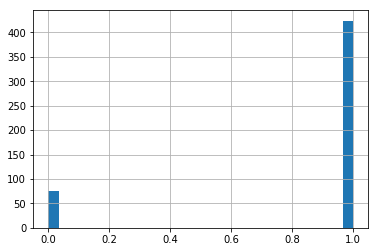

'0.0% de registros nulos'

'Variância: 0.1291543086172331'

qtd   pc
0.00  424 0.85
1.00   76 0.15

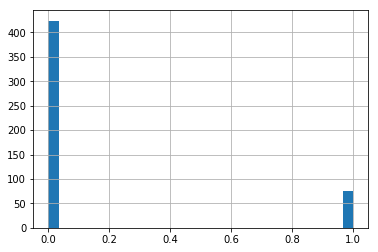

'0.0% de registros nulos'

'Variância: 0.15044488977955925'

qtd   pc
1.00  408 0.82
0.00   92 0.18

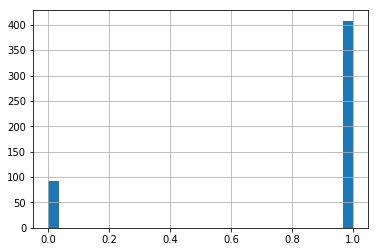

'0.0% de registros nulos'

'Variância: 0.1466092184368726'

qtd   pc
0.00  411 0.82
1.00   89 0.18

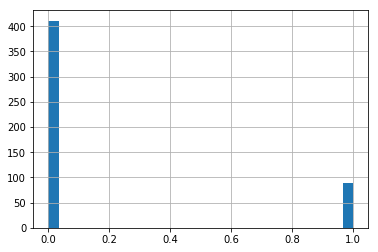

'0.0% de registros nulos'

'Variância: 0.17636873747495058'

qtd   pc
1.00  386 0.77
0.00  114 0.23

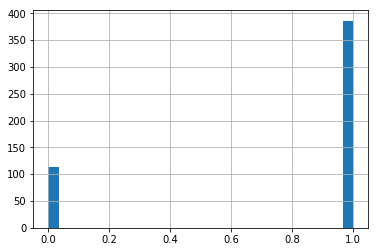

'0.0% de registros nulos'

'Variância: 0.1827655310621232'

qtd   pc
0.00  380 0.76
1.00  120 0.24

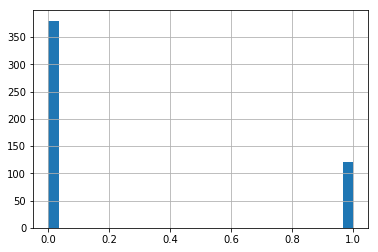

'0.0% de registros nulos'

'Variância: 0.2487334669338689'

qtd   pc
0.00  271 0.54
1.00  229 0.46

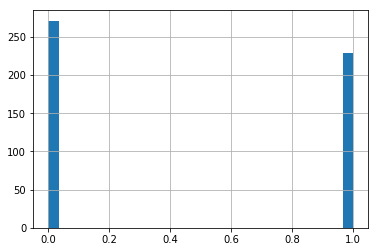

'0.0% de registros nulos'

'Variância: 0.23250901803607077'

qtd   pc
1.00  317 0.63
0.00  183 0.37

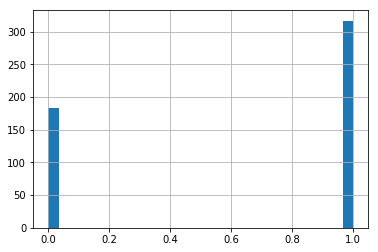

'0.0% de registros nulos'

'Variância: 0.21356312625250606'

qtd   pc
0.00  346 0.69
1.00  154 0.31

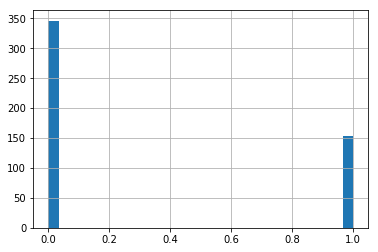

'0.0% de registros nulos'

'Variância: 0.1965691382765548'

qtd   pc
1.00  366 0.73
0.00  134 0.27

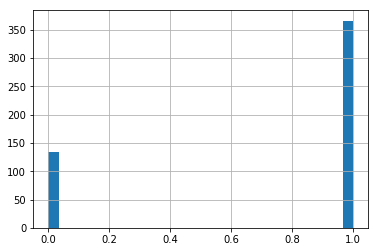

'0.0% de registros nulos'

'Variância: 0.10884168336673457'

qtd   pc
1.00  438 0.88
0.00   62 0.12

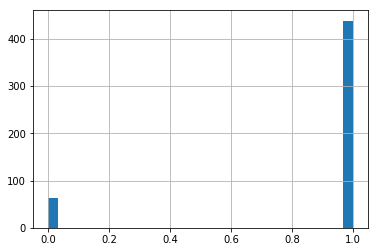

'0.0% de registros nulos'

'Variância: 0.2501763527054135'

qtd   pc
1.00  259 0.52
0.00  241 0.48

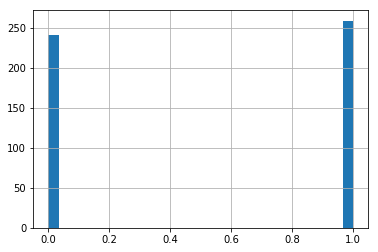

'0.0% de registros nulos'

'Variância: 0.22795591182364805'

qtd   pc
0.00  325 0.65
1.00  175 0.35

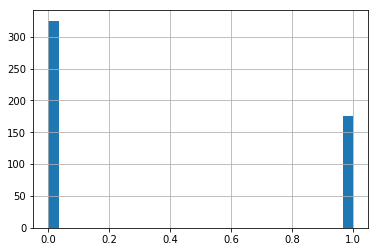

'0.0% de registros nulos'

'Variância: 0.17306212424849676'

qtd   pc
1.00  389 0.78
0.00  111 0.22

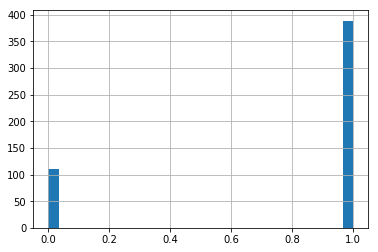

'0.0% de registros nulos'

'Variância: 0.22855310621242472'

qtd   pc
1.00  324 0.65
0.00  176 0.35

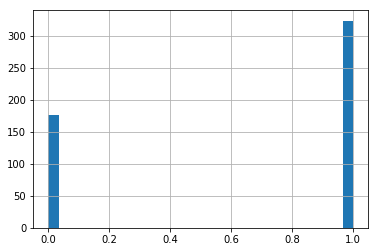

'0.0% de registros nulos'

'Variância: 0.2504649298597172'

qtd   pc
1.00  253 0.51
0.00  247 0.49

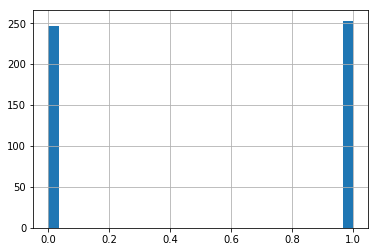

'0.0% de registros nulos'

'Variância: 0.16389178356713427'

qtd   pc
0.00  397 0.79
1.00  103 0.21

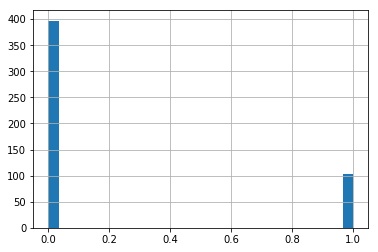

'0.0% de registros nulos'

'Variância: 0.2222204408817647'

qtd   pc
1.00  334 0.67
0.00  166 0.33

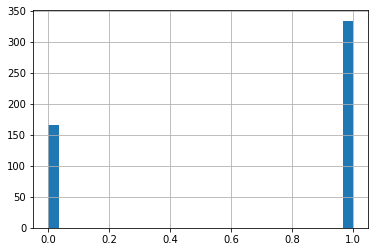

'0.0% de registros nulos'

'Variância: 0.19932264529057997'

qtd   pc
0.00  363 0.73
1.00  137 0.27

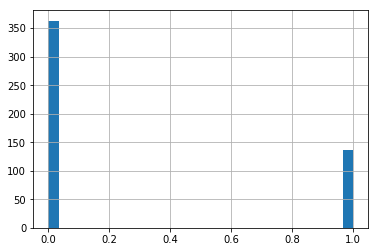

'0.0% de registros nulos'

'Variância: 0.10274949899799576'

qtd   pc
0.00  442 0.88
1.00   58 0.12

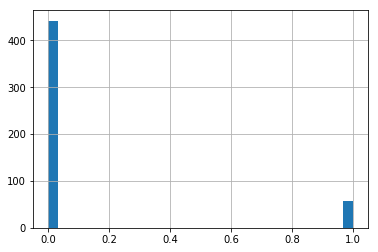

'0.0% de registros nulos'

'Variância: 0.19656913827655523'

qtd   pc
1.00  366 0.73
0.00  134 0.27

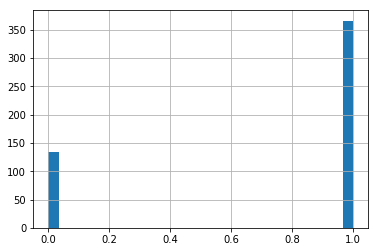

'0.0% de registros nulos'

'Variância: 0.2412665330661329'

qtd   pc
0.00  298 0.60
1.00  202 0.40

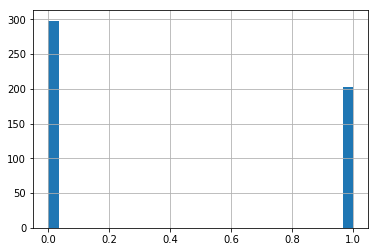

'0.0% de registros nulos'

'Variância: 0.24889779559118394'

qtd   pc
0.00  270 0.54
1.00  230 0.46

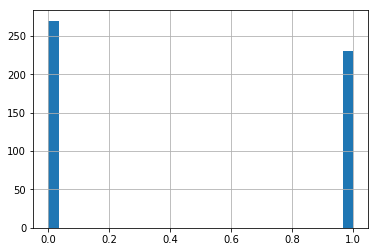

'0.0% de registros nulos'

'Variância: 0.24408817635270522'

qtd   pc
1.00  290 0.58
0.00  210 0.42

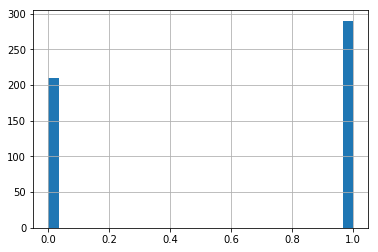

'0.0% de registros nulos'

'Variância: 0.2468937875751498'

qtd   pc
1.00  280 0.56
0.00  220 0.44

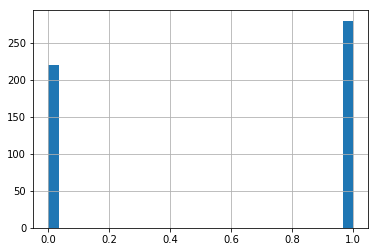

'0.0% de registros nulos'

'Variância: 0.1591142284569129'

qtd   pc
1.00  401 0.80
0.00   99 0.20

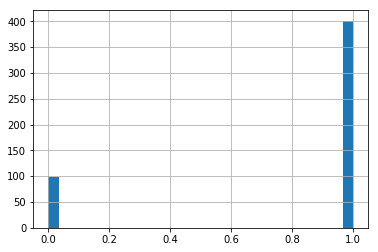

'0.0% de registros nulos'

'Variância: 0.22154308617234475'

qtd   pc
0.00  335 0.67
1.00  165 0.33

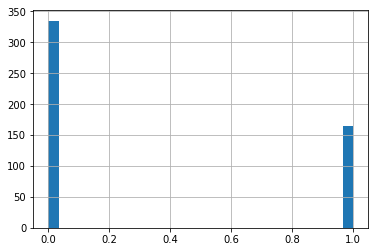

'0.0% de registros nulos'

'Variância: 0.24202004008016204'

qtd   pc
0.00  296 0.59
1.00  204 0.41

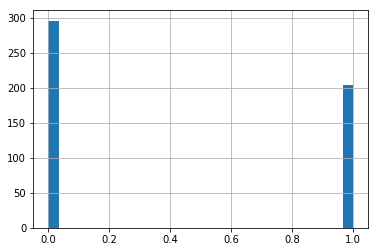

'0.0% de registros nulos'

'Variância: 0.21583567134268586'

qtd   pc
1.00  343 0.69
0.00  157 0.31

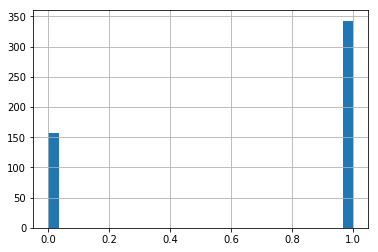

'0.0% de registros nulos'

'Variância: 1596.4339038076162'

count   500.00
mean     26.34
std      39.96
min       0.00
25%      14.00
50%      22.00
75%      30.25
max     639.00
Name: NU_COMPUTADOR, dtype: float64

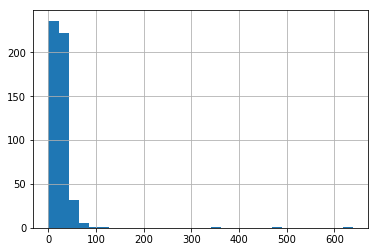

'0.0% de registros nulos'

'Variância: 27.6808456913828'

count   500.00
mean      4.75
std       5.26
min       0.00
25%       2.00
50%       4.00
75%       6.00
max      53.00
Name: NU_COMP_ADMINISTRATIVO, dtype: float64

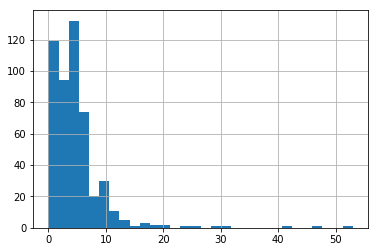

'0.0% de registros nulos'

'Variância: 155.37367134268482'

count   500.00
mean     14.27
std      12.46
min       0.00
25%       1.00
50%      13.50
75%      20.00
max      80.00
Name: NU_COMP_ALUNO, dtype: float64

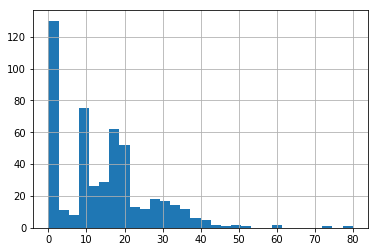

'0.0% de registros nulos'

'Variância: 1702.4672505010003'

count   500.00
mean     76.32
std      41.26
min      10.00
25%      48.00
50%      70.00
75%      96.00
max     392.00
Name: NU_FUNCIONARIOS, dtype: float64

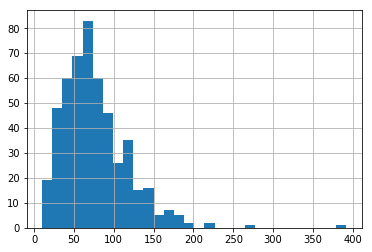

'0.0% de registros nulos'

'Variância: 0.2374789579158309'

qtd   pc
1.00  307 0.61
0.00  193 0.39

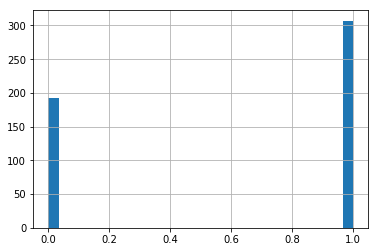

'0.0% de registros nulos'

'Variância: 0.23086172344689293'

qtd   pc
0.00  320 0.64
1.00  180 0.36

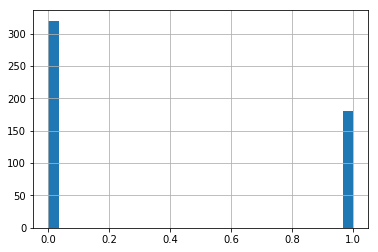

'0.0% de registros nulos'

'Variância: 0.15544689378757467'

qtd   pc
0.00  404 0.81
1.00   96 0.19

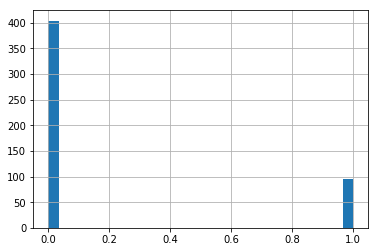

'0.0% de registros nulos'

'Variância: 2.519660518841682'

count   500.00
mean      5.64
std       1.59
min       2.00
25%       4.64
50%       5.42
75%       6.36
max      17.00
Name: NU_PROP_FUNS_SALAS_UTZD, dtype: float64

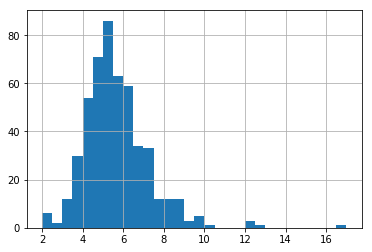

'0.0% de registros nulos'

'Variância: 8.516860371104565'

count   500.00
mean      2.03
std       2.92
min       0.00
25%       1.11
50%       1.75
75%       2.44
max      60.75
Name: NU_PROP_CPU_SALAS_UTZD, dtype: float64

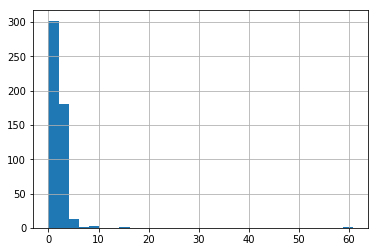

'0.0% de registros nulos'

'Variância: 10141.80310621245'

count   500.00
mean    158.45
std     100.71
min       1.00
25%      86.00
50%     154.00
75%     202.00
max     432.00
Name: NU_QTD_SETORES_CENSITARIOS, dtype: float64

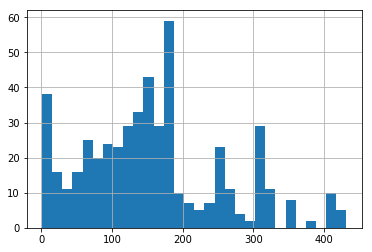

'0.0% de registros nulos'

'Variância: 0.08675136447294596'

count   500.00
mean      1.57
std       0.29
min       1.04
25%       1.44
50%       1.52
75%       1.66
max       4.85
Name: NU_MEDIA_DISTANCIA_ESCOLA_SETOR, dtype: float64

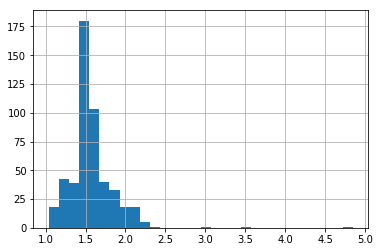

'0.0% de registros nulos'

'Variância: 10945504.354132267'

count     500.00
mean     4181.52
std      3308.40
min      1101.00
25%      1923.00
50%      2480.00
75%      5196.00
max     14050.00
Name: NU_MEDIANA_RENDA_MEDIA, dtype: float64

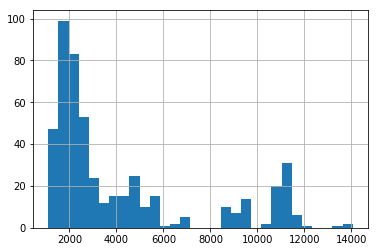

'0.0% de registros nulos'

'Variância: 653.8466092184367'

count   500.00
mean    175.42
std      25.57
min      34.00
25%     169.00
50%     181.00
75%     189.00
max     215.50
Name: NU_MEDIANA_QTD_DOMICILIOS, dtype: float64

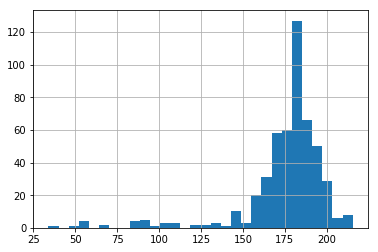

'0.0% de registros nulos'

'Variância: 10849.39506513026'

count   500.00
mean    586.49
std     104.16
min     105.00
25%     533.50
50%     609.50
75%     668.00
max     769.00
Name: NU_MEDIANA_QTD_PESSOAS, dtype: float64

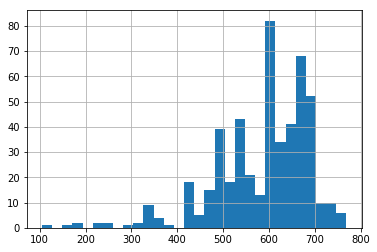

'0.0% de registros nulos'

'Variância: 432117324.1935835'

count      500.00
mean      4355.80
std      20787.43
min     -32721.00
25%     -12024.00
50%      10065.00
75%      21284.25
max      32697.00
Name: NU_SOMA_QTD_DOMICILIOS, dtype: float64

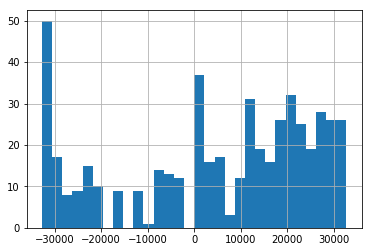

'0.0% de registros nulos'

'Variância: 309683047.81920254'

count      500.00
mean      1579.29
std      17597.81
min     -31623.00
25%     -11603.00
50%       2086.00
75%      15459.00
max      32356.00
Name: NU_SOMA_QTD_PESSOAS, dtype: float64

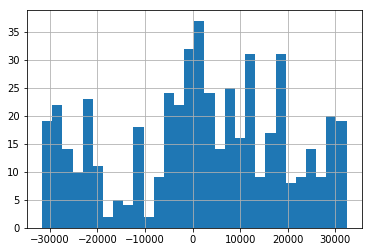

'0.0% de registros nulos'

'Variância: 0.007822586346361116'

count   500.00
mean      0.30
std       0.09
min       0.00
25%       0.27
50%       0.32
75%       0.36
max       0.45
Name: NU_PROP_DOM_ALUGADOS, dtype: float64

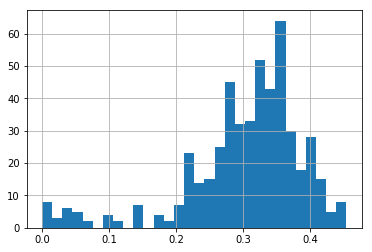

'0.0% de registros nulos'

'Variância: 0.008552230486625644'

count   500.00
mean      0.12
std       0.09
min       0.04
25%       0.08
50%       0.10
75%       0.11
max       1.00
Name: NU_PROP_DOM_CEDIDOS, dtype: float64

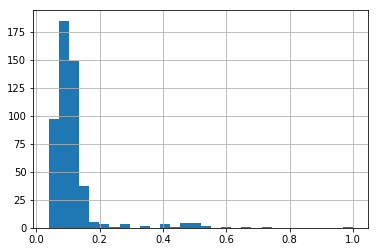

'0.0% de registros nulos'

'Variância: 0.0009659843680250532'

count   500.00
mean      0.05
std       0.03
min       0.00
25%       0.01
50%       0.04
75%       0.06
max       0.17
Name: NU_PROP_DOM_EM_AQUISICAO, dtype: float64

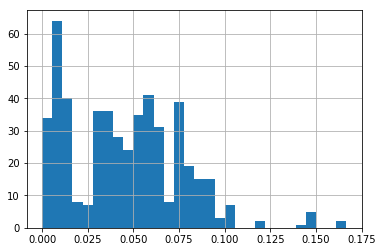

'0.0% de registros nulos'

'Variância: 0.05509034458124555'

count   500.00
mean      0.19
std       0.23
min       0.00
25%       0.02
50%       0.06
75%       0.23
max       0.71
Name: NU_PROP_DOM_RENDA_PERCAPITA_ACIMA_5SM, dtype: float64

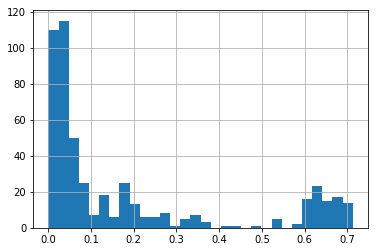

'0.0% de registros nulos'

'Variância: 0.0487186724785969'

count   500.00
mean      0.39
std       0.22
min       0.02
25%       0.20
50%       0.41
75%       0.55
max       0.82
Name: NU_PROP_DOM_RENDA_PERCAPITA_ABXO_1SM, dtype: float64

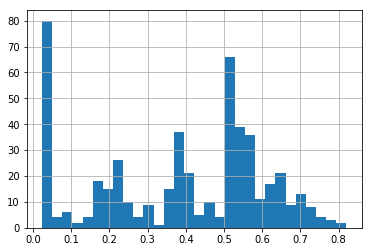

'0.0% de registros nulos'

'Variância: 0.00047009295134268516'

count   500.00
mean      0.52
std       0.02
min       0.40
25%       0.51
50%       0.52
75%       0.53
max       0.55
Name: NU_PROP_PSS_MULHERES, dtype: float64

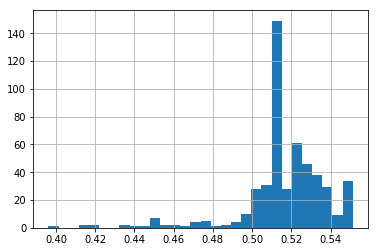

'0.0% de registros nulos'

'Variância: 0.0005504625773222439'

count   500.00
mean      0.13
std       0.02
min       0.02
25%       0.12
50%       0.13
75%       0.14
max       0.18
Name: NU_PROP_PSS_MULHERES_RSP, dtype: float64

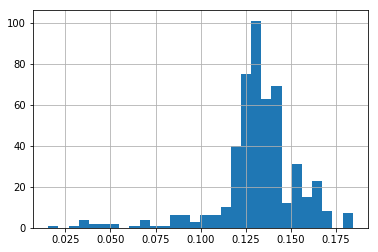

'0.0% de registros nulos'

'Variância: 0.001903211722492584'

count   500.00
mean      0.19
std       0.04
min       0.11
25%       0.16
50%       0.20
75%       0.22
max       0.30
Name: NU_PROP_PSS_ABXO_12ANOS, dtype: float64

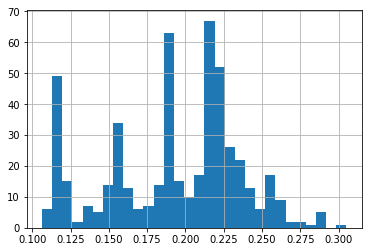

'0.0% de registros nulos'

'Variância: 0.0007824764366847454'

count   500.00
mean      0.06
std       0.03
min       0.01
25%       0.03
50%       0.05
75%       0.07
max       0.15
Name: NU_PROP_PSS_ACIMA_65ANOS, dtype: float64

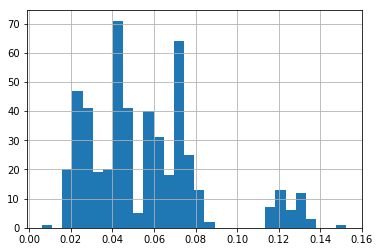

'0.0% de registros nulos'

'Variância: 9.0955089420056e-07'

count   500.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.01
Name: NU_PROP_PSS_ACIMA_90ANOS, dtype: float64

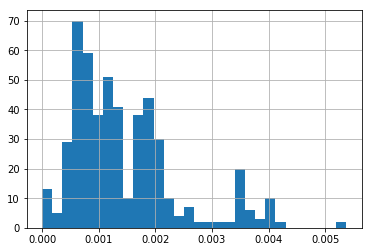

In [47]:
explora_df(f)

In [49]:
f.to_csv(f'{PATH_DF_CSV}features_escolas.csv')

In [ ]:
fkm = f.copy()

In [61]:
display(plota_matriz_heatmap(fkm.corr()))

In [64]:
fkm.drop(['IN_ESGOTO_FOSSA','IN_QUADRA_ESPORTES_DESCOBERTA'],axis=1,inplace=True)

In [70]:
vs = []
for i in range(2,9):
    km = kmeans_professores(fkm,i)
    p = pd.Series(km.labels_).value_counts()
    v = np.min(p)/np.max(p)    
    vs.append(v)
    display(f'{i} - {v}')
    display(p)

display(f'O conjunto com a menor diferenca entre o maximo e o minimo foi {np.argmax(vs) + 2} com {max(vs)}.')

'2 - 0.5873015873015873'

1    315
0    185
dtype: int64

'3 - 0.609375'

2    192
1    191
0    117
dtype: int64

'4 - 0.5'

1    168
2    156
0     92
3     84
dtype: int64

'5 - 0.5039370078740157'

4    127
2    121
1    100
3     88
0     64
dtype: int64

'6 - 0.5585585585585585'

1    111
3    100
5     88
4     75
0     64
2     62
dtype: int64

'7 - 0.5463917525773195'

6    97
5    94
3    77
1    61
4    60
2    58
0    53
dtype: int64

'8 - 0.5517241379310345'

0    87
1    80
6    66
5    60
4    54
7    53
3    52
2    48
dtype: int64

'O conjunto com a menor diferenca entre o maximo e o minimo foi 3 com 0.609375.'

In [71]:
km = kmeans_professores(fkm,3)
f['ROTULO_ESCOLA'] = km.labels_
display(f.ROTULO_ESCOLA.value_counts())

2    192
1    191
0    117
Name: ROTULO_ESCOLA, dtype: int64

Base de TREINO
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        84
          1       1.00      1.00      1.00       146
          2       1.00      1.00      1.00       145

avg / total       1.00      1.00      1.00       375

Base de TESTE
             precision    recall  f1-score   support

          0       0.80      0.73      0.76        33
          1       0.80      0.73      0.77        45
          2       0.72      0.83      0.77        47

avg / total       0.77      0.77      0.77       125



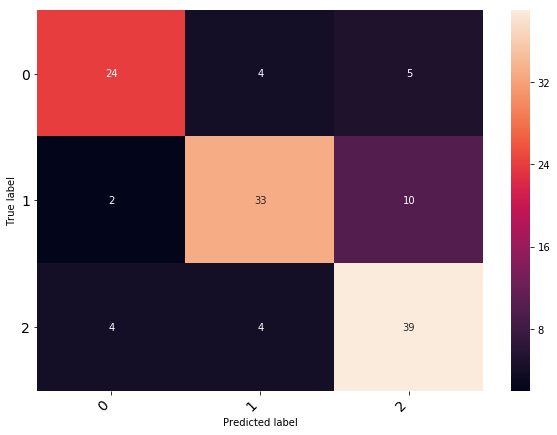

Nao foi possivel mostrar a ROC.
Feature ranking:
1. feature NU_FUNCIONARIOS (0.081576)
2. feature IN_AREA_VERDE (0.076792)
3. feature IN_DESPENSA (0.061274)
4. feature NU_COMPUTADOR (0.060553)
5. feature NU_COMP_ALUNO (0.037095)
6. feature IN_DEPENDENCIAS_PNE (0.036277)
7. feature IN_QUADRA_ESPORTES (0.034556)
8. feature IN_BANHEIRO_CHUVEIRO (0.030895)
9. feature NU_PROP_DOM_RENDA_PERCAPITA_ABXO_1SM (0.030112)
10. feature NU_MEDIANA_QTD_PESSOAS (0.026650)
11. feature NU_PROP_FUNS_SALAS_UTZD (0.024604)
12. feature NU_PROP_PSS_ACIMA_65ANOS (0.024042)
13. feature IN_BANHEIRO_PNE (0.023836)
14. feature NU_PROP_PSS_ABXO_12ANOS (0.021289)
15. feature IN_PATIO_DESCOBERTO (0.020711)
16. feature NU_PROP_PSS_MULHERES (0.020295)
17. feature NU_MEDIANA_QTD_DOMICILIOS (0.019935)
18. feature NU_SOMA_QTD_DOMICILIOS (0.019714)
19. feature NU_PROP_DOM_CEDIDOS (0.019611)
20. feature NU_PROP_PSS_MULHERES_RSP (0.019168)
21. feature IN_ESGOTO_FOSSA (0.017791)
22. feature NU_QTD_SETORES_CENSITARIOS (0.01724

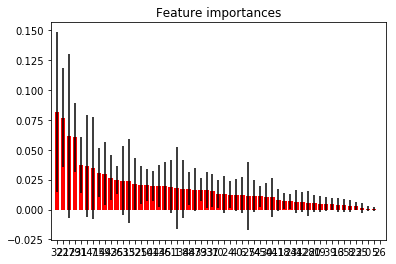

(['NU_FUNCIONARIOS',
  'IN_AREA_VERDE',
  'IN_DESPENSA',
  'NU_COMPUTADOR',
  'NU_COMP_ALUNO',
  'IN_DEPENDENCIAS_PNE',
  'IN_QUADRA_ESPORTES',
  'IN_BANHEIRO_CHUVEIRO',
  'NU_PROP_DOM_RENDA_PERCAPITA_ABXO_1SM',
  'NU_MEDIANA_QTD_PESSOAS',
  'NU_PROP_FUNS_SALAS_UTZD',
  'NU_PROP_PSS_ACIMA_65ANOS',
  'IN_BANHEIRO_PNE',
  'NU_PROP_PSS_ABXO_12ANOS',
  'IN_PATIO_DESCOBERTO',
  'NU_PROP_PSS_MULHERES',
  'NU_MEDIANA_QTD_DOMICILIOS',
  'NU_SOMA_QTD_DOMICILIOS',
  'NU_PROP_DOM_CEDIDOS',
  'NU_PROP_PSS_MULHERES_RSP',
  'IN_ESGOTO_FOSSA',
  'NU_QTD_SETORES_CENSITARIOS',
  'NU_PROP_DOM_RENDA_PERCAPITA_ACIMA_5SM',
  'NU_PROP_DOM_EM_AQUISICAO',
  'NU_MEDIA_DISTANCIA_ESCOLA_SETOR',
  'TP_AEE',
  'NU_PROP_CPU_SALAS_UTZD',
  'IN_BIBLIOTECA_SALA_LEITURA',
  'IN_LABORATORIO_INFORMATICA',
  'IN_SALA_ATENDIMENTO_ESPECIAL',
  'NU_MEDIANA_RENDA_MEDIA',
  'IN_QUADRA_ESPORTES_DESCOBERTA',
  'IN_EQUIP_FAX',
  'NU_PROP_PSS_ACIMA_90ANOS',
  'NU_PROP_DOM_ALUGADOS',
  'NU_COMP_ADMINISTRATIVO',
  'NU_SOMA_QTD_PESSO

In [72]:
processa_tudo(f,tg='ROTULO_ESCOLA')

<img src='img/hommer_get_gp.png'/>

In [74]:
f.to_csv(f'{PATH_DF_CSV}features_escolas.csv')

In [75]:
features_escolas = pd.read_csv(f'{PATH_DF_CSV}features_escolas.csv',index_col='CO_ENTIDADE')

<img src='img/LisaSchoolRoom.gif'/>

<h1> Matriculas </h1>

In [79]:
turmas_interesse = dfs[2015].loc[dfs[2015].CO_ENTIDADE.isin(features_escolas.index)].ID_TURMA.unique()
fmv = lambda df: df.loc[df.PK_COD_TURMA.isin(turmas_interesse)] 
fmn = lambda df: df.loc[df.ID_TURMA.isin(turmas_interesse)] 
l_df_matricula = lambda ano: ajusta_colunas_int_df_inep(monta_df_docente(f'{ARQ_PATH}/{ano}/MATRICULA_CO.CSV'))

matriculas_df = {a : fmn(l_df_matricula(a)) if a >= 2015 else fmv(l_df_matricula(a)) for a in tqdm(anos_psq)}


  0%|          | 0/7 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [78]:
[v.to_csv(f'{ARQ_PATH}MATRICULAS_FILTRADAS_{k}.csv',index=False) for k,v in tqdm(matriculas_df.items())]; 


100%|██████████| 7/7 [00:33<00:00,  4.76s/it]


[None, None, None, None, None, None, None]

In [ ]:
matriculas_df = {a : ajusta_colunas_int_df_inep(pd.read_csv(f'{ARQ_PATH}MATRICULAS_FILTRADAS_{a}.csv',low_memory=False)) for a in tqdm(anos_psq)}

In [105]:
alunos_interesse = matriculas_df[2015].CO_PESSOA_FISICA.unique()
fav = lambda df: df.loc[df.FK_COD_ALUNO.isin(alunos_interesse)] 
fan = lambda df: df.loc[df.CO_PESSOA_FISICA.isin(alunos_interesse)] 

alunos_df = {a : fan(l_df_matricula(a)) if a >= 2015 else fav(l_df_matricula(a)) for a in tqdm(anos_psq)}



  0%|          | 0/7 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [00:45<04:31, 45.21s/it]

 29%|██▊       | 2/7 [01:37<04:02, 48.57s/it]

 43%|████▎     | 3/7 [02:31<03:22, 50.54s/it]

 57%|█████▋    | 4/7 [04:07<03:05, 61.87s/it]

 71%|███████▏  | 5/7 [05:48<02:19, 69.63s/it]

 86%|████████▌ | 6/7 [07:32<01:15, 75.39s/it]

100%|██████████| 7/7 [09:16<00:00, 79.52s/it]



In [106]:
[v.to_csv(f'{ARQ_PATH}ALUNOS_FILTRADOS_{k}.csv',index=False) for k,v in tqdm(alunos_df.items())]; 



  0%|          | 0/7 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [00:06<00:39,  6.57s/it]

 29%|██▊       | 2/7 [00:16<00:41,  8.26s/it]

 43%|████▎     | 3/7 [00:28<00:38,  9.58s/it]

 57%|█████▋    | 4/7 [00:52<00:39, 13.03s/it]

 71%|███████▏  | 5/7 [01:17<00:30, 15.43s/it]

 86%|████████▌ | 6/7 [01:45<00:17, 17.55s/it]

100%|██████████| 7/7 [02:03<00:00, 17.68s/it]



In [ ]:
alunos_df = {a : ajusta_colunas_int_df_inep(pd.read_csv(f'{ARQ_PATH}ALUNOS_FILTRADAS_{a}.csv',low_memory=False)) for a in tqdm(anos_psq)}

In [82]:
matriculas_df[2015].head()

NU_ANO_CENSO  ID_MATRICULA  CO_PESSOA_FISICA  NU_DIA  NU_MES  NU_ANO  \
32          2015     105874465      110174229150      30       5    1998   
35          2015     105876922      119831893165      17       1    1999   
40          2015     105875659      113354964080       6       2    1998   
44          2015     105876291      114722786312      18      12    1998   
48          2015     106307563      113193719578       8       7    1997   

    NU_IDADE_REFERENCIA  NU_IDADE  NU_DURACAO_TURMA  \
32                   17        17            315.00   
35                   16        16            315.00   
40                   17        17            315.00   
44                   16        17            315.00   
48                   17        18            315.00   

    NU_DUR_ATIV_COMP_MESMA_REDE          ...           IN_CONVENIADA_PP  \
32                         0.00          ...                        nan   
35                         0.00          ...                        nan   
40                         0.00          ...                        nan   
44                         0.00          ...                        nan   
48                        36.00          ...                        nan   

    TP_CONVENIO_PODER_PUBLICO  IN_MANT_ESCOLA_PRIVADA_EMP  \
32                        nan                         nan   
35                        nan                         nan   
40                        nan                         nan   
44                        nan                         nan   
48                        nan                         nan   

    IN_MANT_ESCOLA_PRIVADA_ONG  IN_MANT_ESCOLA_PRIVADA_SIND  \
32                         nan                          nan   
35                         nan                          nan   
40                         nan                          nan   
44                         nan                          nan   
48                         nan                          nan   

    IN_MANT_ESCOLA_PRIVADA_SIST_S  IN_MANT_ESCOLA_PRIVADA_S_FINS  \
32                            nan                            nan   
35                            nan                            nan   
40                            nan                            nan   
44                            nan                            nan   
48                            nan                            nan   

    TP_REGULAMENTACAO  TP_LOCALIZACAO_DIFERENCIADA  IN_EDUCACAO_INDIGENA  
32                  1                            0                     0  
35                  1                            0                     0  
40                  1                            0                     0  
44                  1                            0                     0  
48                  1                            0                     0  

[5 rows x 93 columns]

In [132]:
cols_mtr = ['ID_MATRICULA','CO_PESSOA_FISICA',
'NU_IDADE_REFERENCIA','NU_DURACAO_TURMA',
'NU_DUR_ATIV_COMP_MESMA_REDE',
'NU_DUR_ATIV_COMP_OUTRAS_REDES',
'NU_DUR_AEE_MESMA_REDE',
'NU_DUR_AEE_OUTRAS_REDES',
'NU_DIAS_ATIVIDADE',
'TP_SEXO','TP_COR_RACA',
'CO_UF_NASC','CO_UF_END',
'TP_ZONA_RESIDENCIAL',
'IN_TRANSPORTE_PUBLICO',
'IN_TRANSP_VANS_KOMBI','IN_TRANSP_MICRO_ONIBUS',
'IN_TRANSP_ONIBUS','IN_TRANSP_BICICLETA',
'IN_TRANSP_TR_ANIMAL','IN_TRANSP_OUTRO_VEICULO',
'IN_TRANSP_EMBAR_ATE5','IN_TRANSP_EMBAR_5A15',
'IN_TRANSP_EMBAR_15A35','IN_TRANSP_EMBAR_35',
'IN_TRANSP_TREM_METRO','IN_NECESSIDADE_ESPECIAL',
'IN_CEGUEIRA','IN_BAIXA_VISAO',
'IN_SURDEZ','IN_DEF_AUDITIVA',
'IN_SURDOCEGUEIRA','IN_DEF_FISICA',
'IN_DEF_INTELECTUAL','IN_DEF_MULTIPLA',
'IN_AUTISMO','IN_SINDROME_ASPERGER',
'IN_SINDROME_RETT','IN_TRANSTORNO_DI',
'IN_SUPERDOTACAO','IN_RECURSO_LEDOR',
'IN_RECURSO_TRANSCRICAO','IN_RECURSO_INTERPRETE',
'IN_RECURSO_LIBRAS','IN_RECURSO_LABIAL',
'IN_RECURSO_BRAILLE','IN_RECURSO_AMPLIADA_16',
'IN_RECURSO_AMPLIADA_20','IN_RECURSO_AMPLIADA_24',
'IN_RECURSO_NENHUM',
'TP_MEDIACAO_DIDATICO_PEDAGO','IN_ESPECIAL_EXCLUSIVA',
'IN_REGULAR','IN_EJA',
'IN_PROFISSIONALIZANTE','TP_ETAPA_ENSINO',
'ID_TURMA', 'CO_ENTIDADE'
]

In [153]:
aln15 = alunos_df[2015][cols_mtr].copy()
idd_max_etapa = {
    1  : 4, 2  : 6,  4  : 7, 5  : 8, 6  : 9, 7  : 10, 8  : 11, 9  : 12, 
    10 : 13, 11 : 14, 14 : 7, 15 : 8, 16 : 9, 17 : 10, 18 : 11, 19 : 12,
    20 : 13, 21 : 14, 41 : 15, 25 : 16, 26 : 17, 27 : 18, 28 : 19, 
    30 : 16, 31 : 17, 32 : 18, 33 : 19, 35 : 16, 36 : 17, 37 : 18, 38 : 19
}
cd = []
aln15['IN_IDD_CORRETA'] = aln15.apply(lambda lin: lin['NU_IDADE_REFERENCIA'] <= idd_max_etapa[lin['TP_ETAPA_ENSINO']] if lin['TP_ETAPA_ENSINO'] in idd_max_etapa.keys()
                                      else 0,axis=1).astype(np.int8)
cd.append('TP_ETAPA_ENSINO')
aln15['IN_NATURAL_DF'] = (aln15.CO_UF_NASC == 53).astype(np.int8)
cd.append('CO_UF_NASC')
aln15['IN_RESIDE_DF'] = (aln15.CO_UF_END == 53).astype(np.int8)
cd.append('CO_UF_END')
aln15['NU_ANOS_TURMA'] = 1
aln15['NU_ANOS_ESCOLA'] = 1
aln15['NU_ANOS_REDE_PBC_DF'] = 1
for k in anos_psq[:-2]:
    v = alunos_df[k]
    #display(f'{k} - {v.shape} / {aln15.loc[aln15.NU_ANOS_TURMA == 0].shape}')
    a = aln15[['CO_PESSOA_FISICA','ID_TURMA']].merge(v[['FK_COD_ALUNO','PK_COD_TURMA']],
                left_on = ['CO_PESSOA_FISICA','ID_TURMA'],
                right_on = ['FK_COD_ALUNO','PK_COD_TURMA'])[['CO_PESSOA_FISICA','ID_TURMA']]
    aln15.loc[(aln15.CO_PESSOA_FISICA.isin(a.CO_PESSOA_FISICA)) & 
              (aln15.NU_ANOS_TURMA == 0),'NU_ANOS_TURMA'] = 2015 - k
    
    a = aln15[['CO_PESSOA_FISICA','CO_ENTIDADE']].merge(v[['FK_COD_ALUNO','PK_COD_ENTIDADE']],
                left_on = ['CO_PESSOA_FISICA','CO_ENTIDADE'],
                right_on = ['FK_COD_ALUNO','PK_COD_ENTIDADE'])
    aln15.loc[(aln15.CO_PESSOA_FISICA.isin(a.CO_PESSOA_FISICA)) & 
              (aln15.NU_ANOS_ESCOLA == 0),'NU_ANOS_ESCOLA'] = 2015 - k

    aln15.loc[(aln15.CO_PESSOA_FISICA.isin(v[v.ID_DEPENDENCIA_ADM_ESC == 2].FK_COD_ALUNO.values)) & 
              (aln15.NU_ANOS_REDE_PBC_DF == 0),'NU_ANOS_REDE_PBC_DF'] = 2015 - k

aln15['NU_PROP_VIDA_ESCOLA'] = (aln15['NU_ANOS_ESCOLA']/aln15['NU_IDADE_REFERENCIA'].clip_lower(1))
aln15['NU_PROP_VIDA_REDE_PBC'] = (aln15['NU_ANOS_REDE_PBC_DF']/aln15['NU_IDADE_REFERENCIA'].clip_lower(1))

aln15 = aln15.merge(pd.get_dummies(aln15.TP_COR_RACA,prefix='TP_COR_RACA',dtype=np.int8),right_index=True,left_index=True)     
cd.append('TP_COR_RACA')
#aln15['IN_TURMA_ANO_ANTEIOR'] = aln15.CO_PESSOA_FISICA alunos_df[2014].loc[FK_COD_ALUNO]


'0.0% de registros nulos'

'Variância: 47.91818505759569'

count   384829.00
mean        13.42
std          6.92
min          0.00
25%          9.00
50%         13.00
75%         16.00
max         83.00
Name: NU_IDADE_REFERENCIA, dtype: float64

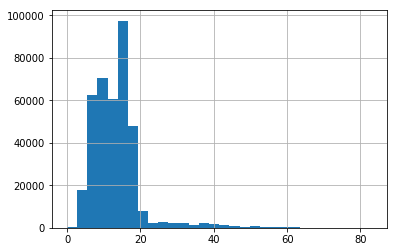

'0.6951139337212112% de registros nulos'

'Variância: nan'

count   382154.00
mean          nan
std           nan
min         20.00
25%        255.00
50%        300.00
75%        300.00
max        660.00
Name: NU_DURACAO_TURMA, dtype: float64

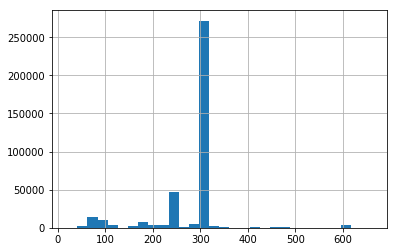

'15.311995717578458% de registros nulos'

'Variância: nan'

count   325904.00
mean          nan
std           nan
min          0.00
25%          0.00
50%          0.00
75%          0.00
max        390.00
Name: NU_DUR_ATIV_COMP_MESMA_REDE, dtype: float64

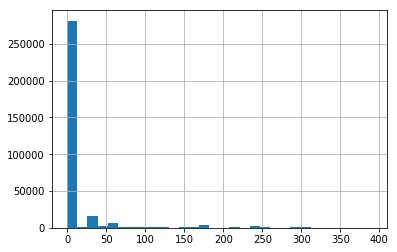

'15.311995717578458% de registros nulos'

'Variância: nan'

count   325904.00
mean         0.05
std           nan
min          0.00
25%          0.00
50%          0.00
75%          0.00
max        300.00
Name: NU_DUR_ATIV_COMP_OUTRAS_REDES, dtype: float64

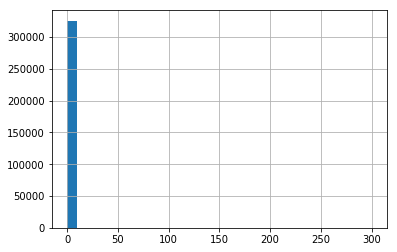

'15.311995717578458% de registros nulos'

'Variância: nan'

count   325904.00
mean          nan
std           nan
min          0.00
25%          0.00
50%          0.00
75%          0.00
max        600.00
Name: NU_DUR_AEE_MESMA_REDE, dtype: float64

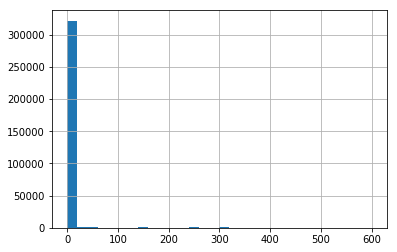

'15.311995717578458% de registros nulos'

'Variância: nan'

count   325904.00
mean         0.12
std           nan
min          0.00
25%          0.00
50%          0.00
75%          0.00
max        600.00
Name: NU_DUR_AEE_OUTRAS_REDES, dtype: float64

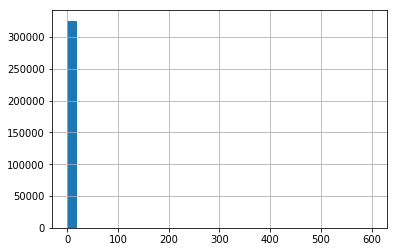

'0.0% de registros nulos'

'Variância: 1.3015873084009104'

qtd   pc
5  326030 0.85
2   24177 0.06
1   16375 0.04
4   10053 0.03
3    4366 0.01
0    2675 0.01
6    1153 0.00

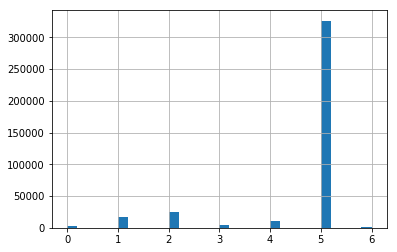

'0.0% de registros nulos'

'Variância: 0.24999973767155298'

qtd   pc
1  192782 0.50
2  192047 0.50

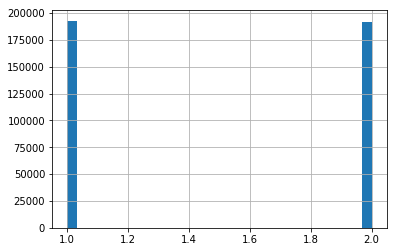

'0.0% de registros nulos'

'Variância: 0.057446648105885026'

qtd   pc
1  361281 0.94
2   23548 0.06

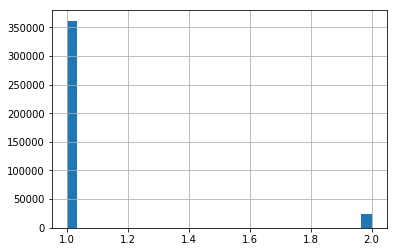

'0.0% de registros nulos'

'Variância: 0.07876490479250461'

qtd   pc
0  351659 0.91
1   33170 0.09

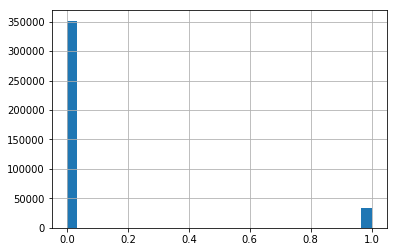

'91.38058722185698% de registros nulos'

'Variância: 0.00012058019638061523'

qtd   pc
0.00  33166 0.09
1.00      4 0.00

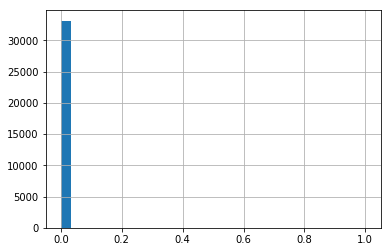

'91.38058722185698% de registros nulos'

'Variância: 0.02593994140625'

qtd   pc
0.00  32285 0.08
1.00    885 0.00

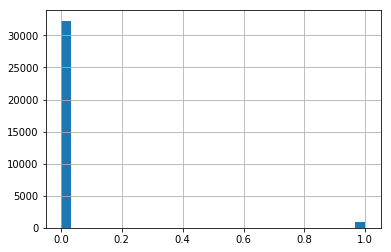

'91.38058722185698% de registros nulos'

'Variância: 0.0203399658203125'

qtd   pc
1.00  32482 0.08
0.00    688 0.00

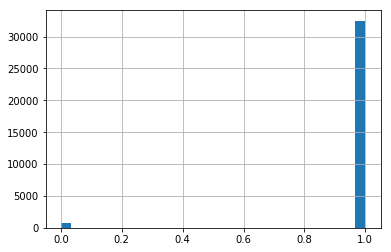

'91.38058722185698% de registros nulos'

'Variância: 0.00024116039276123047'

qtd   pc
0.00  33162 0.09
1.00      8 0.00

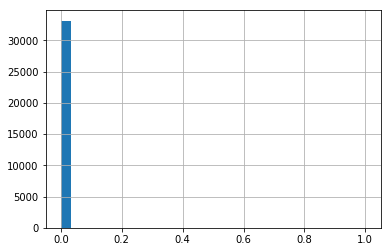

'91.38058722185698% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  33170 0.09

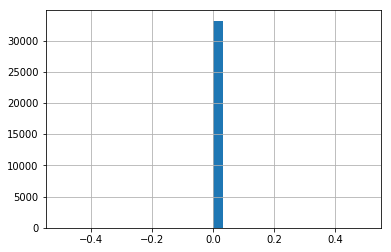

'91.38058722185698% de registros nulos'

'Variância: 0.00027108192443847656'

qtd   pc
0.00  33161 0.09
1.00      9 0.00

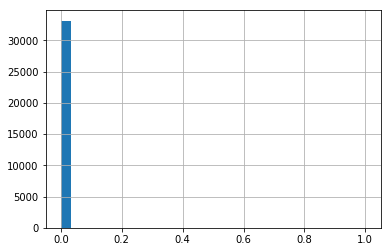

'91.38058722185698% de registros nulos'

'Variância: 0.00012058019638061523'

qtd   pc
0.00  33166 0.09
1.00      4 0.00

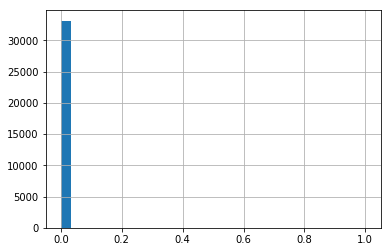

'91.38058722185698% de registros nulos'

'Variância: 6.031990051269531e-05'

qtd   pc
0.00  33168 0.09
1.00      2 0.00

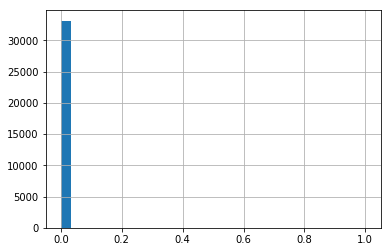

'91.38058722185698% de registros nulos'

'Variância: 0.0367431640625'

qtd   pc
0.00  31904 0.08
1.00   1266 0.00

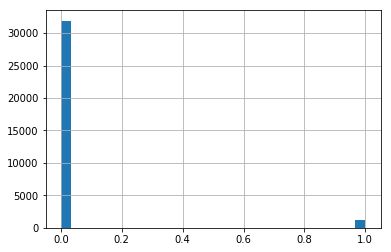

'91.38058722185698% de registros nulos'

'Variância: 0.04388427734375'

qtd   pc
0.00  31644 0.08
1.00   1526 0.00

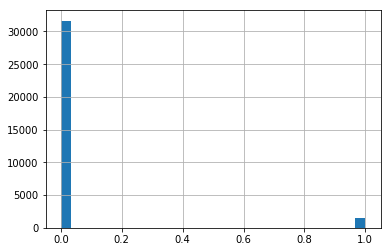

'91.38058722185698% de registros nulos'

'Variância: 0.0014429092407226562'

qtd   pc
0.00  33122 0.09
1.00     48 0.00

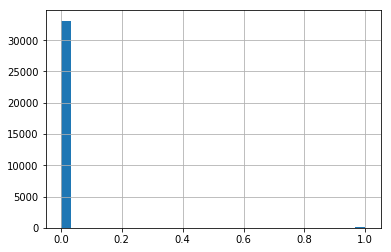

'0.0% de registros nulos'

'Variância: 0.04252248699172411'

qtd   pc
0  367703 0.96
1   17126 0.04

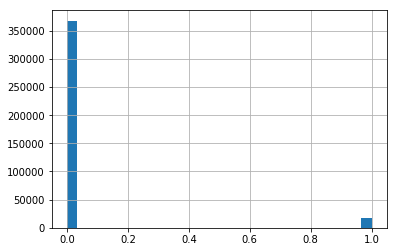

'95.54971169012731% de registros nulos'

'Variância: 0.00792694091796875'

qtd   pc
0.00  16989 0.04
1.00    137 0.00

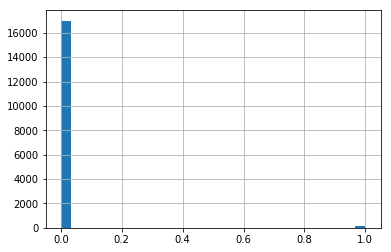

'95.54971169012731% de registros nulos'

'Variância: 0.03973388671875'

qtd   pc
0.00  16415 0.04
1.00    711 0.00

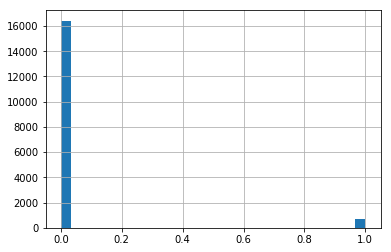

'95.54971169012731% de registros nulos'

'Variância: 0.0157470703125'

qtd   pc
0.00  16852 0.04
1.00    274 0.00

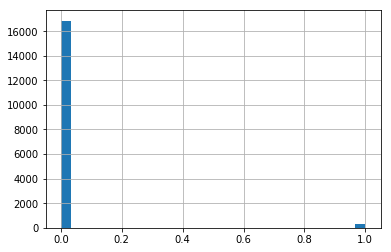

'95.54971169012731% de registros nulos'

'Variância: 0.0809326171875'

qtd   pc
0.00  15604 0.04
1.00   1522 0.00

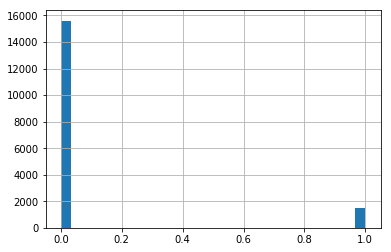

'95.54971169012731% de registros nulos'

'Variância: 0.0009336471557617188'

qtd   pc
0.00  17110 0.04
1.00     16 0.00

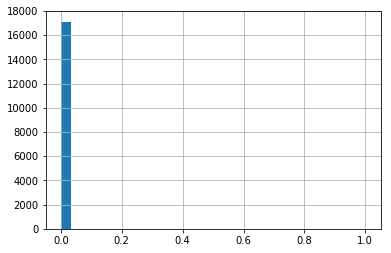

'95.54971169012731% de registros nulos'

'Variância: 0.1512451171875'

qtd   pc
0.00  13948 0.04
1.00   3178 0.01

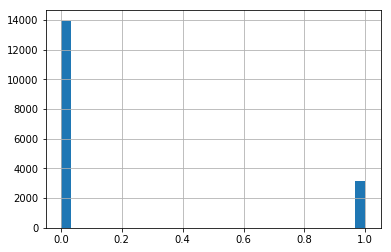

'95.54971169012731% de registros nulos'

'Variância: 0.249267578125'

qtd   pc
1.00  8924 0.02
0.00  8202 0.02

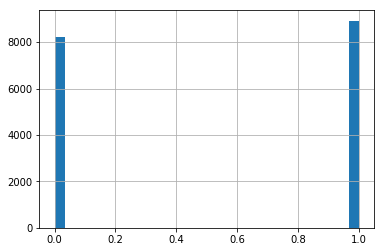

'95.54971169012731% de registros nulos'

'Variância: 0.05322265625'

qtd   pc
0.00  16159 0.04
1.00    967 0.00

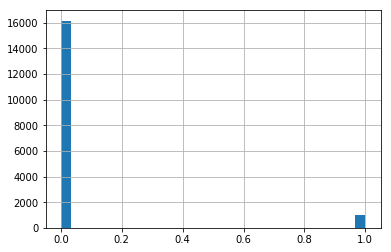

'95.54971169012731% de registros nulos'

'Variância: 0.064453125'

qtd   pc
0.00  15938 0.04
1.00   1188 0.00

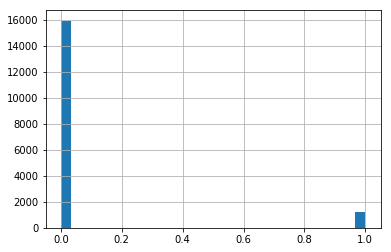

'95.54971169012731% de registros nulos'

'Variância: 0.0170135498046875'

qtd   pc
0.00  16830 0.04
1.00    296 0.00

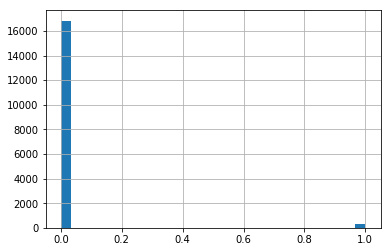

'95.54971169012731% de registros nulos'

'Variância: 0.00116729736328125'

qtd   pc
0.00  17106 0.04
1.00     20 0.00

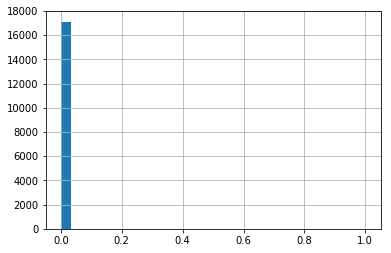

'95.54971169012731% de registros nulos'

'Variância: 0.021270751953125'

qtd   pc
0.00  16754 0.04
1.00    372 0.00

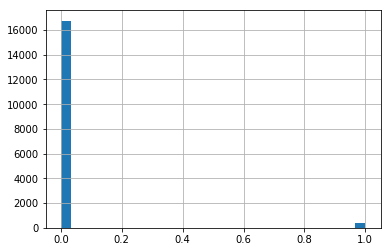

'95.54971169012731% de registros nulos'

'Variância: 0.088134765625'

qtd   pc
0.00  15456 0.04
1.00   1670 0.00

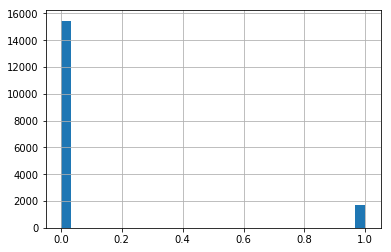

'96.35682342027239% de registros nulos'

'Variância: 0.1446533203125'

qtd   pc
0.00  11559 0.03
1.00   2461 0.01

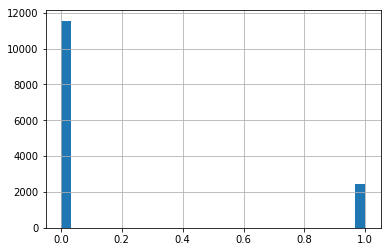

'96.35682342027239% de registros nulos'

'Variância: 0.06768798828125'

qtd   pc
0.00  12996 0.03
1.00   1024 0.00

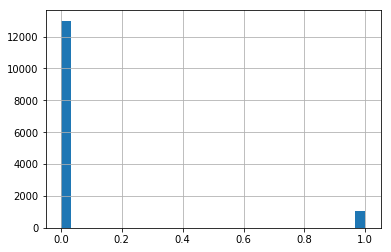

'96.35682342027239% de registros nulos'

'Variância: 0.00028514862060546875'

qtd   pc
0.00  14016 0.04
1.00      4 0.00

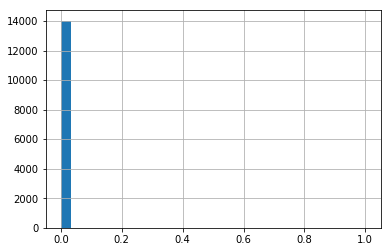

'96.35682342027239% de registros nulos'

'Variância: 0.058929443359375'

qtd   pc
0.00  13140 0.03
1.00    880 0.00

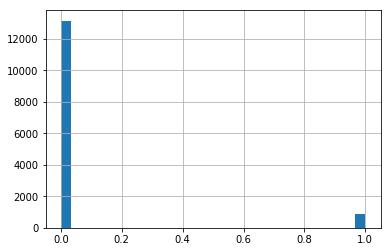

'96.35682342027239% de registros nulos'

'Variância: 0.01065826416015625'

qtd   pc
0.00  13869 0.04
1.00    151 0.00

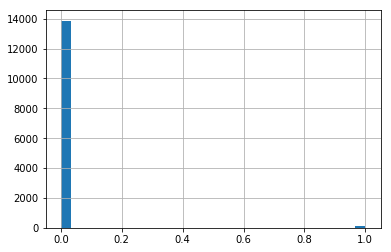

'96.35682342027239% de registros nulos'

'Variância: 0.003192901611328125'

qtd   pc
0.00  13975 0.04
1.00     45 0.00

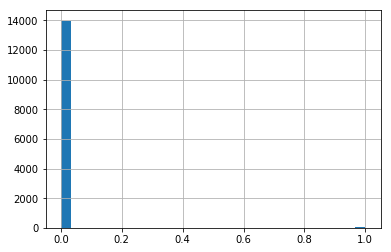

'96.35682342027239% de registros nulos'

'Variância: 0.01031494140625'

qtd   pc
0.00  13874 0.04
1.00    146 0.00

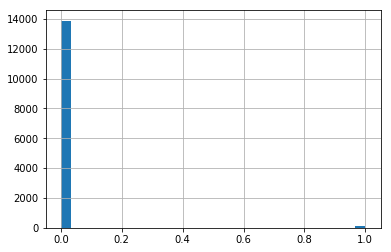

'96.35682342027239% de registros nulos'

'Variância: 0.0055999755859375'

qtd   pc
0.00  13941 0.04
1.00     79 0.00

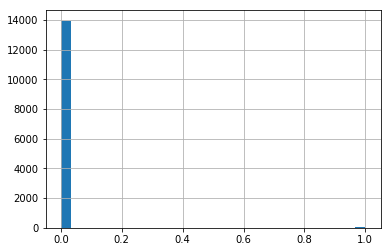

'96.35682342027239% de registros nulos'

'Variância: 0.0069427490234375'

qtd   pc
0.00  13922 0.04
1.00     98 0.00

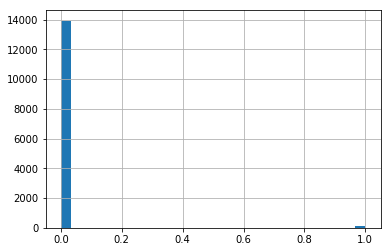

'96.35682342027239% de registros nulos'

'Variância: 0.202392578125'

qtd   pc
1.00  10074 0.03
0.00   3946 0.01

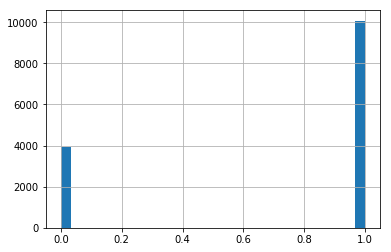

'99.9877867832206% de registros nulos'

'Variância: 3.42578125'

qtd   pc
2.00   39 0.00
8.00    4 0.00
1.00    3 0.00
7.00    1 0.00

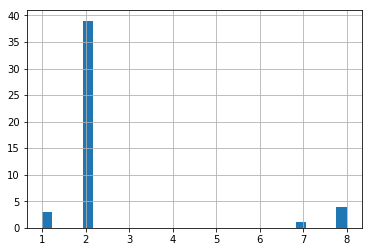

'0.0% de registros nulos'

'Variância: 0.027271511373416928'

qtd   pc
1  382154 0.99
3    2631 0.01
2      44 0.00

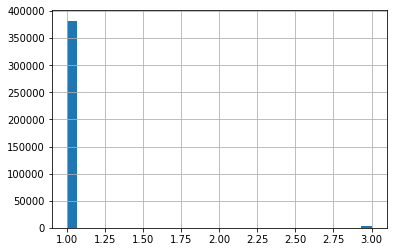

'15.311995717578458% de registros nulos'

'Variância: 0.006694793701171875'

qtd   pc
0.00  323704 0.84
1.00    2200 0.01

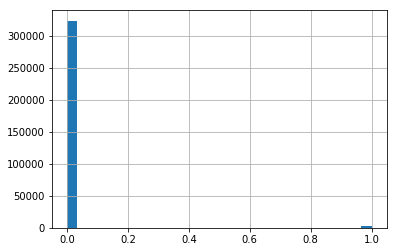

'15.311995717578458% de registros nulos'

'Variância: 0.0'

qtd   pc
1.00  280569 0.73
0.00   45335 0.12

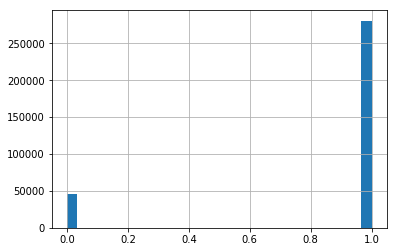

'15.311995717578458% de registros nulos'

'Variância: 0.10675048828125'

qtd   pc
0.00  286322 0.74
1.00   39582 0.10

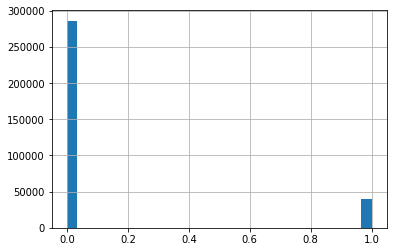

'15.311995717578458% de registros nulos'

'Variância: 0.0186767578125'

qtd   pc
0.00  319695 0.83
1.00    6209 0.02

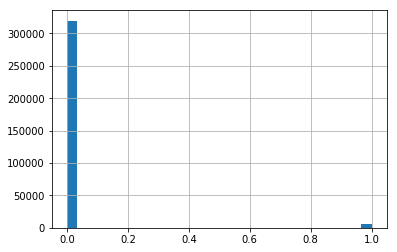

'15.311995717578458% de registros nulos'

'Variância: 0.0'

qtd   pc
3.00  104535 0.27
2.00   91798 0.24
4.00   64905 0.17
9.00   20215 0.05
8.00   19367 0.05
1.00   18878 0.05
7.00    5753 0.01
6.00     453 0.00

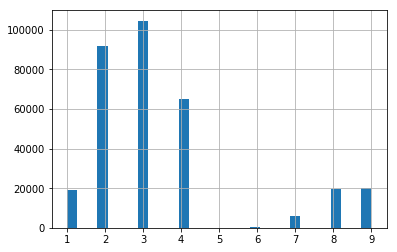

'0.0% de registros nulos'

'Variância: 0.23609826663841255'

qtd   pc
1  237789 0.62
0  147040 0.38

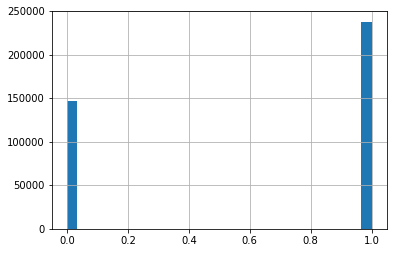

'0.0% de registros nulos'

'Variância: 0.15566044305294252'

qtd   pc
1  310614 0.81
0   74215 0.19

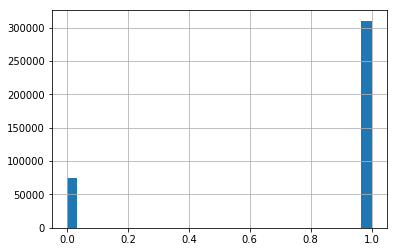

'0.0% de registros nulos'

'Variância: 0.15076497141508427'

qtd   pc
1  313642 0.82
0   71187 0.18

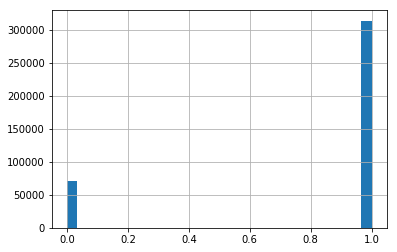

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
1  384829 1.00

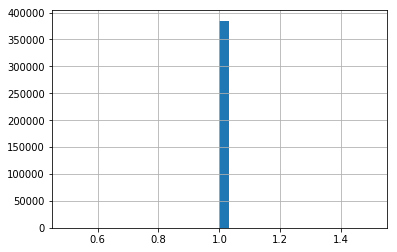

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
1  384829 1.00

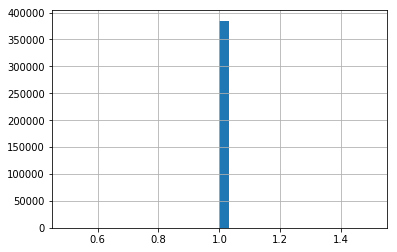

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
1  384829 1.00

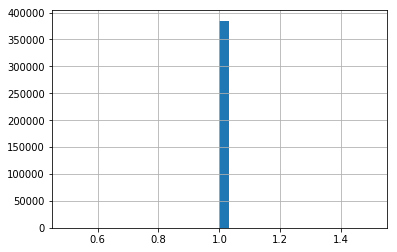

'0.0% de registros nulos'

'Variância: 0.002332491306236977'

count   384829.00
mean         0.09
std          0.05
min          0.01
25%          0.06
50%          0.08
75%          0.11
max          1.00
Name: NU_PROP_VIDA_ESCOLA, dtype: float64

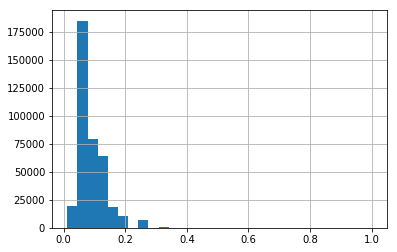

'0.0% de registros nulos'

'Variância: 0.002332491306236977'

count   384829.00
mean         0.09
std          0.05
min          0.01
25%          0.06
50%          0.08
75%          0.11
max          1.00
Name: NU_PROP_VIDA_REDE_PBC, dtype: float64

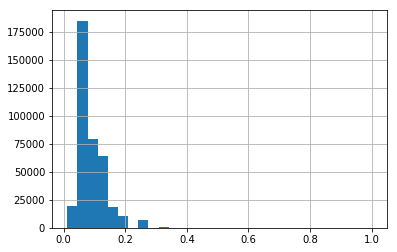

'0.0% de registros nulos'

'Variância: 0.23423374799330918'

qtd   pc
0  240736 0.63
1  144093 0.37

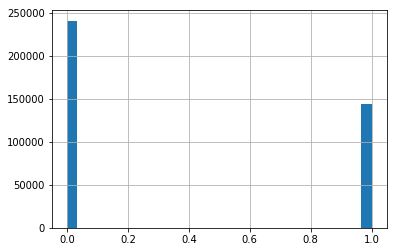

'0.0% de registros nulos'

'Variância: 0.15648232963117673'

qtd   pc
0  310098 0.81
1   74731 0.19

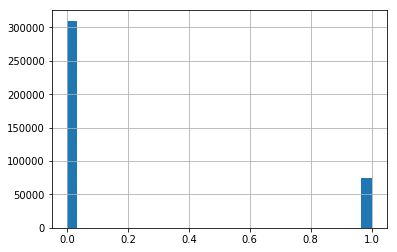

'0.0% de registros nulos'

'Variância: 0.02862137476020972'

qtd   pc
0  373480 0.97
1   11349 0.03

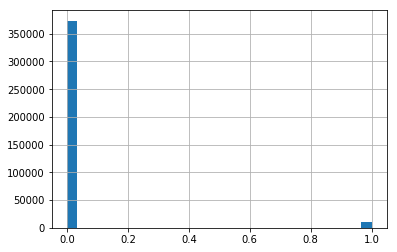

'0.0% de registros nulos'

'Variância: 0.23941082383397025'

qtd   pc
0  232016 0.60
1  152813 0.40

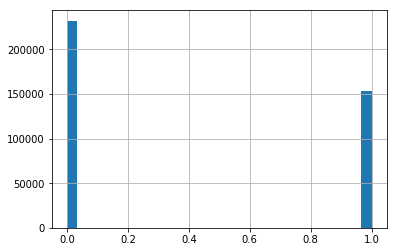

'0.0% de registros nulos'

'Variância: 0.003428661096288008'

qtd   pc
0  383505 1.00
1    1324 0.00

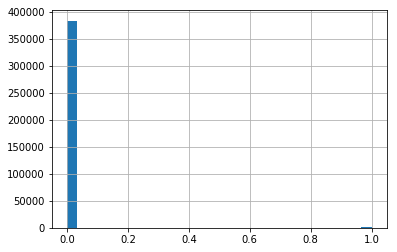

'0.0% de registros nulos'

'Variância: 0.001346835599676077'

qtd   pc
0  384310 1.00
1     519 0.00

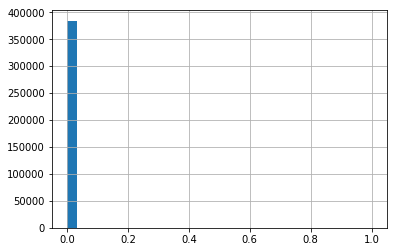

In [154]:
alunos = aln15.drop(cd,axis=1).set_index(['CO_PESSOA_FISICA','ID_TURMA','CO_ENTIDADE','ID_MATRICULA'])
explora_df(alunos)

In [155]:
f = alunos.copy()
#inicia o feature selection com a variancia e nulos
VARIANCIA_MINIMA = 0.05
PC_MAX_MODA = 0.9
PC_MAX_MODA_NU = 0.6
MAXIMO_DE_NULOS  = 0.05
qtd_ttl = f.shape[0]
cd = []
for c in f.columns:
    s = f[c]
    pc_nulos = s.isnull().sum() / qtd_ttl * 100
    try:
        a = f.loc[s == s.mode()[0]].shape[0]
    except:
        a = 0
        pass
    pc_moda = a/qtd_ttl
    if pc_moda > PC_MAX_MODA or (c.startswith('NU') and pc_moda > PC_MAX_MODA_NU) or pc_nulos > MAXIMO_DE_NULOS:
        #display(f'{c} - {pc_moda}')
        cd.append(c)
    
f.drop(cd,axis=1,inplace=True)
display(' '.join(f.columns))
display(f'Restaram {len(f.columns)/len(fte.columns)} das colunas')
display(f.var())
display(f.head())

'NU_IDADE_REFERENCIA TP_SEXO IN_IDD_CORRETA IN_NATURAL_DF IN_RESIDE_DF NU_PROP_VIDA_ESCOLA NU_PROP_VIDA_REDE_PBC TP_COR_RACA_0 TP_COR_RACA_1 TP_COR_RACA_3'

'Restaram 0.09345794392523364 das colunas'

NU_IDADE_REFERENCIA     47.92
TP_SEXO                  0.25
IN_IDD_CORRETA           0.24
IN_NATURAL_DF            0.16
IN_RESIDE_DF             0.15
NU_PROP_VIDA_ESCOLA      0.00
NU_PROP_VIDA_REDE_PBC    0.00
TP_COR_RACA_0            0.23
TP_COR_RACA_1            0.16
TP_COR_RACA_3            0.24
dtype: float64

NU_IDADE_REFERENCIA  \
CO_PESSOA_FISICA ID_TURMA CO_ENTIDADE ID_MATRICULA                        
110174229150     10026    53002580    105874465                      17   
119831893165     10026    53002580    105876922                      16   
113354964080     10026    53002580    105875659                      17   
114722786312     10026    53002580    105876291                      16   
113193719578     10026    53002580    106307563                      17   

                                                    TP_SEXO  IN_IDD_CORRETA  \
CO_PESSOA_FISICA ID_TURMA CO_ENTIDADE ID_MATRICULA                            
110174229150     10026    53002580    105874465           1               1   
119831893165     10026    53002580    105876922           2               1   
113354964080     10026    53002580    105875659           1               1   
114722786312     10026    53002580    105876291           1               1   
113193719578     10026    53002580    106307563           1               1   

                                                    IN_NATURAL_DF  \
CO_PESSOA_FISICA ID_TURMA CO_ENTIDADE ID_MATRICULA                  
110174229150     10026    53002580    105874465                 1   
119831893165     10026    53002580    105876922                 1   
113354964080     10026    53002580    105875659                 1   
114722786312     10026    53002580    105876291                 1   
113193719578     10026    53002580    106307563                 1   

                                                    IN_RESIDE_DF  \
CO_PESSOA_FISICA ID_TURMA CO_ENTIDADE ID_MATRICULA                 
110174229150     10026    53002580    105874465                1   
119831893165     10026    53002580    105876922                1   
113354964080     10026    53002580    105875659                1   
114722786312     10026    53002580    105876291                1   
113193719578     10026    53002580    106307563                1   

                                                    NU_PROP_VIDA_ESCOLA  \
CO_PESSOA_FISICA ID_TURMA CO_ENTIDADE ID_MATRICULA                        
110174229150     10026    53002580    105874465                    0.06   
119831893165     10026    53002580    105876922                    0.06   
113354964080     10026    53002580    105875659                    0.06   
114722786312     10026    53002580    105876291                    0.06   
113193719578     10026    53002580    106307563                    0.06   

                                                    NU_PROP_VIDA_REDE_PBC  \
CO_PESSOA_FISICA ID_TURMA CO_ENTIDADE ID_MATRICULA                          
110174229150     10026    53002580    105874465                      0.06   
119831893165     10026    53002580    105876922                      0.06   
113354964080     10026    53002580    105875659                      0.06   
114722786312     10026    53002580    105876291                      0.06   
113193719578     10026    53002580    106307563                      0.06   

                                                    TP_COR_RACA_0  \
CO_PESSOA_FISICA ID_TURMA CO_ENTIDADE ID_MATRICULA                  
110174229150     10026    53002580    105874465                 1   
119831893165     10026    53002580    105876922                 0   
113354964080     10026    53002580    105875659                 1   
114722786312     10026    53002580    105876291                 0   
113193719578     10026    53002580    106307563                 1   

                                                    TP_COR_RACA_1  \
CO_PESSOA_FISICA ID_TURMA CO_ENTIDADE ID_MATRICULA                  
110174229150     10026    53002580    105874465                 0   
119831893165     10026    53002580    105876922                 0   
113354964080     10026    53002580    105875659                 0   
114722786312     10026    53002580    105876291                 1   
113193719578     10026    53002580    106307563

In [156]:
f[f.isnull().T.any().T]

Empty DataFrame
Columns: [NU_IDADE_REFERENCIA, TP_SEXO, IN_IDD_CORRETA, IN_NATURAL_DF, IN_RESIDE_DF, NU_PROP_VIDA_ESCOLA, NU_PROP_VIDA_REDE_PBC, TP_COR_RACA_0, TP_COR_RACA_1, TP_COR_RACA_3]
Index: []

'0.0% de registros nulos'

'Variância: 47.91818505759569'

count   384829.00
mean        13.42
std          6.92
min          0.00
25%          9.00
50%         13.00
75%         16.00
max         83.00
Name: NU_IDADE_REFERENCIA, dtype: float64

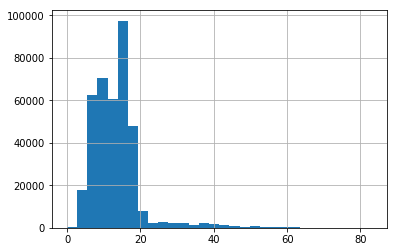

'0.0% de registros nulos'

'Variância: 0.24999973767155298'

qtd   pc
1  192782 0.50
2  192047 0.50

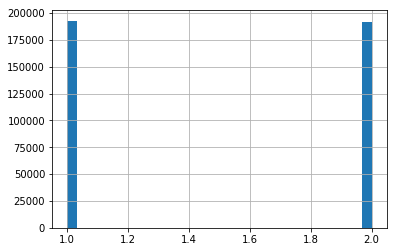

'0.0% de registros nulos'

'Variância: 0.23609826663841255'

qtd   pc
1  237789 0.62
0  147040 0.38

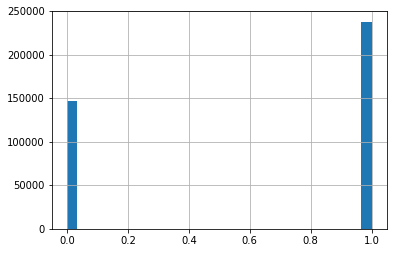

'0.0% de registros nulos'

'Variância: 0.15566044305294252'

qtd   pc
1  310614 0.81
0   74215 0.19

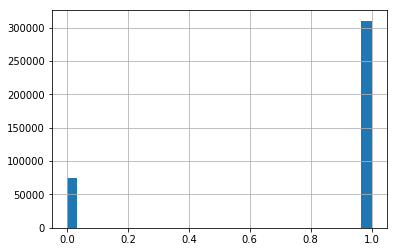

'0.0% de registros nulos'

'Variância: 0.15076497141508427'

qtd   pc
1  313642 0.82
0   71187 0.18

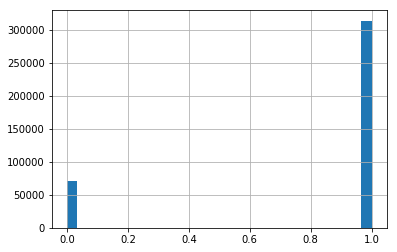

'0.0% de registros nulos'

'Variância: 0.002332491306236977'

count   384829.00
mean         0.09
std          0.05
min          0.01
25%          0.06
50%          0.08
75%          0.11
max          1.00
Name: NU_PROP_VIDA_ESCOLA, dtype: float64

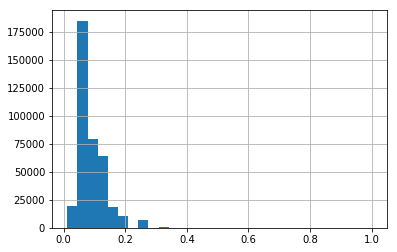

'0.0% de registros nulos'

'Variância: 0.002332491306236977'

count   384829.00
mean         0.09
std          0.05
min          0.01
25%          0.06
50%          0.08
75%          0.11
max          1.00
Name: NU_PROP_VIDA_REDE_PBC, dtype: float64

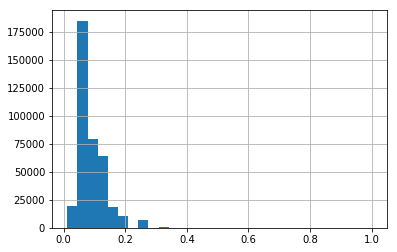

'0.0% de registros nulos'

'Variância: 0.23423374799330918'

qtd   pc
0  240736 0.63
1  144093 0.37

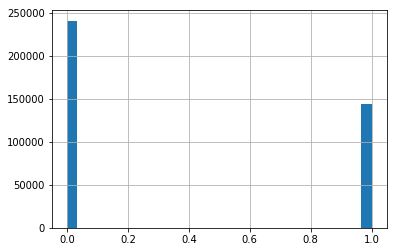

'0.0% de registros nulos'

'Variância: 0.15648232963117673'

qtd   pc
0  310098 0.81
1   74731 0.19

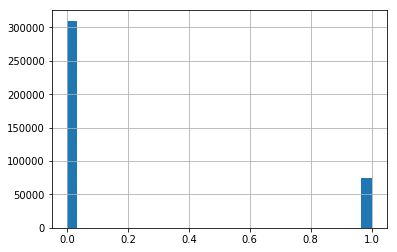

'0.0% de registros nulos'

'Variância: 0.23941082383397025'

qtd   pc
0  232016 0.60
1  152813 0.40

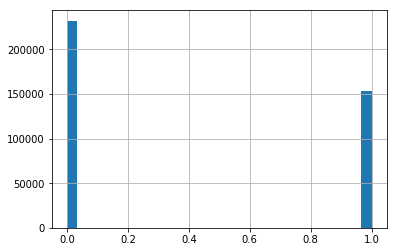

In [157]:
explora_df(f)

In [ ]:
alunos.to_csv(f'{PATH_DF_CSV}alunos_todas_ft.csv')


In [ ]:
vs = []
for i in range(2,9):
    km = kmeans_professores(f,i)
    p = pd.Series(km.labels_).value_counts()
    v = np.min(p)/np.max(p)    
    vs.append(v)
    display(f'{i} - {v}')
    display(p)

display(f'O conjunto com a menor diferenca entre o maximo e o minimo foi {np.argmax(vs) + 2} com {max(vs)}.')

In [160]:
fkma = f.copy()


Base de TREINO
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     14878
          1       1.00      1.00      1.00     40588
          2       1.00      1.00      1.00     27642
          3       1.00      1.00      1.00     34911
          4       1.00      1.00      1.00     30752
          5       1.00      1.00      1.00     35876
          6       1.00      1.00      1.00     32023
          7       1.00      1.00      1.00     28416
          8       1.00      1.00      1.00     20720
          9       1.00      1.00      1.00     22815

avg / total       1.00      1.00      1.00    288621

Base de TESTE
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      4970
          1       1.00      1.00      1.00     13612
          2       1.00      1.00      1.00      9236
          3       1.00      1.00      1.00     11649
          4       1.00      1.00      1.00     10278
          5  

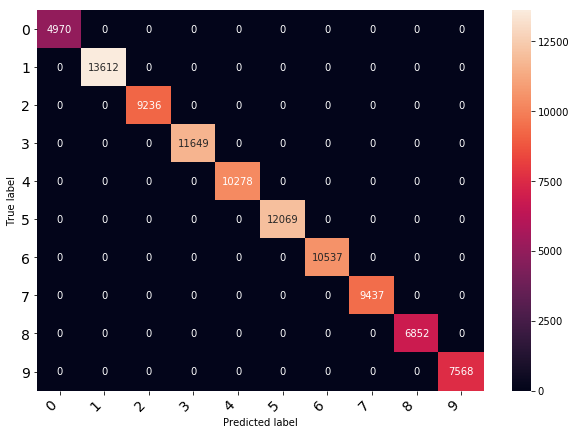

Nao foi possivel mostrar a ROC.
Feature ranking:
1. feature TP_SEXO (0.330810)
2. feature IN_IDD_CORRETA (0.264748)
3. feature TP_COR_RACA_1 (0.122308)
4. feature TP_COR_RACA_3 (0.104297)
5. feature TP_COR_RACA_0 (0.079541)
6. feature IN_RESIDE_DF (0.032207)
7. feature IN_NATURAL_DF (0.029315)
8. feature NU_IDADE_REFERENCIA (0.014549)
9. feature NU_PROP_VIDA_REDE_PBC (0.011965)
10. feature NU_PROP_VIDA_ESCOLA (0.010259)


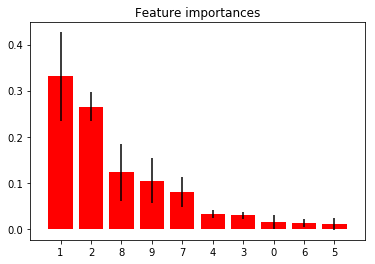

(['TP_SEXO',
  'IN_IDD_CORRETA',
  'TP_COR_RACA_1',
  'TP_COR_RACA_3',
  'TP_COR_RACA_0',
  'IN_RESIDE_DF',
  'IN_NATURAL_DF',
  'NU_IDADE_REFERENCIA',
  'NU_PROP_VIDA_REDE_PBC',
  'NU_PROP_VIDA_ESCOLA'],
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=0, verbose=0, warm_start=False))

In [162]:
km = kmeans_professores(fkma,10)
f['ROTULO_ALUNO'] = km.labels_
processa_tudo(f,tg='ROTULO_ALUNO')

count  mean  std  min   25%   50%   75%   max
ROTULO_ALUNO                                                 
0            19848.00 19.45 9.72 4.00 14.00 17.00 20.00 79.00
1            54200.00 10.97 3.65 0.00  8.00 11.00 14.00 18.00
2            36878.00 12.05 5.48 0.00  8.00 12.00 15.00 71.00
3            46560.00 17.94 9.07 1.00 14.00 16.00 19.00 83.00
4            41030.00 11.48 3.92 0.00  8.00 12.00 15.00 18.00
5            47945.00 10.58 3.62 0.00  8.00 11.00 13.00 18.00
6            42560.00 12.04 3.89 0.00  9.00 13.00 15.00 18.00
7            37853.00 12.18 6.18 0.00  8.00 12.00 15.00 82.00
8            27572.00 17.06 9.55 4.00 12.00 15.00 18.00 81.00
9            30383.00 15.91 7.57 2.00 12.00 15.00 17.00 81.00

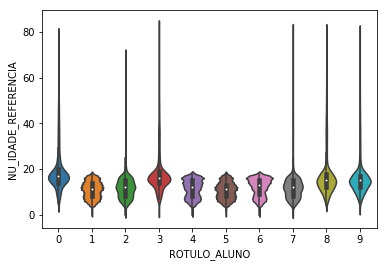

ROTULO_ALUNO
0   1.12
1   2.00
2   1.00
3   1.59
4   1.00
5   1.00
6   2.00
7   2.00
8   2.00
9   1.00
Name: TP_SEXO, dtype: float64

576876

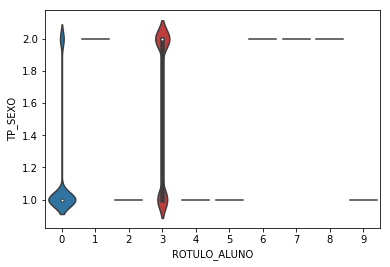

ROTULO_ALUNO
0   0.07
1   1.00
2   0.66
3   0.00
4   1.00
5   1.00
6   1.00
7   0.69
8   0.00
9   0.00
Name: IN_IDD_CORRETA, dtype: float64

237789

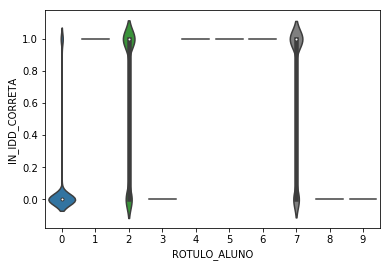

ROTULO_ALUNO
0   0.37
1   0.83
2   0.84
3   0.86
4   0.89
5   0.85
6   0.84
7   0.83
8   0.72
9   0.78
Name: IN_NATURAL_DF, dtype: float64

310614

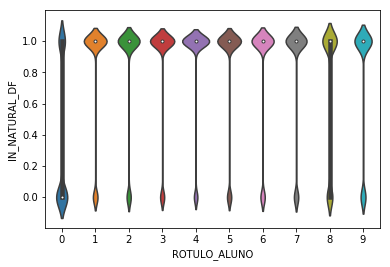

ROTULO_ALUNO
0   0.33
1   0.86
2   0.85
3   0.88
4   0.81
5   0.86
6   0.77
7   0.85
8   0.83
9   0.84
Name: IN_RESIDE_DF, dtype: float64

313642

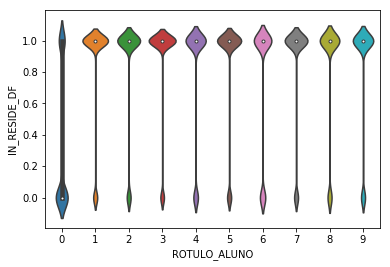

count  mean  std  min  25%  50%  75%  max
ROTULO_ALUNO                                             
0            19848.00  0.06 0.03 0.01 0.05 0.06 0.07 0.25
1            54200.00  0.11 0.05 0.06 0.07 0.09 0.12 1.00
2            36878.00  0.10 0.05 0.01 0.07 0.08 0.12 1.00
3            46560.00  0.07 0.03 0.01 0.05 0.06 0.07 1.00
4            41030.00  0.10 0.05 0.06 0.07 0.08 0.12 1.00
5            47945.00  0.11 0.06 0.06 0.08 0.09 0.12 1.00
6            42560.00  0.10 0.05 0.06 0.07 0.08 0.11 1.00
7            37853.00  0.10 0.05 0.01 0.07 0.08 0.12 1.00
8            27572.00  0.07 0.03 0.01 0.06 0.07 0.08 0.25
9            30383.00  0.07 0.03 0.01 0.06 0.07 0.08 0.50

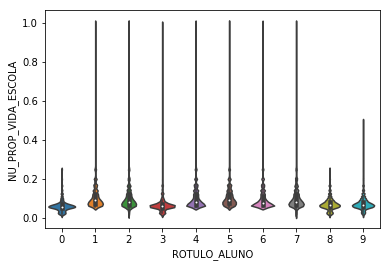

count  mean  std  min  25%  50%  75%  max
ROTULO_ALUNO                                             
0            19848.00  0.06 0.03 0.01 0.05 0.06 0.07 0.25
1            54200.00  0.11 0.05 0.06 0.07 0.09 0.12 1.00
2            36878.00  0.10 0.05 0.01 0.07 0.08 0.12 1.00
3            46560.00  0.07 0.03 0.01 0.05 0.06 0.07 1.00
4            41030.00  0.10 0.05 0.06 0.07 0.08 0.12 1.00
5            47945.00  0.11 0.06 0.06 0.08 0.09 0.12 1.00
6            42560.00  0.10 0.05 0.06 0.07 0.08 0.11 1.00
7            37853.00  0.10 0.05 0.01 0.07 0.08 0.12 1.00
8            27572.00  0.07 0.03 0.01 0.06 0.07 0.08 0.25
9            30383.00  0.07 0.03 0.01 0.06 0.07 0.08 0.50

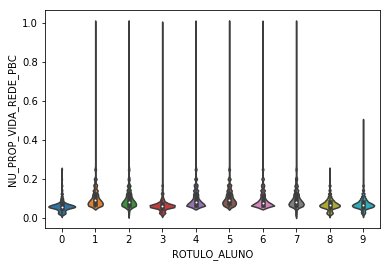

ROTULO_ALUNO
0   0.93
1   0.00
2   0.00
3   1.00
4   0.91
5   0.00
6   0.99
7   0.00
8   0.00
9   0.00
Name: TP_COR_RACA_0, dtype: float64

144093

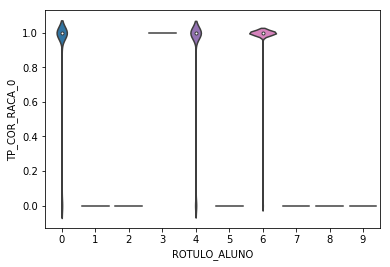

ROTULO_ALUNO
0    0
1    0
2    1
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: TP_COR_RACA_1, dtype: int8

74731

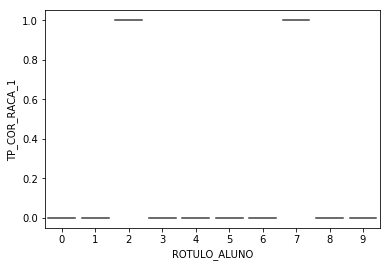

ROTULO_ALUNO
0   0.00
1   0.94
2   0.00
3   0.00
4   0.00
5   1.00
6   0.00
7   0.00
8   0.92
9   0.94
Name: TP_COR_RACA_3, dtype: float64

152813

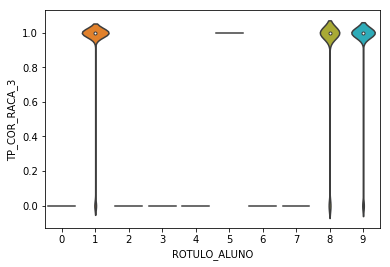

In [165]:
import seaborn as sns
for c in f.columns[:-1]:
    display(HTML(f'<h2>{c}</h2>'))
    if f[c].dtype == bool:
        f[c] = f[c].astype(np.int8)
    sns.violinplot(y=c,x='ROTULO_ALUNO',data=f)
    if c.startswith('NU'):
        display(f.groupby('ROTULO_ALUNO')[c].describe())
    else:
        display(f.groupby('ROTULO_ALUNO')[c].mean())
        display(f[c].sum())
        
    plt.show()

In [ ]:
f.to_csv('f{PATH_DF_CSV}alunos_features.csv')

In [ ]:
t15 = monta_df_docente(f'{ARQ_PATH}2015/TURMAS.CSV')['ID_TURMA'].values
e15 = escolas_df[2017].CO_ENTIDADE.values
t15

In [292]:
#condicoes:
# - Professor tem que estar no censo de 2017
# - Escola tem que estar no censo de 2017
# - turma tem que estar no censo de 2017

In [296]:
t17 = dfs[2017].ID_TURMA.unique()


In [305]:
pt15 = dfs[2015].loc[dfs[2015].CO_PESSOA_FISICA.isin(prof.index) &
                    dfs[2015].ID_TURMA.isin(t17) &
                     dfs[2015].CO_ENTIDADE.isin(escolas_df[2017].CO_ENTIDADE) &
                    dfs[2015].CO_PESSOA_FISICA.isin(dfs[2017].CO_PESSOA_FISICA.unique())
                    ][['CO_PESSOA_FISICA','ID_TURMA']].drop_duplicates()
display(pt15.shape)
pt15.head()

(7129, 2)

CO_PESSOA_FISICA  ID_TURMA
31       120240785168    217440
54       115043262612   5725660
132      115075878139   2085697
180      115043262612   5719360
240      117818613586    147317

In [310]:
pt17 = dfs[2017].loc[dfs[2017].CO_PESSOA_FISICA.isin(pt15.CO_PESSOA_FISICA.unique())
                    ][['CO_PESSOA_FISICA','ID_TURMA']].drop_duplicates()
display(pt17.shape)
display(pt17.head())


In [312]:
a = pt15.merge(pt17,indicator=True,on=['CO_PESSOA_FISICA','ID_TURMA'],how='left')
a._merge.value_counts()

In [315]:
dados_target = a.copy()
dados_target['target'] = (dados_target._merge == 'left_only').astype(np.int8)
dados_target.drop('_merge',axis=1).to_csv(f'{PATH_DF_CSV}target.csv',index=False)


In [316]:
dados_target = ajusta_colunas_int_df_inep(pd.read_csv(f'{PATH_DF_CSV}target.csv'))

### <center> Temos target </center>
<img src='https://media.giphy.com/media/3o6MbkNYWUzAuKmDa8/giphy.gif'>

# TURMAS

<table columns=2 style='width:100%'><tr><td>
<img src='img/LisaSchool.png'/></td><td> <h2>Professores/Escolas.</h2><br/>
    Professores selecionados no item 'Professores' que estavam em escolas em funcionamento em 2015 e 2017.</td></tr></table>

In [21]:
#seleciona os PROFESSORES | ESCOLA | TURMA de cada um dos anos
#seleciona professores de escolas em funcionamento em 2017.
df15_pbc = dfs[2015].loc[(dfs[2015].CO_PESSOA_FISICA.isin(prof_pbc_df15.index)) & dfs[2015].CO_ENTIDADE.isin(escolas_df[2017].CO_ENTIDADE.values)]    
df17_pbc = dfs[2017].loc[dfs[2017].CO_PESSOA_FISICA.isin(prof_pbc_df15.index)]

In [22]:
#monta o DataFrame com PROFESSOR|ESCOLA para montar a target
a15 = df15_pbc[['CO_PESSOA_FISICA','CO_ENTIDADE']].drop_duplicates()
a17 = df17_pbc[['CO_PESSOA_FISICA','CO_ENTIDADE']].drop_duplicates()
display(a15.shape)
display(a17.shape)

dados_target = a15.merge(a17,on=['CO_PESSOA_FISICA','CO_ENTIDADE'], how='left',indicator=True)

(10639, 2)

(10647, 2)

In [23]:
display(dados_target.drop_duplicates().shape)
dados_target.drop_duplicates().head()

(10639, 3)

CO_PESSOA_FISICA  CO_ENTIDADE _merge
0      115161698917     53001206   both
1      115161698917     53011988   both
2      115111512003     53068181   both
3      115075856674     53013980   both
4      115075569420     53001893   both

In [24]:
display(dados_target._merge.value_counts())
dados_target['target'] = (dados_target._merge == 'left_only').astype(np.int8)

both          8167
left_only     2472
right_only       0
Name: _merge, dtype: int64

In [25]:
dados_target.drop('_merge',axis=1).to_csv(f'{PATH_DF_CSV}target.csv',index=False)

In [69]:
dados_target = ajusta_colunas_int_df_inep(pd.read_csv(f'{PATH_DF_CSV}target.csv'))

### Interação entre professores | escolas
<br/>
<br/>
01. Verificação nos arquivos anteriores
<br/>
<br/>
    - Tempo na escola
<br/>
    - Quantidade de turmas em 2014
<br/>
    - Quantidade de turmas em 2013
<br/>
    - Quantidade de turmas em 2011
<br/>
    - Quantidade de turmas em 2009
<br/>
    - Quantidade de turmas em 2007
<br/>
<br/>
02. Quantidade de turmas em 2015
<br/>
<br/>
03. TP_ETAPA_ENSINO
<br/>
<br/>
    - Qtd turmas infantil (1,2,3)
<br/>
    - Qtd turmas até 3ª serie (4,5,6,14,15,16,56)
<br/>
    - Qtd turmas até 6ª serie (7,8,9,17,18,19)
<br/>
    - Qtd turmas até 9ª serie (10,11,12,20,21,41)
<br/>
    - Qtd turmas Ensino Medio (25,26,27,28,29)
<br/>
    - Qtd turmas Tecnico (30 ao 40, 64,67,68,74)
<br/>
    - Qtd turmas Multi Etapa, Correcao (12,13,23,24,29)
<br/>
    - Qtd turmas EJA (65,69,70,71,72,73)
<br/>
<br/>
<b>INTERACAO PROFESSOR TURMA</b>
<br/>
<br/>
04. IN_DISC: separar materias para ver se a formacao coincide com a disciplinas ministrada.
<br/>
<br/>
05. TP_RACA: proporcao de alunos mesma RACA/COR prof.



target  NU_QTD_TURMAS_2007  \
CO_PESSOA_FISICA CO_ENTIDADE                               
115161698917     53001206          0                0.00   
                 53011988          0                0.00   
115111512003     53068181          0                0.00   
115075856674     53013980          0                0.00   
115075569420     53001893          0                3.00   

                              NU_QTD_TURMAS_REG_2007  NU_QTD_TURMAS_EJA_2007  \
CO_PESSOA_FISICA CO_ENTIDADE                                                   
115161698917     53001206                       0.00                    0.00   
                 53011988                       0.00                    0.00   
115111512003     53068181                       0.00                    0.00   
115075856674     53013980                       0.00                    0.00   
115075569420     53001893                       3.00                    0.00   

                              NU_QTD_TURMAS_INFANT_2007  \
CO_PESSOA_FISICA CO_ENTIDADE                              
115161698917     53001206                          0.00   
                 53011988                          0.00   
115111512003     53068181                          0.00   
115075856674     53013980                          0.00   
115075569420     53001893                          0.00   

                              NU_QTD_TURMAS_MEDIO_2007  NU_QTD_TURMAS_2009  \
CO_PESSOA_FISICA CO_ENTIDADE                                                 
115161698917     53001206                         0.00                0.00   
                 53011988                         0.00                4.00   
115111512003     53068181                         0.00                0.00   
115075856674     53013980                         0.00                0.00   
115075569420     53001893                         0.00                4.00   

                              NU_QTD_TURMAS_REG_2009  NU_QTD_TURMAS_EJA_2009  \
CO_PESSOA_FISICA CO_ENTIDADE                                                   
115161698917     53001206                       0.00                    0.00   
                 53011988                       0.00                    4.00   
115111512003     53068181                       0.00                    0.00   
115075856674     53013980                       0.00                    0.00   
115075569420     53001893                       4.00                    0.00   

                              NU_QTD_TURMAS_INFANT_2009  \
CO_PESSOA_FISICA CO_ENTIDADE                              
115161698917     53001206                          0.00   
                 53011988                          0.00   
115111512003     53068181                          0.00   
115075856674     53013980                          0.00   
115075569420     53001893                          0.00   

                                        ...             NU_QTD_TURMAS_2014  \
CO_PESSOA_FISICA CO_ENTIDADE            ...                                  
115161698917     53001206               ...                           0.00   
                 53011988               ...                           9.00   
115111512003     53068181               ...                           6.00   
115075856674     53013980               ...                           1.00   
115075569420     53001893               ...                           8.00   

                              NU_QTD_TURMAS_REG_2014  NU_QTD_TURMAS_EJA_2014  \
CO_PESSOA_FISICA CO_ENTIDADE                                                   
115161698917     53001206                       0.00                    0.00   
                 53011988                       0.00                    9.00   
115111512003     53068181                       6.00                    0.00   
115075856674     53013980                       1.00                    0.00   
115075569420     53001893                       8.00                    0.00   

    

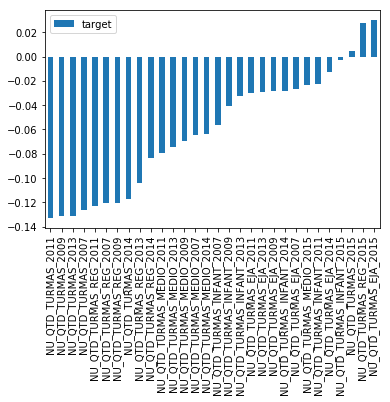

'0.0% de registros nulos'

'Variância: 0.1783816706901631'

'Correlacao:'

target  target
target    1.00    1.00
target    1.00    1.00

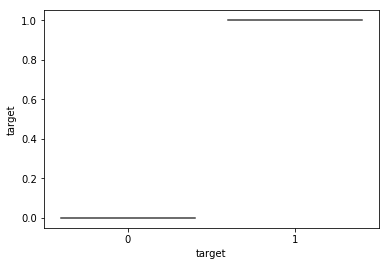

qtd   pc
0  8167 0.77
1  2472 0.23

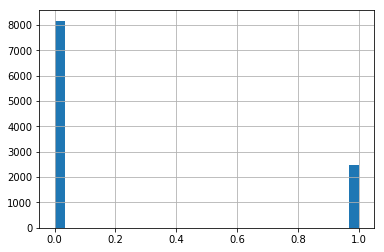

'0.0% de registros nulos'

'Variância: 9.559134052596377'

'Correlacao:'

NU_QTD_TURMAS_2007  target
NU_QTD_TURMAS_2007                1.00   -0.13
target                           -0.13    1.00

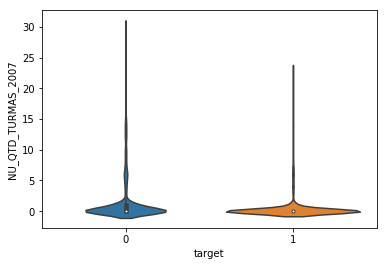

count   10639.00
mean        1.19
std         3.09
min         0.00
25%         0.00
50%         0.00
75%         1.00
max        30.00
Name: NU_QTD_TURMAS_2007, dtype: float64

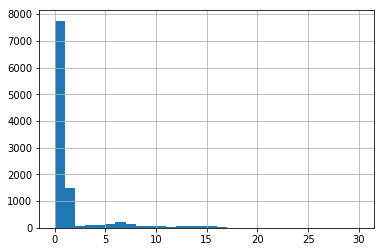

'0.0% de registros nulos'

'Variância: 8.790605695565306'

'Correlacao:'

NU_QTD_TURMAS_REG_2007  target
NU_QTD_TURMAS_REG_2007                    1.00   -0.12
target                                   -0.12    1.00

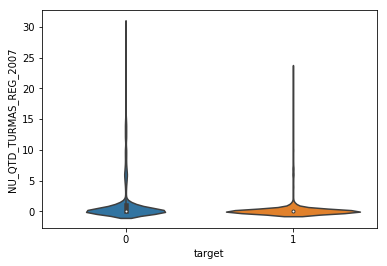

count   10639.00
mean        1.05
std         2.96
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        30.00
Name: NU_QTD_TURMAS_REG_2007, dtype: float64

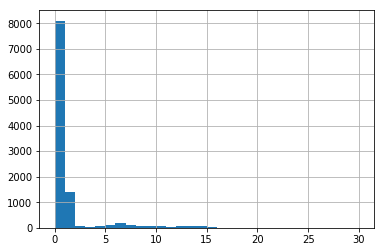

'0.0% de registros nulos'

'Variância: 0.8579598581991098'

'Correlacao:'

NU_QTD_TURMAS_EJA_2007  target
NU_QTD_TURMAS_EJA_2007                    1.00   -0.03
target                                   -0.03    1.00

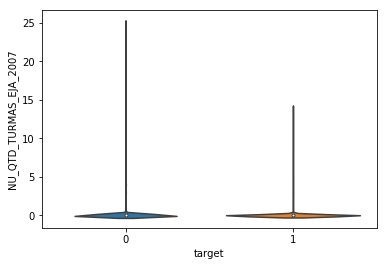

count   10639.00
mean        0.12
std         0.93
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        25.00
Name: NU_QTD_TURMAS_EJA_2007, dtype: float64

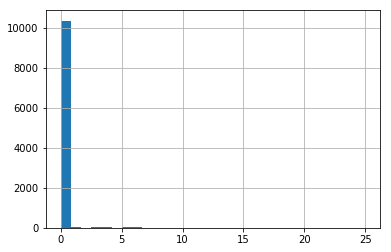

'0.0% de registros nulos'

'Variância: 0.07991466020660659'

'Correlacao:'

NU_QTD_TURMAS_INFANT_2007  target
NU_QTD_TURMAS_INFANT_2007                       1.00   -0.06
target                                         -0.06    1.00

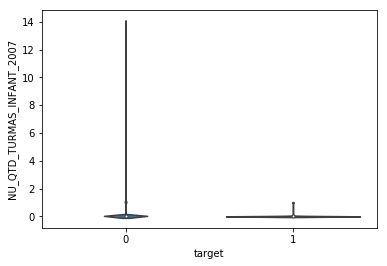

qtd   pc
0.00   10255 0.96
1.00     372 0.03
2.00       5 0.00
7.00       3 0.00
9.00       1 0.00
14.00      1 0.00
4.00       1 0.00
6.00       1 0.00

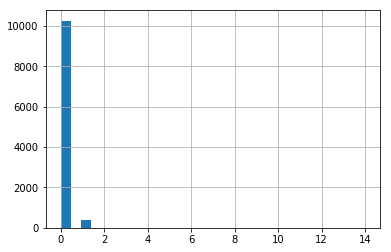

'0.0% de registros nulos'

'Variância: 4.8297170284856765'

'Correlacao:'

NU_QTD_TURMAS_MEDIO_2007  target
NU_QTD_TURMAS_MEDIO_2007                      1.00   -0.07
target                                       -0.07    1.00

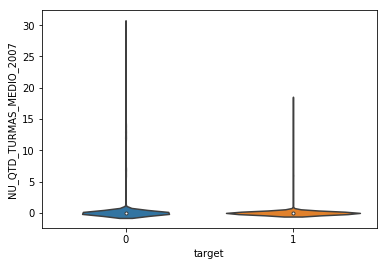

count   10639.00
mean        0.44
std         2.20
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        30.00
Name: NU_QTD_TURMAS_MEDIO_2007, dtype: float64

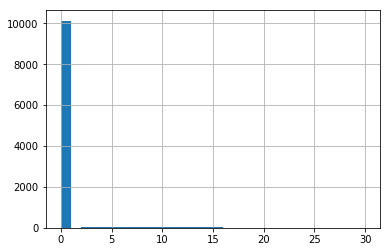

'0.0% de registros nulos'

'Variância: 13.67711798515203'

'Correlacao:'

NU_QTD_TURMAS_2009  target
NU_QTD_TURMAS_2009                1.00   -0.13
target                           -0.13    1.00

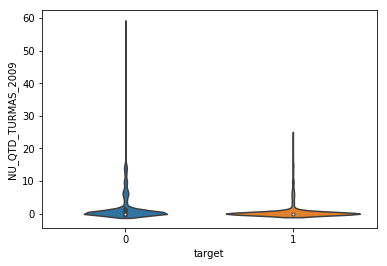

count   10639.00
mean        1.68
std         3.70
min         0.00
25%         0.00
50%         0.00
75%         1.00
max        58.00
Name: NU_QTD_TURMAS_2009, dtype: float64

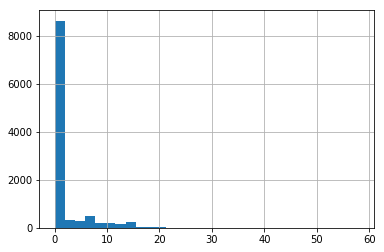

'0.0% de registros nulos'

'Variância: 11.313076777802744'

'Correlacao:'

NU_QTD_TURMAS_REG_2009  target
NU_QTD_TURMAS_REG_2009                    1.00   -0.12
target                                   -0.12    1.00

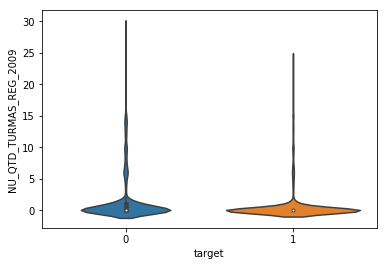

count   10639.00
mean        1.34
std         3.36
min         0.00
25%         0.00
50%         0.00
75%         1.00
max        29.00
Name: NU_QTD_TURMAS_REG_2009, dtype: float64

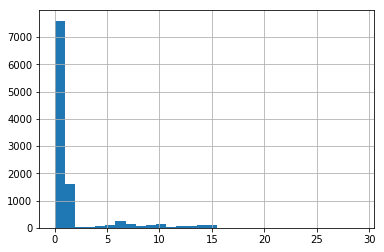

'0.0% de registros nulos'

'Variância: 2.081304686908634'

'Correlacao:'

NU_QTD_TURMAS_EJA_2009  target
NU_QTD_TURMAS_EJA_2009                    1.00   -0.03
target                                   -0.03    1.00

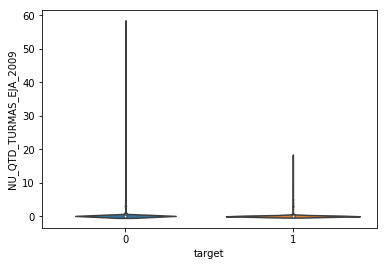

count   10639.00
mean        0.22
std         1.44
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        58.00
Name: NU_QTD_TURMAS_EJA_2009, dtype: float64

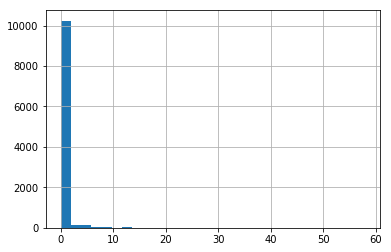

'0.0% de registros nulos'

'Variância: 0.04891194007665754'

'Correlacao:'

NU_QTD_TURMAS_INFANT_2009  target
NU_QTD_TURMAS_INFANT_2009                       1.00   -0.04
target                                         -0.04    1.00

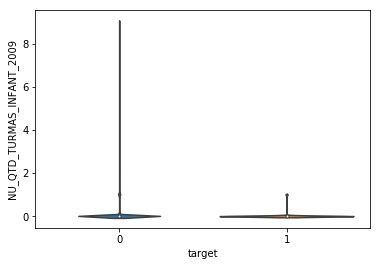

qtd   pc
0.00  10334 0.97
1.00    295 0.03
2.00      5 0.00
5.00      2 0.00
9.00      1 0.00
7.00      1 0.00
6.00      1 0.00

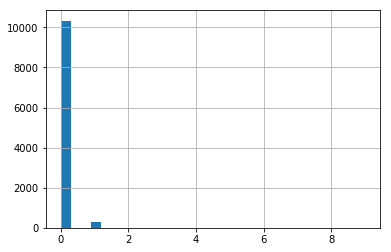

'0.0% de registros nulos'

'Variância: 7.093519144525871'

'Correlacao:'

NU_QTD_TURMAS_MEDIO_2009  target
NU_QTD_TURMAS_MEDIO_2009                      1.00   -0.07
target                                       -0.07    1.00

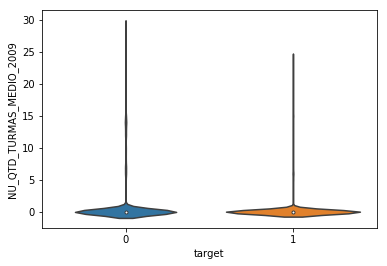

count   10639.00
mean        0.62
std         2.66
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        29.00
Name: NU_QTD_TURMAS_MEDIO_2009, dtype: float64

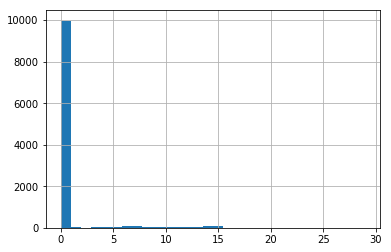

'0.0% de registros nulos'

'Variância: 15.582181370353535'

'Correlacao:'

NU_QTD_TURMAS_2011  target
NU_QTD_TURMAS_2011                1.00   -0.13
target                           -0.13    1.00

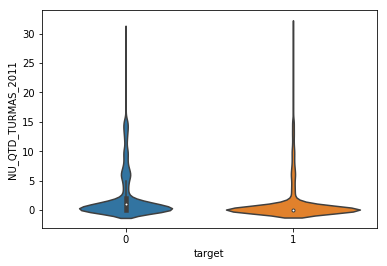

count   10639.00
mean        2.13
std         3.95
min         0.00
25%         0.00
50%         0.00
75%         1.00
max        31.00
Name: NU_QTD_TURMAS_2011, dtype: float64

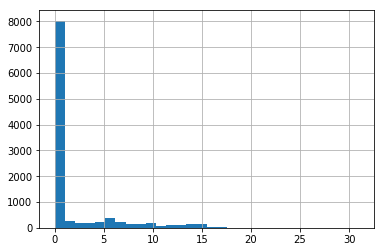

'0.0% de registros nulos'

'Variância: 14.109478686796745'

'Correlacao:'

NU_QTD_TURMAS_REG_2011  target
NU_QTD_TURMAS_REG_2011                    1.00   -0.12
target                                   -0.12    1.00

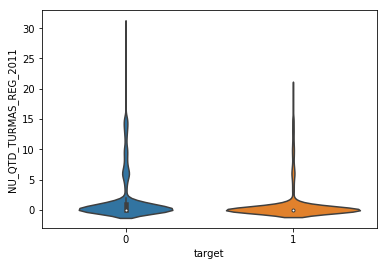

count   10639.00
mean        1.76
std         3.76
min         0.00
25%         0.00
50%         0.00
75%         1.00
max        30.00
Name: NU_QTD_TURMAS_REG_2011, dtype: float64

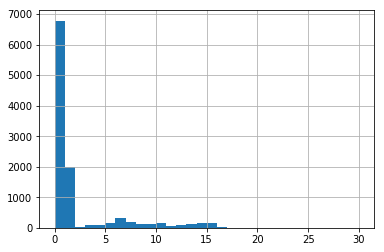

'0.0% de registros nulos'

'Variância: 1.7757149682570403'

'Correlacao:'

NU_QTD_TURMAS_EJA_2011  target
NU_QTD_TURMAS_EJA_2011                    1.00   -0.03
target                                   -0.03    1.00

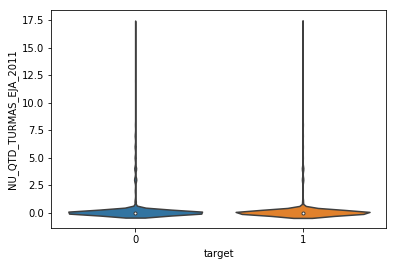

count   10639.00
mean        0.28
std         1.33
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        17.00
Name: NU_QTD_TURMAS_EJA_2011, dtype: float64

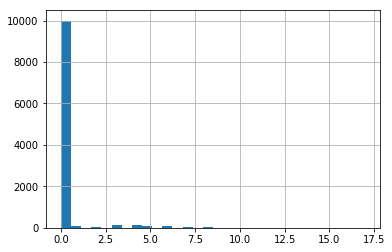

'0.0% de registros nulos'

'Variância: 0.17557648865788464'

'Correlacao:'

NU_QTD_TURMAS_INFANT_2011  target
NU_QTD_TURMAS_INFANT_2011                       1.00   -0.02
target                                         -0.02    1.00

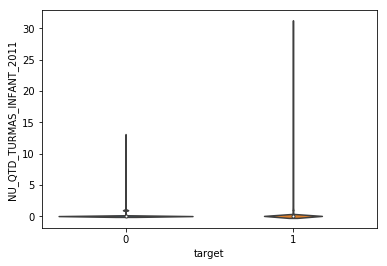

count   10639.00
mean        0.05
std         0.42
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        31.00
Name: NU_QTD_TURMAS_INFANT_2011, dtype: float64

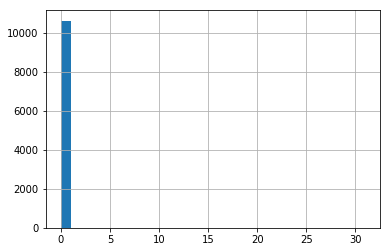

'0.0% de registros nulos'

'Variância: 9.441760399371322'

'Correlacao:'

NU_QTD_TURMAS_MEDIO_2011  target
NU_QTD_TURMAS_MEDIO_2011                      1.00   -0.08
target                                       -0.08    1.00

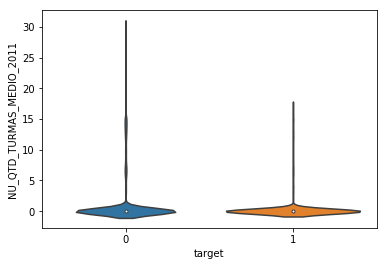

count   10639.00
mean        0.84
std         3.07
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        30.00
Name: NU_QTD_TURMAS_MEDIO_2011, dtype: float64

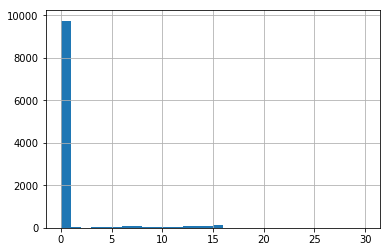

'0.0% de registros nulos'

'Variância: 16.169810811287647'

'Correlacao:'

NU_QTD_TURMAS_2013  target
NU_QTD_TURMAS_2013                1.00   -0.13
target                           -0.13    1.00

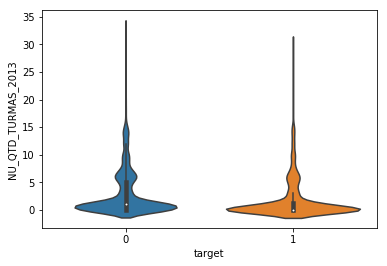

count   10639.00
mean        2.78
std         4.02
min         0.00
25%         0.00
50%         1.00
75%         5.00
max        33.00
Name: NU_QTD_TURMAS_2013, dtype: float64

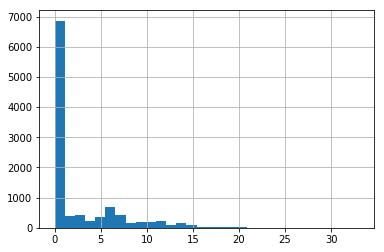

'0.0% de registros nulos'

'Variância: 14.32629394194581'

'Correlacao:'

NU_QTD_TURMAS_REG_2013  target
NU_QTD_TURMAS_REG_2013                    1.00   -0.10
target                                   -0.10    1.00

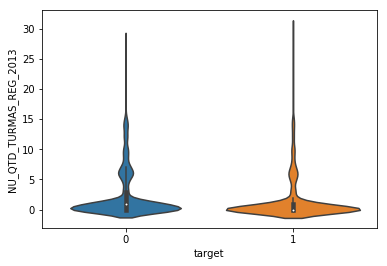

count   10639.00
mean        2.16
std         3.79
min         0.00
25%         0.00
50%         0.00
75%         1.00
max        30.00
Name: NU_QTD_TURMAS_REG_2013, dtype: float64

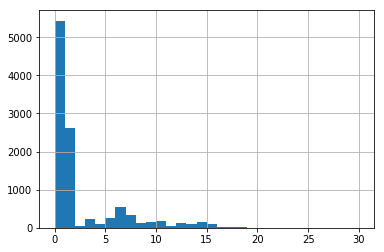

'0.0% de registros nulos'

'Variância: 2.04002744993515'

'Correlacao:'

NU_QTD_TURMAS_EJA_2013  target
NU_QTD_TURMAS_EJA_2013                    1.00   -0.03
target                                   -0.03    1.00

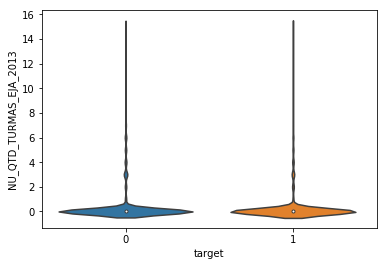

count   10639.00
mean        0.36
std         1.43
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        15.00
Name: NU_QTD_TURMAS_EJA_2013, dtype: float64

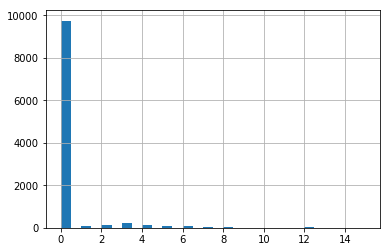

'0.0% de registros nulos'

'Variância: 0.09823237058341651'

'Correlacao:'

NU_QTD_TURMAS_INFANT_2013  target
NU_QTD_TURMAS_INFANT_2013                       1.00   -0.03
target                                         -0.03    1.00

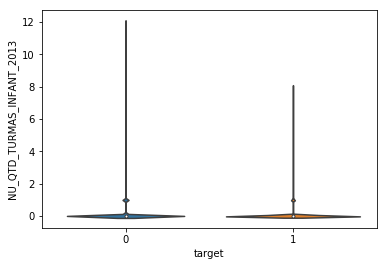

qtd   pc
0.00   10170 0.96
1.00     457 0.04
5.00       4 0.00
8.00       2 0.00
9.00       1 0.00
7.00       1 0.00
10.00      1 0.00
2.00       1 0.00
12.00      1 0.00
3.00       1 0.00

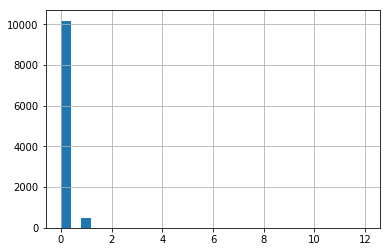

'0.0% de registros nulos'

'Variância: 8.340774447033187'

'Correlacao:'

NU_QTD_TURMAS_MEDIO_2013  target
NU_QTD_TURMAS_MEDIO_2013                      1.00   -0.07
target                                       -0.07    1.00

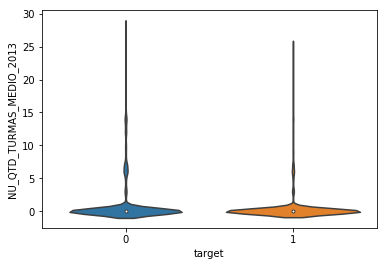

count   10639.00
mean        0.88
std         2.89
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        28.00
Name: NU_QTD_TURMAS_MEDIO_2013, dtype: float64

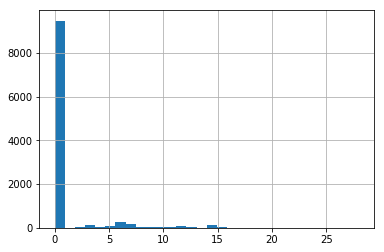

'0.0% de registros nulos'

'Variância: 19.765675815837007'

'Correlacao:'

NU_QTD_TURMAS_2014  target
NU_QTD_TURMAS_2014                1.00   -0.12
target                           -0.12    1.00

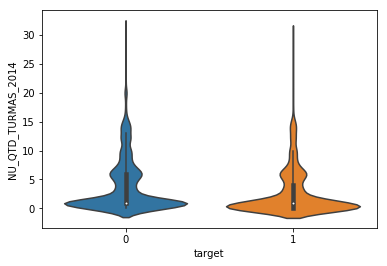

count   10639.00
mean        3.63
std         4.45
min         0.00
25%         1.00
50%         1.00
75%         6.00
max        31.00
Name: NU_QTD_TURMAS_2014, dtype: float64

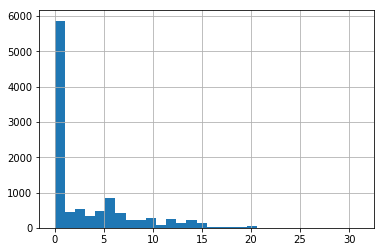

'0.0% de registros nulos'

'Variância: 17.940510497467873'

'Correlacao:'

NU_QTD_TURMAS_REG_2014  target
NU_QTD_TURMAS_REG_2014                    1.00   -0.08
target                                   -0.08    1.00

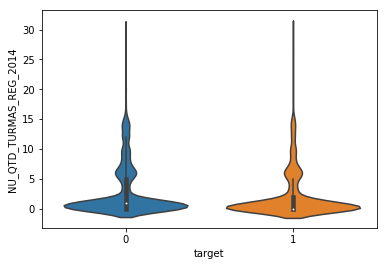

count   10639.00
mean        2.78
std         4.24
min         0.00
25%         0.00
50%         1.00
75%         5.00
max        30.00
Name: NU_QTD_TURMAS_REG_2014, dtype: float64

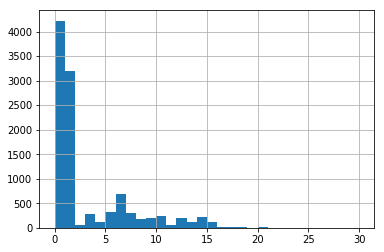

'0.0% de registros nulos'

'Variância: 2.484817934335121'

'Correlacao:'

NU_QTD_TURMAS_EJA_2014  target
NU_QTD_TURMAS_EJA_2014                    1.00   -0.01
target                                   -0.01    1.00

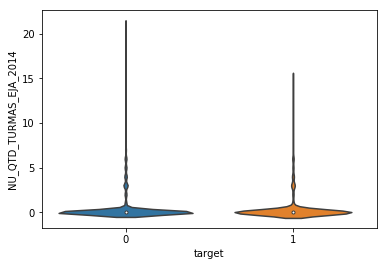

count   10639.00
mean        0.44
std         1.58
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        21.00
Name: NU_QTD_TURMAS_EJA_2014, dtype: float64

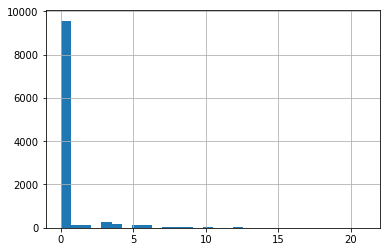

'0.0% de registros nulos'

'Variância: 0.14414267646863338'

'Correlacao:'

NU_QTD_TURMAS_INFANT_2014  target
NU_QTD_TURMAS_INFANT_2014                       1.00   -0.03
target                                         -0.03    1.00

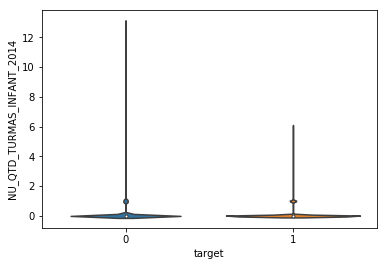

count   10639.00
mean        0.07
std         0.38
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        13.00
Name: NU_QTD_TURMAS_INFANT_2014, dtype: float64

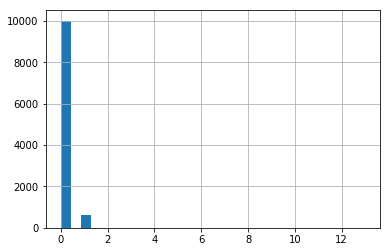

'0.0% de registros nulos'

'Variância: 11.991552504143772'

'Correlacao:'

NU_QTD_TURMAS_MEDIO_2014  target
NU_QTD_TURMAS_MEDIO_2014                      1.00   -0.06
target                                       -0.06    1.00

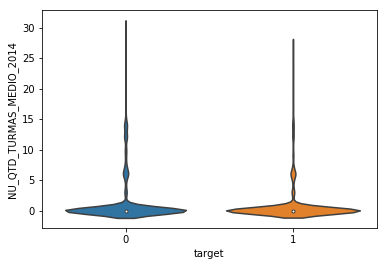

count   10639.00
mean        1.21
std         3.46
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        30.00
Name: NU_QTD_TURMAS_MEDIO_2014, dtype: float64

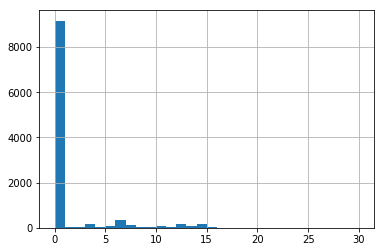

'0.0% de registros nulos'

'Variância: 19.056353248157492'

'Correlacao:'

NU_QTD_TURMAS_2015  target
NU_QTD_TURMAS_2015                1.00    0.00
target                            0.00    1.00

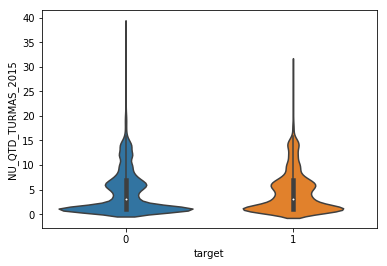

count   10639.00
mean        4.56
std         4.37
min         1.00
25%         1.00
50%         3.00
75%         7.00
max        38.00
Name: NU_QTD_TURMAS_2015, dtype: float64

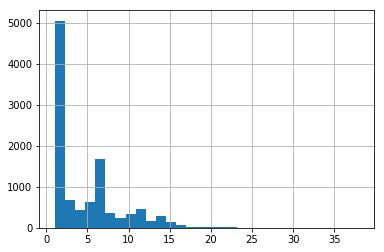

'0.0% de registros nulos'

'Variância: 19.109375'

'Correlacao:'

NU_QTD_TURMAS_REG_2015  target
NU_QTD_TURMAS_REG_2015                    1.00    0.03
target                                    0.03    1.00

/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:117: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:133: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:142: RuntimeWarning: invalid value encountered in add
  y += start
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


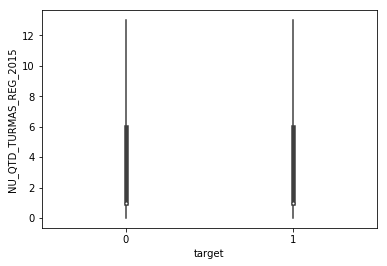

count   10639.00
mean        3.53
std         4.37
min         0.00
25%         1.00
50%         1.00
75%         6.00
max        38.00
Name: NU_QTD_TURMAS_REG_2015, dtype: float64

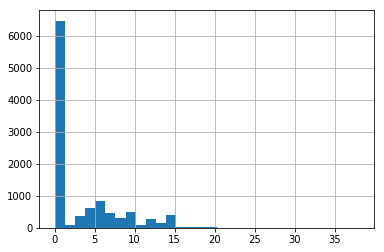

'0.0% de registros nulos'

'Variância: 2.87109375'

'Correlacao:'

NU_QTD_TURMAS_EJA_2015  target
NU_QTD_TURMAS_EJA_2015                    1.00    0.03
target                                    0.03    1.00

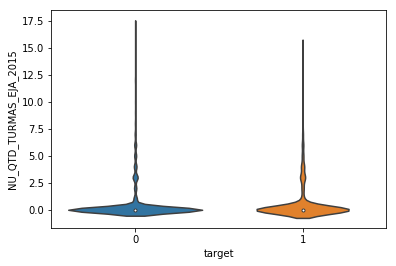

count   10639.00
mean        0.55
std         1.69
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        17.00
Name: NU_QTD_TURMAS_EJA_2015, dtype: float64

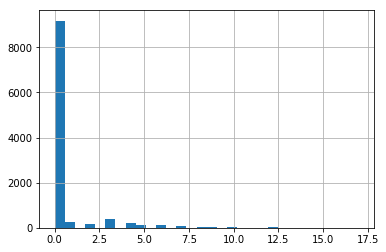

'0.0% de registros nulos'

'Variância: 0.14790986795431652'

'Correlacao:'

NU_QTD_TURMAS_INFANT_2015  target
NU_QTD_TURMAS_INFANT_2015                       1.00   -0.00
target                                         -0.00    1.00

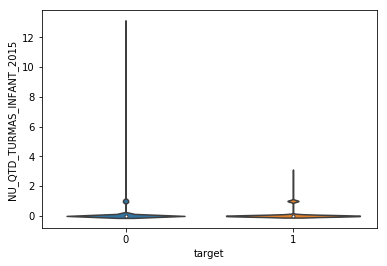

count   10639.00
mean        0.08
std         0.38
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        13.00
Name: NU_QTD_TURMAS_INFANT_2015, dtype: float64

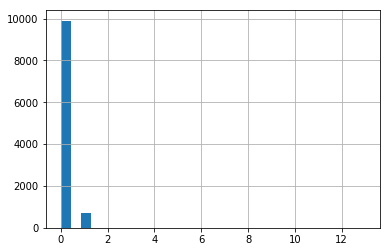

'0.0% de registros nulos'

'Variância: 14.051415967328591'

'Correlacao:'

NU_QTD_TURMAS_MEDIO_2015  target
NU_QTD_TURMAS_MEDIO_2015                      1.00   -0.02
target                                       -0.02    1.00

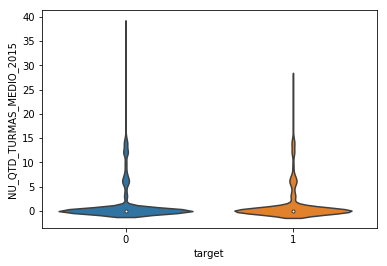

count   10639.00
mean        1.49
std         3.75
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        38.00
Name: NU_QTD_TURMAS_MEDIO_2015, dtype: float64

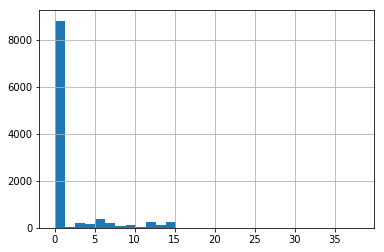

In [79]:
#quantidade de turmas ano a ano
relacoes = dados_target.copy()



for k,v in dfs.items():
    if k < 2017:
        #conta total de turmas diferentes
        agp = v.groupby(['FK_COD_DOCENTE','PK_COD_ENTIDADE'])[['PK_COD_TURMA']] \
        if k < 2015 else v.groupby(['CO_PESSOA_FISICA','CO_ENTIDADE'])[['ID_TURMA']]
        a = agp.nunique().reset_index()
        a.columns = ['CO_PESSOA_FISICA','CO_ENTIDADE',f'NU_QTD_TURMAS_{k}']
        relacoes = relacoes.merge(a, \
                       on=['CO_PESSOA_FISICA','CO_ENTIDADE'], \
                       how='left')
        #conta turmas por tipo
        relacoes = relacoes.merge(monta_por_tip_ensino(v,1,'REG',k), \
                       on=['CO_PESSOA_FISICA','CO_ENTIDADE'], \
                       how='left')
        relacoes = relacoes.merge(monta_por_tip_ensino(v,3,'EJA',k), \
                       on=['CO_PESSOA_FISICA','CO_ENTIDADE'], \
                       how='left')
        #turmas infantil e medio    
        relacoes = relacoes.merge(monta_por_tip_serie(v,'INFANT',k), \
                       on=['CO_PESSOA_FISICA','CO_ENTIDADE'], \
                       how='left')
        relacoes = relacoes.merge(monta_por_tip_serie(v,'MEDIO',k), \
                       on=['CO_PESSOA_FISICA','CO_ENTIDADE'], \
                       how='left')
        #relacoes.drop(['FK_COD_DOCENTE','PK_COD_ENTIDADE'],axis=1,inplace=True)

relacoes.fillna(0,inplace=True)
relacoes.set_index(['CO_PESSOA_FISICA','CO_ENTIDADE'],inplace=True)
display(relacoes.head())
display(relacoes.corr()[['target']].iloc[1:].sort_values('target').plot.bar());
plt.show();
explora_df(relacoes,var_cor=['target'])

In [28]:
display(t15.shape)
t15 = t15.loc[t15.CO_ENTIDADE.isin(dados_target.CO_ENTIDADE.values)]
display(t15.shape)

(2522857, 88)

(23709, 88)

In [30]:
display(dfs[2015].shape[0])
dfs[2015].loc[dfs[2015].ID_TURMA.isin(t15.ID_TURMA)].shape[0]

80796

80666

In [38]:
df15.ID_TURMA.head(50)

9      3356441
15     3354085
29     5499445
31     3144658
33     5495387
34      600714
43     2992340
44     2992340
48     3102672
62     5553703
76     3215411
77      273280
78      273282
81      273283
101    3175727
104    3757369
107    3456014
110    3455096
123    3354550
126    3353965
140    4049627
141    4048504
169     765922
173    1367311
195      43039
201    3218513
202     273284
205     273285
208    1976365
209    2570022
211    1976706
223     217440
233    3452366
235    3454329
236    3456036
241    3456471
255    3353374
268    4046842
271    4045694
275    4047653
299    2990076
318    3146488
336    1295134
342    1411764
347    1976068
348    1976342
351     812428
369    3456129
373    3410679
385    3352303
Name: ID_TURMA, dtype: int64

In [43]:
df15.loc[df15.ID_TURMA.isin(t15.ID_TURMA.values)].shape

(80666, 135)

In [29]:
display(df07.PK_COD_TURMA.nunique())
display(df09.PK_COD_TURMA.nunique())
display(df11.PK_COD_TURMA.nunique())
display(df13.PK_COD_TURMA.nunique())
display(df14.PK_COD_TURMA.nunique())
display(df15.ID_TURMA.nunique())
display(df17.ID_TURMA.nunique())


18317

20765

16078

18643

19369

20769

20034

<table columns=2 style='width:100%'><tr><td>
<img src='img/cp_icon.png'/></td><td> <h2>Check-point, recarregando os DataFrames para analisar a situacao do DF e montar a target.</h2></td></tr></table>

In [ ]:
prof_df = pd.read_csv(f'{PATH_DF_CSV}prof_df.csv',low_memory=False)
pss_ano= pd.read_csv(f'{PATH_DF_CSV}pessoas_prof_df.csv',low_memory=False)

In [ ]:
display(pss_ano.reset_index().ANO.value_counts())
pss_ano.shape

In [ ]:
pss_ano.reset_index(inplace=True)
pss_ano = ajusta_colunas_int_df_inep(pss_ano,vai_printar_cols=False)

#### Curiosidade para ver o comportamento das variaveis

In [ ]:
for c in pss_ano.columns[2:]:
    if not c.startswith('CO'):
        for a in anos_pesquisa:
            display(a + ' - ' + c)
            if c.startswith('NU'):
                display(pss_ano.loc[pss_ano.ANO == int(a)][c].describe())
                pss_ano.loc[pss_ano.ANO == int(a)][c].hist()
            else:
                display(pss_ano.loc[pss_ano.ANO == int(a)][c].value_counts())
                pss_ano.loc[pss_ano.ANO == int(a)][c].value_counts().plot.bar()
            plt.show()
            #sns.barplot()
    


### Taxa de rotatividade de professores entre 2 anos .  




In [ ]:
def monta_saidas(pt, ano,turmas=[]):
    pe_ano = pt.loc[(pt.TP_DEPENDENCIA < 4) & (pt.ANO == int(ano)) & ((len(turmas)==0) | (pt.CO_ENTIDADE.isin(turmas)))][['CO_PESSOA_FISICA','CO_ENTIDADE']].drop_duplicates()
    pe_fut = pt.loc[(pt.TP_DEPENDENCIA < 4) & ((len(turmas)==0) | (pt.CO_ENTIDADE.isin(turmas))) & (pt.ANO == int(anos_pesquisa[anos_pesquisa.index(str(ano))+1])) & pt.CO_PESSOA_FISICA.isin(pe_ano.CO_PESSOA_FISICA.unique())][['CO_PESSOA_FISICA','CO_ENTIDADE']].drop_duplicates()
    pe_ano = pe_ano.loc[pe_ano.CO_PESSOA_FISICA.isin(pe_fut.CO_PESSOA_FISICA.unique())]
    to = pe_ano.merge(pe_fut,indicator=True,on=['CO_PESSOA_FISICA','CO_ENTIDADE'],how='outer')
    #vamos manter somente as escolas que estavam abertas nos 2 periodos
    to = to.loc[to._merge =='left_only']
    return to[['CO_PESSOA_FISICA','CO_ENTIDADE']],pe_ano,pe_fut


In [ ]:

for ano in anos_pesquisa[:-1]:
    t,a,f = monta_saidas(prof_df,ano)
    p = t.shape[0]/a.shape[0] * 100
    display(f'{ano}/{int(ano)+2} havia {a.shape[0]} professores/escola, houve {t.shape[0]} saidas ({p}%)');


### Como  o turnover total foi estável no período iremos modelar somente com o biênio 2015/2017

##### Importando dados de escolas e turmas de escolas publicas em funcionamento do DF

In [ ]:
def imp_esc_dist_atv_df(ano):
    d_esc = pd.read_csv(f'{ARQ_PATH}{ano}/ESCOLAS.CSV',sep='|',encoding='latin1',low_memory=False)
    d_esc.fillna(-1,inplace=True)
    d_esc = ajusta_colunas_int_df_inep(d_esc,vai_printar_cols=False)
    d_esc['ANO'] = ano
    return d_esc.loc[(d_esc.CO_UF == 53) & (d_esc.TP_SITUACAO_FUNCIONAMENTO == 1) & (d_esc.TP_DEPENDENCIA == 2)]

escolas = imp_esc_dist_atv_df(2017).append(imp_esc_dist_atv_df(2015))

escolas.head()

In [ ]:
def imp_turma_esc_atv_df(ano,escolas):
    d_tur = pd.read_csv(f'{ARQ_PATH}{ano}/TURMAS.CSV',sep='|',encoding='latin1',low_memory=False)
    d_tur.fillna(-1,inplace=True)
    d_tur = ajusta_colunas_int_df_inep(d_tur,vai_printar_cols=False)
    d_tur['ANO'] = ano
    return d_tur.loc[(d_tur.CO_ENTIDADE.isin(escolas))]


In [ ]:
turmas = imp_turma_esc_atv_df(2015,escolas.loc[escolas.ANO == 2015].CO_ENTIDADE.unique())\
        .append(imp_turma_esc_atv_df(2017,escolas.loc[escolas.ANO == 2017].CO_ENTIDADE.unique()))

In [ ]:
display(turmas.dtypes)
turmas.head()

In [ ]:
escolas.to_csv(f'{PATH_DF_CSV}escolas_distritais_15_17_func_df.csv',index=False)
turmas.to_csv(f'{PATH_DF_CSV}turmas_df.csv',index=False)

In [ ]:
escolas = pd.read_csv(f'{PATH_DF_CSV}escolas_distritais_15_17_func_df.csv',low_memory=False)
turmas = pd.read_csv(f'{PATH_DF_CSV}turmas_df.csv',low_memory=False)

In [ ]:
#escolas distritais que estavam funcionamento em 2015 e 2017
e17 = escolas.loc[(escolas.ANO == 2017)]['CO_ENTIDADE'].unique()
co_e15_17 = escolas.loc[(escolas.ANO == 2015) & (escolas.CO_ENTIDADE.isin(e17))]['CO_ENTIDADE'].unique()
display(len(e17))
display(len(co_e15_17))

In [ ]:
#turnover 2015 em escolas em funcionamento
ano = 2015
t,a,f = monta_saidas(prof_df,ano,turmas=co_e15_17)
p = t.shape[0]/a.shape[0] * 100
display(f'{ano}/{int(ano)+2} havia {a.shape[0]} professores/escola, houve {t.shape[0]} saidas ({p}%)');


### <center>  Temos publico e temos a target! </center>

<img src='https://media.giphy.com/media/3o6MbkNYWUzAuKmDa8/giphy.gif'>




In [ ]:
a = a.merge(t,on=['CO_ENTIDADE','CO_PESSOA_FISICA'],indicator=True,how='left')
a['target'] = a._merge == 'both'
a.drop('_merge',axis=1,inplace=True)
a['ano'] = 2015
display(a.target.value_counts())


In [ ]:
a.to_csv(f'{PATH_DF_CSV}prof_escola_target.csv',index=False)

In [ ]:
#atalho para montagem do professores
def atalho_prof_df2015():
    a = ajusta_colunas_int_df_inep(carrega_arquivo_docentes(f'{ARQ_PATH}2015/DOCENTES_CO.CSV'))
    a['ANO'] = 2015
    b = ajusta_colunas_int_df_inep(carrega_arquivo_docentes(f'{ARQ_PATH}2017/DOCENTES_CO.CSV'))
    b['ANO'] = 2017
    c = a.append(b)
    c.to_csv(f'{PATH_DF_CSV}prof_df.csv',index=None)
    del a, b
    return c
#prof_df = atalho_prof_df2015()


### Apaga arquivos nao utilizados

In [ ]:
import os
for path, subdirs, files in os.walk(ARQ_PATH):
    for name in files:
        if '_' in name and not name.endswith('_CO.CSV') and name.endswith('CSV'):
            f = os.path.join(path, name)
            !rm -rf {f}    

<table columns=2 style='width:100%'><tr><td><img src='img/cp_icon.png'/>
</td><td> <h2>Check-point, importando os DataFrames para criação de features.</h2></td></tr></table>

In [ ]:
escolas = ajusta_colunas_int_df_inep(pd.read_csv(f'{PATH_DF_CSV}escolas_distritais_15_17_func_df.csv',low_memory=False),vai_printar_cols=False)
turmas = ajusta_colunas_int_df_inep(pd.read_csv(f'{PATH_DF_CSV}turmas_df.csv',low_memory=False),vai_printar_cols=False)
prof_df = ajusta_colunas_int_df_inep(pd.read_csv(f'{PATH_DF_CSV}prof_df.csv',low_memory=False),vai_printar_cols=False)
pss_ano = None
try:
    pss_ano= ajusta_colunas_int_df_inep(pd.read_csv(f'{PATH_DF_CSV}pessoas_prof_df.csv',low_memory=False),vai_printar_cols=False)
except Exception as e:
    print(f'Erro na importacao de pss_ano{e}')
    pass
pet = ajusta_colunas_int_df_inep(pd.read_csv(f'{PATH_DF_CSV}prof_escola_target.csv',low_memory=False),vai_printar_cols=False)

## 02. Criação de features para o estudo

- Localizacao:
    * criminalidade
    * linhas de onibus
    * contexto social (setor censitario)
- Infra da escola
    * situacao da escola
- Turma
    * alunos
    * disciplina da turma x displina de formacao




#### Iremos começar com os dados que já temos (escolas e turmas).

- Selecionando features das escolas, professores e turmas.

In [ ]:
list(map(print,prof_df.columns));


In [ ]:
list(map(print,turmas.columns))
cols_sel = [
    'CO_TIPO_ATIVIDADE_1',    'CO_TIPO_ATIVIDADE_2',    'CO_TIPO_ATIVIDADE_3',
'CO_TIPO_ATIVIDADE_4','CO_TIPO_ATIVIDADE_5','CO_TIPO_ATIVIDADE_6',
'ID_TURMA','IN_AUTONOMIA_ESCOLAR','IN_BRAILLE',
'IN_COMUNICACAO_ALT_AUMENT','IN_CONVENIADA_PP',
'IN_DIA_SEMANA_DOMINGO','IN_DIA_SEMANA_QUARTA',
'IN_DIA_SEMANA_QUINTA','IN_DIA_SEMANA_SABADO',
'IN_DIA_SEMANA_SEGUNDA','IN_DIA_SEMANA_SEXTA',
'IN_DIA_SEMANA_TERCA','IN_DISC_ARTES',
'IN_DISC_ATENDIMENTO_ESPECIAIS','IN_DISC_BIOLOGIA',
'IN_DISC_CIENCIAS','IN_DISC_DIVER_SOCIO_CULTURAL',
'IN_DISC_EDUCACAO_FISICA','IN_DISC_ENSINO_RELIGIOSO',
'IN_DISC_ESTUDOS_SOCIAIS','IN_DISC_EST_SOCIAIS_SOCIOLOGIA',
'IN_DISC_FILOSOFIA','IN_DISC_FISICA',
'IN_DISC_GEOGRAFIA','IN_DISC_HISTORIA',
'IN_DISC_INFORMATICA_COMPUTACAO','IN_DISC_LIBRAS',
'IN_DISC_LINGUA_ESPANHOL','IN_DISC_LINGUA_FRANCES',
'IN_DISC_LINGUA_INDIGENA','IN_DISC_LINGUA_INGLES',
'IN_DISC_LINGUA_OUTRA','IN_DISC_LINGUA_PORTUGUESA',
'IN_DISC_MATEMATICA','IN_DISC_OUTRAS',
'IN_DISC_PEDAGOGICAS','IN_DISC_PROFISSIONALIZANTE',
'IN_DISC_QUIMICA','IN_DISC_SOCIOLOGIA',
'IN_EDUCACAO_INDIGENA','IN_EJA',
'IN_ENRIQ_CURRICULAR','IN_ESPECIAL_EXCLUSIVA',
'IN_INFORMATICA_ACESSIVEL','IN_MAIS_EDUCACAO',
'IN_ORIENTACAO_MOBILIDADE',
'IN_PORT_ESCRITA','IN_PROCESSOS_MENTAIS',
'IN_PROFISSIONALIZANTE','IN_RECURSOS_BAIXA_VISAO',
'IN_REGULAR','IN_SINAIS','IN_SOROBAN','NU_DIAS_ATIVIDADE',
'NU_DURACAO_TURMA','NU_MATRICULAS','TX_HR_INICIAL'
]
ft_turmas = turmas.loc[turmas.ANO == 2015][cols_sel].set_index('ID_TURMA')

qtd_turmas = ft_turmas.shape[0]
dc = []
ft_turmas['IN_MANHA'] = (ft_turmas.TX_HR_INICIAL < 12).astype(np.int8)
ft_turmas['IN_TARDE'] = ((ft_turmas.TX_HR_INICIAL >= 12) & (ft_turmas.TX_HR_INICIAL < 18)).astype(np.int8)
ft_turmas['IN_NOITE'] = (ft_turmas.TX_HR_INICIAL >= 18).astype(np.int8)
dc.append('TX_HR_INICIAL')
display(ft_turmas.shape)
for c in ft_turmas.columns:
    if stats.mode(ft_turmas[c])[1] / qtd_turmas > 0.9:
        dc.append(c)
ft_turmas.drop(dc,axis=1,inplace=True)
display(ft_turmas.head())
display(ft_turmas.shape)

In [ ]:
profs = prof_df.loc[prof_df.ANO == 2015][['CO_PESSOA_FISICA','ID_TURMA','CO_ENTIDADE']]


In [ ]:
display(profs.shape)
a = profs.merge(ft_turmas,on='ID_TURMA')
b = a.groupby(['CO_PESSOA_FISICA','CO_ENTIDADE'])[[c for c in a.columns if c.startswith('IN_') or c.startswith('NU_')]].sum()
b.columns = ['SUM_TURMA_' + c for c in b.columns]

d = a.groupby(['CO_PESSOA_FISICA','CO_ENTIDADE'])[[c for c in a.columns if c.startswith('NU_')]].max()
d.columns = ['MAX_TURMA_' + c for c in d.columns]
e = a.groupby(['CO_PESSOA_FISICA','CO_ENTIDADE'])[[c for c in a.columns if c.startswith('NU_')]].min()
e.columns = ['MIN_TURMA_' + c for c in e.columns]

b = b.merge(d,right_index=True,left_index=True)
prof_escolas = b.merge(e,right_index=True,left_index=True)
del a, b, d, e
display(prof_escolas.shape)
prof_escolas.head()

In [ ]:
#so interessa a situacao da escola no momento de analise da saida
list(map(print,escolas.columns));


In [ ]:
ft_escolas = escolas.loc[escolas.NU_ANO_CENSO == 2015]
ft_escolas['NUM_DD_AULAS'] = (pd.to_datetime(ft_escolas.DT_ANO_LETIVO_TERMINO) - pd.to_datetime(ft_escolas.DT_ANO_LETIVO_INICIO)).dt.days
ft_escolas['NUM_DD_AULAS'].head()
cols_sel =['CO_ENTIDADE','CO_ORGAO_REGIONAL','TP_LOCALIZACAO',
           'TP_OCUPACAO_PREDIO_ESCOLAR','TP_OCUPACAO_GALPAO',
          'TP_ATIVIDADE_COMPLEMENTAR']
ft_escolas = ft_escolas[cols_sel +[c for c in ft_escolas.columns if c.startswith('IN_') or c.startswith('NU')]]
ft_escolas.set_index('CO_ENTIDADE',inplace=True)
#vamos as os indicadores que estao em mais de 90% das escolas.
print(ft_escolas.shape)
cols = ft_escolas.columns
qtd_esc = ft_escolas.shape[0]
dc = []
for c in cols:
    if stats.mode(ft_escolas[c])[1] / qtd_esc > 0.9:
        dc.append(c)
ft_escolas.drop(dc,axis=1,inplace=True)
display(ft_escolas.head())
print(ft_escolas.shape)


In [ ]:
display(ft_escolas.dtypes)

In [ ]:
ft_escolas['PC_SALAS_UTILIZADAS'] = (ft_escolas.NU_SALAS_UTILIZADAS/ft_escolas.NU_SALAS_EXISTENTES)\
                                    .astype(np.float16)
ft_escolas['NU_TTL_MATRICLAS'] = turmas.groupby('CO_ENTIDADE').NU_MATRICULAS.sum()
ft_escolas['NU_PROFESSORES'] = prof_df.groupby('CO_ENTIDADE')['CO_PESSOA_FISICA'].count()
cd = []
for c in ft_escolas.columns:
    if c.startswith('NU_') and c!= 'NU_TTL_MATRICLAS':
        ft_escolas[f'{c}_PER_MATRICULA'] = ft_escolas[c]/ft_escolas['NU_TTL_MATRICLAS']
        cd.append(c)
ft_escolas.drop(c,axis=1,inplace=True)
display(ft_escolas.shape)
display(ft_escolas.head())

In [ ]:
prof_escolas = prof_escolas.reset_index().merge(ft_escolas.reset_index(),on='CO_ENTIDADE').set_index(['CO_PESSOA_FISICA','CO_ENTIDADE'])

In [ ]:
display(prof_escolas.shape)
display(prof_escolas.head())

In [ ]:
model_vars = prof_escolas.reset_index().merge(pet.drop('ano',axis=1),on=['CO_PESSOA_FISICA','CO_ENTIDADE'])

In [ ]:
qtd_esc = model_vars.shape[0]
dc = []
for c in model_vars.columns:
    if stats.mode(model_vars[c])[1] / qtd_esc > 0.9:
        dc.append(c)
    else:
        display(c)
        model_vars[c].hist()
        plt.show()
print(dc)

### Dados de:
01. Alunos que compoe as turmas que o professor da aula.


#### Alunos que compoe as turmas

In [ ]:
a = ajusta_colunas_int_df_inep(carrega_arquivo_inep(f'{ARQ_PATH}2015/MATRICULA_CO.CSV'))

In [ ]:
display(a.shape)
display(a.head(2).T)

In [ ]:
alunos = a.loc[a.CO_ENTIDADE.isin(pet.CO_ENTIDADE.unique()) & a.ID_TURMA.isin(profs.ID_TURMA.unique())]
#del a

In [ ]:
alunos['IN_H0MEM'] = (alunos.TP_SEXO == 1).astype(np.int8)
alunos['IN_TERRA_NATAL'] = alunos.CO_MUNICIPIO_NASC == alunos.CO_MUNICIPIO_END
alunos['IN_ONIBUS'] = alunos.TP_RESPONSAVEL_TRANSPORTE.notna()
alunos = alunos.merge(pd.get_dummies(alunos.TP_COR_RACA,prefix='IN_TP_COR_RACA',dtype=np.int8),right_index=True, left_index=True)
display(alunos.shape)
list(map(print,alunos.columns));

In [ ]:
cols_count = ['CO_PESSOA_FISICA']
cols_soma = [f'IN_TP_COR_RACA_{i}' for i in range(0,6)]
cols_media = ['IN_ONIBUS','IN_TERRA_NATAL','IN_H0MEM','NU_IDADE']

cols_gb = ['CO_ENTIDADE','ID_TURMA']
a = alunos.groupby(cols_gb)
c = a[cols_count].count()
c.columns = [f'ALUNO_COUNT_{col}' for col in c.columns]
s = a[cols_soma].sum()
s.columns = [f'ALUNO_SUM_{col}' for col in s.columns]
m = a[cols_media].mean()
m.columns = [f'ALUNO_MEAN_{col}' for col in m.columns]
turma_alunos = c.merge(s,left_index=True,right_index=True).merge(m,left_index=True,right_index=True)
del a,c,s,m
display(turma_alunos.shape)
display(turma_alunos.head())

In [ ]:
turma_alunos.ALUNO_COUNT_CO_PESSOA_FISICA = turma_alunos.ALUNO_COUNT_CO_PESSOA_FISICA.clip_upper(50)
for c in turma_alunos.columns:
    if c.startswith('ALUNO_SUM_IN'):
        turma_alunos[c] = turma_alunos.clip_upper(50)

#### Dados para cruzar professores com turmas

In [ ]:
p15 = ajusta_colunas_int_df_inep(carrega_arquivo_inep(f'{ARQ_PATH}2015/DOCENTES_CO.CSV'))
p15 = p15.loc[p15.CO_PESSOA_FISICA.isin(pet.CO_PESSOA_FISICA)]


In [ ]:
p15r = monta_df_professores_vs17_resu(p15)


In [ ]:
p15r.reset_index(inplace=True)
p15r.columns = [f'PROF_{c}' for c in p15r.columns ]

In [ ]:
list(map(print,p15r.columns));

In [ ]:
a = turma_alunos.reset_index().merge(profs,on=cols_gb)
a.columns = [c for c in a.columns[:-1]] + ['PROF_CO_PESSOA_FISICA']
b = p15r[['PROF_CO_PESSOA_FISICA','PROF_TP_COR_RACA','PROF_IN_CIDADE_NATAL',\
          'PROF_NUM_TTL_GRAD','PROF_NUM_QTD_ESCOLAS','PROF_NUM_QTD_TURMAS',\
         'PROF_IN_LECIONA_PUBLICA','PROF_IN_LECIONA_PRIVADA']]
c = a.merge(b,on='PROF_CO_PESSOA_FISICA')
#Acabei de descobrir que a cor raca na tabela de matriculas eh a cor/raca do professor 
#e nao dos alunos...

c['TURMA_NUM_ALUNOS_COR_RACA_PROF'] = c.apply(lambda x: None if np.isnan(x['PROF_TP_COR_RACA']) else x['ALUNO_SUM_IN_TP_COR_RACA_'+str(int(x['PROF_TP_COR_RACA']))] ,axis=1)
c['TURMA_PROP_ALUNOS_COR_RACA_PROF'] = c.TURMA_NUM_ALUNOS_COR_RACA_PROF.clip_upper(50) / c.ALUNO_COUNT_CO_PESSOA_FISICA
display(c.TURMA_PROP_ALUNOS_COR_RACA_PROF.value_counts())
c.TURMA_PROP_ALUNOS_COR_RACA_PROF.hist(bins=50);

In [ ]:
pet.columns

In [ ]:
a = turma_alunos.reset_index().merge(profs,on=cols_gb)
a = a[[c for c in a.columns if 'COR_RACA' not in c]]
a.columns = [c for c in a.columns[:-1]] + ['PROF_CO_PESSOA_FISICA']
b = p15r[['PROF_CO_PESSOA_FISICA','PROF_TP_COR_RACA','PROF_IN_CIDADE_NATAL',\
          'PROF_NUM_TTL_GRAD','PROF_NUM_QTD_ESCOLAS','PROF_NUM_QTD_TURMAS',\
         'PROF_IN_LECIONA_PUBLICA','PROF_IN_LECIONA_PRIVADA']]
c = a.merge(b,on='PROF_CO_PESSOA_FISICA')
d = c.groupby(['PROF_CO_PESSOA_FISICA','CO_ENTIDADE'])
del a,b
e = d[['ALUNO_COUNT_CO_PESSOA_FISICA']].mean()
cols_min = ['ALUNO_MEAN_IN_ONIBUS','ALUNO_MEAN_IN_TERRA_NATAL','ALUNO_MEAN_IN_H0MEM','ALUNO_MEAN_NU_IDADE']
f = d[cols_min].min()
f.columns = [f'MIN_{c}' for c in f.columns]
cols_max = cols_min
g = d[cols_max].max()
g.columns = [f'MAX_{c}' for c in g.columns]

model_vars = model_vars.merge(e.reset_index(),left_on=['CO_PESSOA_FISICA', 'CO_ENTIDADE'],right_on=['PROF_CO_PESSOA_FISICA', 'CO_ENTIDADE'])\
.merge(f.reset_index(),left_on=['CO_PESSOA_FISICA', 'CO_ENTIDADE'],right_on=['PROF_CO_PESSOA_FISICA', 'CO_ENTIDADE'])\
.merge(g.reset_index(),left_on=['CO_PESSOA_FISICA', 'CO_ENTIDADE'],right_on=['PROF_CO_PESSOA_FISICA', 'CO_ENTIDADE'])
   

In [ ]:
model_vars = model_vars[[c for c in model_vars.columns if not c.endswith('_x') and not c.endswith('_y')]]

In [ ]:
list(map(print,model_vars.columns));

In [ ]:
model_vars.to_csv(f'{PATH_DF_CSV}model_vars.csv')


<table columns=2 style='width:100%'><tr><td><img src='img/cp_icon.png'/>
</td><td> <h2>Check-point, criação de features da vizinhança da escola a partir dos dados do censo de 2010.</h2></td></tr></table>


In [ ]:
model_vars = pd.read_csv(f'{PATH_DF_CSV}model_vars.csv',index_col=['CO_PESSOA_FISICA','CO_ENTIDADE'])

In [ ]:
escolas = pd.read_csv(f'{CSV_PATH}lclz_df/DADOS_ESCOLAS_PUBLICAS.csv')

In [ ]:
escolas = escolas[escolas.CO_ENTIDADE.isin(model_vars.reset_index().CO_ENTIDADE.unique())]
escolas.shape

In [ ]:
escolas.PRECISAO.value_counts().plot.bar()

In [ ]:
esc = escolas.loc[escolas.PREC_BOA == 1]['CO_ENTIDADE'].values
m = model_vars.reset_index()


In [ ]:
m.loc[m.CO_ENTIDADE.isin(esc)].target.value_counts()

In [ ]:
#parece razoavel essa localizacao, iremos utiliza-la

In [ ]:
model_vars = m.loc[m.CO_ENTIDADE.isin(esc)].set_index(['CO_PESSOA_FISICA','CO_ENTIDADE'])

### Dados das redondezas da escola

In [ ]:
dsc = dados_setor_censitario(f'{CSV_PATH}lclz_df/censo_df/dados/',glob(f'{CSV_PATH}lclz_df/censo_df/*.shp')[0],escolas)

In [ ]:
dsc.head(2).T

In [ ]:
dsc.shape

In [ ]:
dsc.set_index(['CO_ENTIDADE','CO_SETOR_CENSITARIO'],inplace=True)


In [ ]:
for c in dsc.columns:
    display(f'{c} - {int(sum(dsc[c].isna())/dsc.shape[0] * 100)}')
    dsc[c].hist(bins=50)
    plt.show()

As variaveis area media domicilio, densidade demografica e sit setor apresentaram baixa variabilidade, portanto serao retiradas do modelo.

np.nan representam somente 1% da base, portanto tambem serao retirados.

In [ ]:
esc_setores = dsc.copy()

In [ ]:
esc_setores.drop(['area_media_domicilio','densidade_demografica','sit_setor'],axis=1,inplace=True)

In [ ]:
esc_setores.dropna(inplace=True)

In [ ]:
esc_setores.shape

### Agregando informacoes dos setores por escola

In [ ]:
esc_setores.reset_index(inplace=True)
esc_setores.columns

In [ ]:
e = esc_setores.groupby('CO_ENTIDADE')


In [ ]:
qtds = e[['CO_SETOR_CENSITARIO']].nunique()
qtds.columns = [f'QTD_{col}' for col in qtds.columns ]
somas = e[[col for col in esc_setores.columns if col.startswith('qtd')]].sum()
somas.columns = [f'SUM_{col}' for col in somas.columns ]
maximos = e[[col for col in esc_setores.columns if col.startswith('qtd')] + ['renda_media_dom','DISTANCIA_SETOR_ENTIDADE']].max()
maximos.columns = [f'MAX_{col}' for col in maximos.columns ]
minimos = e[[col for col in esc_setores.columns if col.startswith('qtd')] + ['renda_media_dom','DISTANCIA_SETOR_ENTIDADE']].min()
minimos.columns = [f'MIN_{col}' for col in minimos.columns ]


In [ ]:
md = model_vars.reset_index().merge(qtds,left_on='CO_ENTIDADE',right_index=True)\
.merge(somas,left_on='CO_ENTIDADE',right_index=True)\
.merge(maximos,left_on='CO_ENTIDADE',right_index=True)\
.merge(minimos,left_on='CO_ENTIDADE',right_index=True)

In [ ]:
model_vars = md.set_index(['CO_PESSOA_FISICA', 'CO_ENTIDADE'])

In [ ]:
[print(col) for col in model_vars.columns];

In [ ]:
display(model_vars.groupby('target')[model_vars.columns[0]].count())
display(model_vars.shape)

In [ ]:
model_vars = model_vars[[c for c in model_vars.columns[1:]]]
model_vars.head()

In [ ]:
escolas = ajusta_colunas_int_df_inep(pd.read_csv(f'{PATH_DF_CSV}escolas_distritais_15_17_func_df.csv',low_memory=False),vai_printar_cols=False)
model_vars = model_vars.merge(escolas.loc[escolas.NU_ANO_CENSO==2015][['NO_ENTIDADE','CO_ENTIDADE']],on='CO_ENTIDADE')


In [ ]:
ras = pd.read_csv(f'{CSV_PATH}lclz_df/RA_DF.csv',index_col='cod')
model_vars = model_vars.merge(ras,left_on='CO_ORGAO_REGIONAL',right_index=True)


In [ ]:
model_vars.to_csv(f'{PATH_DF_CSV}model_vars.csv')

Ainda poderiamos acrescentar dados de: 
- Torre de celular 
- Minha casa, minha vida
- Areas em risco de alagamento
- Criminalidade por Regiao Administrativa
Mas vamos continuar, caso o modelo nao performe acrescentaremos essas features.

### <center> Fim da geração de features, início da investigação </center>

<img src='https://media.giphy.com/media/3orieUe6ejxSFxYCXe/giphy.gif'/>

<table><tr><td><img src='img/cp_icon.png'/></td><td>

## Checkpoint</td></tr>



In [6]:
model_vars = pd.read_csv(f'{PATH_DF_CSV}model_vars.csv',low_memory=False)
display(model_vars.shape)
display(model_vars.head())

(11461, 196)

CO_PESSOA_FISICA  CO_ENTIDADE  SUM_TURMA_IN_DIA_SEMANA_QUARTA  \
0      115143629100     53006461                               1   
1      123364559430     53006461                               1   
2      124015691384     53006461                               1   
3      113142990185     53014308                               8   
4      114659250236     53014308                               6   

   SUM_TURMA_IN_DIA_SEMANA_QUINTA  SUM_TURMA_IN_DIA_SEMANA_SEGUNDA  \
0                               1                                1   
1                               1                                1   
2                               1                                1   
3                               8                                8   
4                               6                                6   

   SUM_TURMA_IN_DIA_SEMANA_SEXTA  SUM_TURMA_IN_DIA_SEMANA_TERCA  \
0                              1                              1   
1                              1                              1   
2                              1                              1   
3                              8                              8   
4                              6                              6   

   SUM_TURMA_IN_DISC_ARTES  SUM_TURMA_IN_DISC_BIOLOGIA  \
0                        1                          -1   
1                        1                          -1   
2                        1                          -1   
3                        8                           0   
4                        6                           6   

   SUM_TURMA_IN_DISC_CIENCIAS     ...       MIN_qtd_pss_abx_12  \
0                           1     ...                    11.00   
1                           1     ...                    11.00   
2                           1     ...                    11.00   
3                           8     ...                    11.00   
4                          -6     ...                    11.00   

   MIN_qtd_pss_acima_65  MIN_qtd_pss_acima_90  MIN_qtd_quitados  \
0                  1.00                  0.00              4.00   
1                  1.00                  0.00              4.00   
2                  1.00                  0.00              4.00   
3                  0.00                  0.00              6.00   
4                  0.00                  0.00              6.00   

   MIN_renda_media_dom  MIN_DISTANCIA_SETOR_ENTIDADE    LAT   LONG  \
0              2214.72                          0.34 -15.68 -47.85   
1              2214.72                          0.34 -15.68 -47.85   
2              2214.72                          0.34 -15.68 -47.85   
3               618.57                          0.33 -15.91 -47.78   
4               618.57                          0.33 -15.91 -47.78   

                     NO_ENTIDADE          dcr  
0                     EC MONJOLO   Planaltina  
1                     EC MONJOLO   Planaltina  
2                     EC MONJOLO   Planaltina  
3  CED POMPILIO MARQUES DE SOUZA   Planaltina  
4  CED POMPILIO MARQUES DE SOUZA   Planaltina  

[5 rows x 196 columns]

<img src='img/exploracao.gif'/>

# Exploração dos dados obtidos

### Quais sao as escolas com maior evasao de professores e aonde elas ficam?

In [7]:
a = model_vars.groupby('CO_ENTIDADE')[['target']].sum()
b = model_vars.groupby('CO_ENTIDADE')[['CO_PESSOA_FISICA']].count()
c = model_vars[['CO_ENTIDADE','LAT','LONG','dcr','NO_ENTIDADE','CO_ORGAO_REGIONAL']].drop_duplicates()
d = a.merge(b,on='CO_ENTIDADE').merge(c,on='CO_ENTIDADE')
d['prop_saida'] = d.target/d.CO_PESSOA_FISICA * 100
d.sort_values('prop_saida',ascending=False,inplace=True)
d.head(10)

CO_ENTIDADE  target  CO_PESSOA_FISICA    LAT   LONG            dcr  \
39      53001664   12.00                12 -15.74 -47.90      Brasília*   
216     53006801    3.00                 3 -15.79 -48.05       Lago Sul   
142     53004299   12.00                13 -15.82 -48.09     Taguatinga   
466     53015541    9.00                10 -15.90 -47.78   Riacho Fundo   
267     53007727   10.00                12 -15.81 -48.10       Jardim**   
139     53004248   14.00                17 -15.81 -48.10     Taguatinga   
162     53005201    9.00                11 -15.61 -48.12     Brazlândia   
3       53000846    8.00                10 -15.81 -47.90      Brasília*   
199     53006372    4.00                 5 -15.83 -48.07     Planaltina   
66      53002326    4.00                 5 -15.81 -47.91      Brasília*   

                   NO_ENTIDADE  CO_ORGAO_REGIONAL  prop_saida  
39               CEF 316 NORTE                  1      100.00  
216               EC BOQUEIRAO                 17      100.00  
142       CEF 21 DE TAGUATINGA                  3       92.31  
466    CEI 03 DE SAO SEBASTIAO                 18       90.00  
267         EC 12 DE CEILANDIA                  8       83.33  
139        EC 42 DE TAGUATINGA                  3       82.35  
162  EC POLO AGRICOLA DA TORRE                  4       81.82  
3           CEF 01 DE BRASILIA                  1       80.00  
199               EC COPERBRAS                  6       80.00  
66                  JI 308 SUL                  1       80.00

count   494.00
mean     37.49
std      17.78
min       0.00
25%      25.00
50%      35.15
75%      49.72
max     100.00
Name: prop_saida, dtype: float64

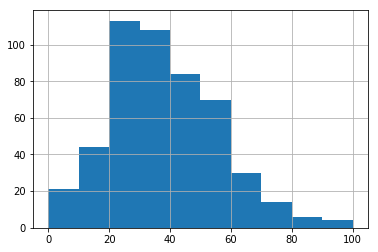

In [8]:
display(d.prop_saida.describe())
d.prop_saida.hist();

Parece que a partir do percentil 75 a _coisa é feia_ pois mais da metade dos professores saíram. 

Onde ficam essas escolas?

count   494.00
mean     23.20
std      15.76
min       1.00
10%       6.00
25%      11.00
50%      19.00
75%      32.00
90%      46.00
max      83.00
Name: CO_PESSOA_FISICA, dtype: float64

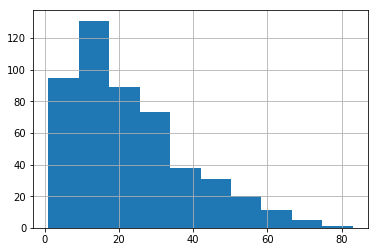

In [9]:
display(d.CO_PESSOA_FISICA.describe([.1,.25,.50,.75,.9]));
d.CO_PESSOA_FISICA.hist();

In [10]:
import folium

In [11]:
lclz_praca_3_poderes = [-15.7994, -47.8613]
map = folium.Map(location=lclz_praca_3_poderes, zoom_start=10)
locations = d.loc[d.CO_PESSOA_FISICA >= 7][['LAT', 'LONG']].head(20)
locationlist = locations.values.tolist()

In [12]:
display(d.loc[d.CO_PESSOA_FISICA >= 7].head(20))
locationlist


CO_ENTIDADE  target  CO_PESSOA_FISICA    LAT   LONG                  dcr  \
39      53001664   12.00                12 -15.74 -47.90            Brasília*   
142     53004299   12.00                13 -15.82 -48.09           Taguatinga   
466     53015541    9.00                10 -15.90 -47.78         Riacho Fundo   
267     53007727   10.00                12 -15.81 -48.10             Jardim**   
139     53004248   14.00                17 -15.81 -48.10           Taguatinga   
162     53005201    9.00                11 -15.61 -48.12           Brazlândia   
3       53000846    8.00                10 -15.81 -47.90            Brasília*   
363     53009312   15.00                19 -15.85 -47.95              Paranoá   
458     53014588   15.00                20 -15.91 -47.76         Riacho Fundo   
26      53001524    6.00                 8 -15.74 -47.89            Brasília*   
471     53016220   12.00                16 -15.68 -48.21           Brazlândia   
313     53008413   14.00                19 -15.84 -47.97   Núcleo Bandeirante   
145     53004345    8.00                11 -15.83 -48.09           Taguatinga   
20      53001460    8.00                11 -15.78 -47.88            Brasília*   
46      53001737    8.00                11 -15.83 -47.90            Brasília*   
472     53016378   13.00                18 -15.77 -47.78             Lago Sul   
160     53005171    5.00                 7 -15.70 -48.20           Brazlândia   
465     53015517   12.00                17 -15.66 -48.19           Brazlândia   
151     53004990   16.00                23 -15.85 -48.11           Brazlândia   
276     53007816   11.00                16 -15.83 -48.10             Jardim**   

                      NO_ENTIDADE  CO_ORGAO_REGIONAL  prop_saida  
39                  CEF 316 NORTE                  1      100.00  
142          CEF 21 DE TAGUATINGA                  3       92.31  
466       CEI 03 DE SAO SEBASTIAO                 18       90.00  
267            EC 12 DE CEILANDIA                  8       83.33  
139           EC 42 DE TAGUATINGA                  3       82.35  
162     EC POLO AGRICOLA DA TORRE                  4       81.82  
3              CEF 01 DE BRASILIA                  1       80.00  
363      CEF 01 DA CANDANGOLANDIA                  7       78.95  
458                 EC BELA VISTA                 18       75.00  
26                   EC 115 NORTE                  1       75.00  
471  EP DA NATUREZA DE BRAZLANDIA                  4       75.00  
313               CEF 05 DO GUARA                  9       73.68  
145           EC 53 DE TAGUATINGA                  3       72.73  
20                  CEF 104 NORTE                  1       72.73  
46                     EC 410 SUL                  1       72.73  
472             CEF 05 DO PARANOA                 17       72.22  
160          CED 04 DE BRAZLANDIA                  4       71.43  
465          CEI 02 DE BRAZLANDIA                  4       70.59  
151          CEF 01 DE BRAZLANDIA                  4       69.57  
276            EC 22 DE CEILANDIA                  8       68.75

[[-15.738902358999601, -47.8961599389996],
 [-15.817901298999601, -48.0929510429996],
 [-15.904125592999597, -47.7785940709996],
 [-15.8050091999996, -48.10484145499972],
 [-15.8064864849996, -48.09525081599961],
 [-15.609698454999599, -48.1223619759996],
 [-15.8134506469996, -47.899915633999605],
 [-15.8498777069996, -47.9501539469996],
 [-15.913146797999596, -47.7556934339996],
 [-15.7414110899996, -47.892307356999595],
 [-15.6790440299996, -48.2054488299996],
 [-15.8438864469996, -47.97246563899961],
 [-15.8318985429996, -48.08885317099961],
 [-15.7753419789996, -47.8831179469996],
 [-15.8264468869996, -47.90422259599961],
 [-15.768799452999597, -47.7831692639996],
 [-15.700134967999599, -48.2019363849996],
 [-15.659185897999599, -48.194383589999596],
 [-15.8506638219996, -48.1136286529996],
 [-15.832654795999598, -48.102884660999614]]

Pesquisei essas localizações no Google Maps e as algumas localizações não foram exatas mas deram uma aproximação aceitável (o pior caso ficou 6 quarteirões de distância).

In [14]:
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(map)
map.save('mapa.html')
map

Pontos de interessantes:
- Como explicar as saídas de escolas do Plano Piloto (Brasília)? Seriam elas exceções? 

Vamos plotar um mapa de calor das 50 piores e ver o que acontece.

In [15]:
#vamos tirar o 100% porque deve ter acontecido alguma coisa com essa escola
data = d.loc[(d.CO_PESSOA_FISICA >= 7) & (d.prop_saida < 100)][['LAT', 'LONG', 'prop_saida']].head(50).values.tolist()


In [17]:
from folium.plugins import HeatMap
m = folium.Map(lclz_praca_3_poderes)
HeatMap(data).add_to(m)
m.save('mapa.html')
m

Mais ou menos como esperado:
    - algumas áreas populosas e mais afastadas do centro estão bem destacadas.
    - Não esperava que o centro de Brasília fosse ter tanto destaque.
    
Assim temos algumas pistas que renda nas imediações nao tem muito a ver (Plano Pilo e Lago Sul). Vamos comprovar  
    

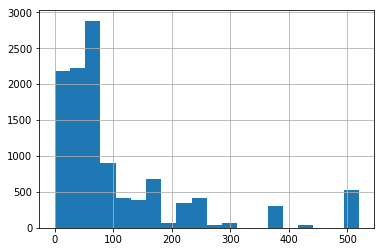

In [18]:
model_vars.MAX_qtd_dom_renda_max_per_mais_5sm.hist(bins=20)

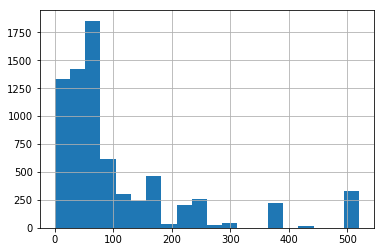

In [19]:
model_vars.loc[model_vars.target == 0].MAX_qtd_dom_renda_max_per_mais_5sm.hist(bins=20);

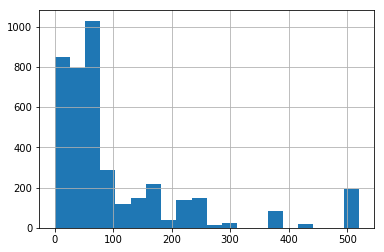

In [20]:
model_vars.loc[model_vars.target == 1].MAX_qtd_dom_renda_max_per_mais_5sm.hist(bins=20);

In [21]:
model_vars[['MAX_qtd_dom_renda_max_per_mais_5sm','target']].corr()

MAX_qtd_dom_renda_max_per_mais_5sm  target
MAX_qtd_dom_renda_max_per_mais_5sm                                1.00   -0.01
target                                                           -0.01    1.00

A correlação diz aquilo que pode-se ver nos gráficos: a renda menor influencia muito pouco na mudança de escola.

#### Vamos ver todas as correlações com a target

In [22]:
cols_alta_correlacao =[]
for l in model_vars.drop('PROF_CO_PESSOA_FISICA',axis=1).set_index(['CO_PESSOA_FISICA','CO_ENTIDADE']).corr()[['target']].sort_values('target',ascending=False).reset_index().itertuples():
    display(str(l[1]) + ' ' + str(l[2]))
    if l[2] < -0.02 or l[2] > 0.02:
        cols_alta_correlacao.append(l[1])

'target 1.0'

'SUM_TURMA_IN_DISC_CIENCIAS 0.09261222130543663'

'SUM_TURMA_IN_TARDE 0.08005528104138582'

'MIN_TURMA_NU_DURACAO_TURMA 0.07182087175945935'

'IN_COMUM_FUND_AF 0.06650883071004288'

'MIN_TURMA_NU_DIAS_ATIVIDADE 0.056514520591229654'

'MAX_TURMA_NU_DURACAO_TURMA 0.05462160505634562'

'MAX_TURMA_NU_DIAS_ATIVIDADE 0.05160206579284069'

'IN_FUNDAMENTAL_CICLOS 0.047974537578467695'

'SUM_TURMA_IN_REGULAR 0.04488581753181263'

'SUM_TURMA_IN_DISC_GEOGRAFIA 0.044549617788217095'

'IN_ESGOTO_FOSSA 0.04440937919045113'

'SUM_TURMA_IN_DISC_LINGUA_INDIGENA 0.04345842553350792'

'SUM_TURMA_IN_DISC_LINGUA_FRANCES 0.04345552940387816'

'SUM_TURMA_IN_DISC_LINGUA_OUTRA 0.04315504599601616'

'SUM_TURMA_IN_DISC_ARTES 0.041380353525988296'

'SUM_TURMA_IN_DISC_HISTORIA 0.04135571967322635'

'SUM_TURMA_IN_DISC_OUTRAS 0.04106790135608206'

'SUM_TURMA_IN_DISC_LIBRAS 0.04089972999164004'

'LAT 0.040247586843958696'

'SUM_TURMA_IN_DISC_LINGUA_INGLES 0.040223397435667975'

'SUM_TURMA_IN_DISC_MATEMATICA 0.03825206326261129'

'SUM_TURMA_IN_DISC_LINGUA_PORTUGUESA 0.03794268090683334'

'MIN_qtd_alugados 0.03685350180922534'

'SUM_TURMA_IN_DISC_EDUCACAO_FISICA 0.0363860517852543'

'SUM_TURMA_IN_MAIS_EDUCACAO 0.035523042452695996'

'TP_ATIVIDADE_COMPLEMENTAR 0.03267320996098882'

'SUM_TURMA_IN_DISC_INFORMATICA_COMPUTACAO 0.031734601596416424'

'SUM_TURMA_IN_DISC_ENSINO_RELIGIOSO 0.031325711833753274'

'ALUNO_COUNT_CO_PESSOA_FISICA 0.03084300084469101'

'SUM_TURMA_IN_DIA_SEMANA_SEXTA 0.02896472768694154'

'SUM_TURMA_NU_DURACAO_TURMA 0.027196425988963605'

'SUM_TURMA_IN_DIA_SEMANA_QUARTA 0.02710463170198497'

'MIN_qtd_quitados 0.025016739008055896'

'MIN_renda_media_dom 0.023329060432318686'

'SUM_TURMA_IN_DIA_SEMANA_TERCA 0.023238682065033243'

'SUM_TURMA_NU_DIAS_ATIVIDADE 0.02305351284513054'

'SUM_TURMA_IN_DIA_SEMANA_SEGUNDA 0.022859504406993605'

'SUM_TURMA_IN_DIA_SEMANA_QUINTA 0.022475408709817304'

'MIN_qtd_pessoas_vizinhos 0.02099274416541413'

'MIN_qtd_dom_vizinhos 0.02032420899821386'

'MIN_qtd_domicilios 0.01956839423396525'

'MIN_qtd_pessoas 0.019561983065471113'

'IN_SALA_LEITURA 0.019347637273053865'

'IN_COMUM_FUND_AI 0.018719484671661818'

'IN_PATIO_COBERTO 0.018618351179201433'

'MIN_qtd_mulheres 0.01822088018798007'

'MIN_qtd_dom_renda_per_cap_abx_1sm_vizinhos 0.017526425519475454'

'NU_EQUIP_RETROPROJETOR_PER_MATRICULA 0.01679031216674425'

'MIN_qtd_mulheres_resp 0.016647480038282987'

'MIN_qtd_pss_abx_12 0.016162116849590565'

'NUM_DD_AULAS 0.015504199814631088'

'MIN_qtd_dom_renda_per_cap_abx_1sm 0.015477286235351502'

'IN_COMUM_EJA_FUND 0.015244383278982218'

'CO_ORGAO_REGIONAL 0.01461218293564707'

'TP_LOCALIZACAO 0.014328682737619669'

'MIN_ALUNO_MEAN_IN_TERRA_NATAL 0.014262821633512566'

'IN_ALMOXARIFADO 0.013992539976706792'

'IN_SALA_ATENDIMENTO_ESPECIAL 0.01310797437115466'

'MAX_ALUNO_MEAN_IN_ONIBUS 0.012837490196809706'

'MAX_qtd_cedidos 0.012345983641812934'

'NU_EQUIP_FOTO_PER_MATRICULA 0.011478929038461027'

'SUM_TURMA_IN_ESPECIAL_EXCLUSIVA 0.009683974799610364'

'NU_EQUIP_DVD_PER_MATRICULA 0.008422843959652206'

'NU_EQUIP_IMPRESSORA_MULT_PER_MATRICULA 0.008364884618625836'

'MAX_qtd_mulheres_resp 0.008274141962498408'

'SUM_TURMA_IN_PROFISSIONALIZANTE 0.008266301692308254'

'IN_BANHEIRO_CHUVEIRO 0.00815192753643313'

'MAX_ALUNO_MEAN_IN_TERRA_NATAL 0.008005163530783897'

'MIN_qtd_pss_acima_65 0.007400185506124178'

'IN_EQUIP_IMPRESSORA_MULT 0.007125830985418084'

'NU_EQUIP_VIDEOCASSETE_PER_MATRICULA 0.006871944717912859'

'IN_EQUIP_RETROPROJETOR 0.0065748430013997956'

'MIN_qtd_dom_renda_max_per_mais_5sm 0.005330517536381227'

'MAX_qtd_dom_renda_per_cap_abx_1sm_vizinhos 0.005030934893731763'

'MAX_qtd_dom_renda_per_cap_abx_1sm 0.004583543968825558'

'MIN_ALUNO_MEAN_IN_ONIBUS 0.0035630178064839264'

'NU_EQUIP_RETROPROJETOR 0.0035578148391586565'

'NU_EQUIP_PARABOLICA_PER_MATRICULA 0.0033040565677306456'

'MIN_DISTANCIA_SETOR_ENTIDADE 0.002981877064258401'

'MAX_ALUNO_MEAN_IN_H0MEM 0.0026598630030241492'

'NU_EQUIP_TV_PER_MATRICULA 0.0024834565511917964'

'SUM_TURMA_IN_EJA 0.0022310351619782144'

'MIN_qtd_em_aquisicao 0.0017953028153837663'

'SUM_TURMA_NU_MATRICULAS 0.0014140159128319077'

'IN_COMUM_PRE 0.0012812761147377649'

'NU_EQUIP_IMPRESSORA_MULT 0.0012796440721678719'

'MAX_qtd_pss_abx_12 0.0011136236083516366'

'MIN_TURMA_NU_MATRICULAS 0.0006904403919098164'

'MAX_qtd_pss_acima_90 -0.0009050896953769108'

'IN_LABORATORIO_CIENCIAS -0.0010716587987392365'

'MIN_ALUNO_MEAN_IN_H0MEM -0.0014080277645395006'

'NU_EQUIP_VIDEOCASSETE -0.0023717613245126433'

'NU_EQUIP_IMPRESSORA_PER_MATRICULA -0.0030093009623367744'

'LONG -0.0036440092211959116'

'IN_BIBLIOTECA -0.003671319454451185'

'SUM_qtd_dom_renda_per_cap_abx_1sm -0.003999218746006085'

'SUM_qtd_dom_renda_per_cap_abx_1sm_vizinhos -0.004444225159081135'

'MAX_TURMA_NU_MATRICULAS -0.006068629919032694'

'MAX_qtd_dom_renda_max_per_mais_5sm -0.0064512343403219955'

'NU_EQUIP_FOTO -0.006610767189514641'

'IN_DESPENSA -0.006968101221948884'

'SUM_qtd_cedidos -0.007287968415365244'

'IN_FINAL_SEMANA -0.007596126839695549'

'MIN_qtd_pss_acima_90 -0.007815043469134876'

'IN_QUADRA_ESPORTES_COBERTA -0.01016047763704136'

'NU_EQUIP_SOM_PER_MATRICULA -0.010309065791535977'

'IN_PARQUE_INFANTIL -0.011050962935593798'

'SUM_qtd_dom_renda_max_per_mais_5sm -0.011141657275385622'

'MAX_renda_media_dom -0.011200406832466345'

'MIN_qtd_cedidos -0.011642247942126063'

'NU_EQUIP_COPIADORA_PER_MATRICULA -0.011790895646366836'

'SUM_qtd_pss_acima_90 -0.01186467759885337'

'PC_SALAS_UTILIZADAS -0.012047851702221522'

'SUM_qtd_pss_abx_12 -0.01276301427557049'

'MAX_qtd_pss_acima_65 -0.013940316817964609'

'IN_EJA -0.014280624450460723'

'NU_EQUIP_SOM -0.014947365198641384'

'SUM_qtd_alugados -0.014961380028733878'

'IN_BIBLIOTECA_SALA_LEITURA -0.015527346024682899'

'MAX_DISTANCIA_SETOR_ENTIDADE -0.015788005223035348'

'SUM_qtd_pss_acima_65 -0.016419195131611077'

'NU_EQUIP_TV -0.016599184983508507'

'IN_ESP_EXCLUSIVA_FUND_AI -0.01745519660787506'

'MAX_qtd_alugados -0.017726300573150052'

'NU_COMP_ALUNO_PER_MATRICULA -0.01783872320303217'

'SUM_qtd_mulheres_resp -0.017993029941834538'

'SUM_qtd_pessoas_vizinhos -0.019055957711275905'

'SUM_qtd_pessoas -0.01920767655638484'

'SUM_qtd_dom_vizinhos -0.019290181271040093'

'SUM_qtd_domicilios -0.019297138033997605'

'IN_PATIO_DESCOBERTO -0.019374218621667025'

'SUM_qtd_quitados -0.019448329308482233'

'SUM_TURMA_IN_DISC_ESTUDOS_SOCIAIS -0.01948092605197646'

'SUM_qtd_mulheres -0.019654414497978487'

'IN_QUADRA_ESPORTES_DESCOBERTA -0.019931370014030655'

'IN_BANHEIRO_EI -0.019951147460941926'

'NU_EQUIP_MULTIMIDIA_PER_MATRICULA -0.02001187891787649'

'NU_EQUIP_DVD -0.020368452345219355'

'NU_EQUIP_FAX_PER_MATRICULA -0.020422433107424063'

'SUM_TURMA_IN_DISC_LINGUA_ESPANHOL -0.020806669451978493'

'IN_QUADRA_ESPORTES -0.021680769685387288'

'MAX_qtd_quitados -0.02199950751378335'

'SUM_TURMA_IN_DISC_FISICA -0.022608034176996004'

'SUM_TURMA_IN_DISC_SOCIOLOGIA -0.02276357479797977'

'MAX_qtd_pessoas -0.02381989323057228'

'MIN_ALUNO_MEAN_NU_IDADE -0.02385543093081482'

'MAX_qtd_pessoas_vizinhos -0.023978615788047174'

'QTD_CO_SETOR_CENSITARIO -0.024311427512385506'

'IN_DEPENDENCIAS_PNE -0.024385730769641553'

'MAX_qtd_domicilios -0.025105403636834375'

'MAX_qtd_dom_vizinhos -0.025105403636834375'

'NU_COMPUTADOR_PER_MATRICULA -0.025813507420059396'

'SUM_TURMA_IN_DISC_QUIMICA -0.02585702648596223'

'SUM_TURMA_IN_DISC_BIOLOGIA -0.02601586831875183'

'IN_COMUM_MEDIO_MEDIO -0.027088049522479028'

'MAX_qtd_mulheres -0.027495169007851004'

'SUM_TURMA_IN_DISC_EST_SOCIAIS_SOCIOLOGIA -0.02775278499317765'

'NU_COMP_ALUNO -0.028138702626557155'

'IN_ESPECIAL_EXCLUSIVA -0.028673886252537896'

'SUM_TURMA_IN_DISC_FILOSOFIA -0.02872741013300437'

'NU_EQUIP_PARABOLICA -0.029441944536583838'

'NU_COMP_ADMINISTRATIVO_PER_MATRICULA -0.029488692598691826'

'NU_PROFESSORES_PER_MATRICULA -0.02968215261785392'

'IN_AREA_VERDE -0.029951037558630066'

'IN_REFEITORIO -0.0304477135704239'

'IN_LABORATORIO_INFORMATICA -0.030489587552969186'

'IN_EQUIP_VIDEOCASSETE -0.03069540215442024'

'IN_BANHEIRO_PNE -0.031526661832979266'

'MAX_ALUNO_MEAN_NU_IDADE -0.0318234475897033'

'IN_EQUIP_FOTO -0.03248514227176294'

'IN_EQUIP_PARABOLICA -0.0337718123490843'

'NU_EQUIP_FAX -0.03684296301334032'

'IN_EQUIP_FAX -0.038688622760372667'

'NU_EQUIP_IMPRESSORA -0.0395901222647585'

'NU_SALAS_EXISTENTES_PER_MATRICULA -0.04251077774743626'

'NU_FUNCIONARIOS_PER_MATRICULA -0.043136660035038736'

'IN_ESGOTO_REDE_PUBLICA -0.04440937919045113'

'NU_SALAS_UTILIZADAS_PER_MATRICULA -0.045229645883492375'

'NU_EQUIP_COPIADORA -0.04813855777841364'

'SUM_TURMA_IN_MANHA -0.048311765161940266'

'SUM_qtd_em_aquisicao -0.05533856182539963'

'NU_COMP_ADMINISTRATIVO -0.05987242895373029'

'IN_AUDITORIO -0.060239851827722006'

'MAX_qtd_em_aquisicao -0.06743679322983907'

'NU_TTL_MATRICLAS -0.06973346556572664'

'NU_EQUIP_MULTIMIDIA -0.06974019590056026'

'NU_COMPUTADOR -0.07017789405131092'

'NU_SALAS_EXISTENTES -0.08505439526428835'

'NU_SALAS_UTILIZADAS -0.08750181181646156'

'NU_FUNCIONARIOS -0.10104218941789399'

### Uma modelagem com Random Forest para verificar as features mais importantes.

array([[1425,  441],
       [ 609,  391]])

Base de TREINO
             precision    recall  f1-score   support

      False       0.92      0.96      0.94      5483
       True       0.92      0.85      0.88      3112

avg / total       0.92      0.92      0.92      8595

Base de TESTE
             precision    recall  f1-score   support

      False       0.70      0.76      0.73      1866
       True       0.47      0.39      0.43      1000

avg / total       0.62      0.63      0.62      2866



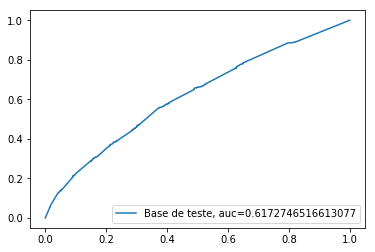

Feature ranking:
1. feature MIN_ALUNO_MEAN_NU_IDADE (0.107470)
2. feature MAX_ALUNO_MEAN_NU_IDADE (0.106204)
3. feature ALUNO_COUNT_CO_PESSOA_FISICA (0.095308)
4. feature SUM_TURMA_IN_MANHA (0.020160)
5. feature SUM_qtd_em_aquisicao (0.016604)
6. feature SUM_TURMA_IN_TARDE (0.016371)
7. feature NU_TTL_MATRICLAS (0.015794)
8. feature NU_COMPUTADOR_PER_MATRICULA (0.015765)
9. feature LAT (0.015400)
10. feature NU_FUNCIONARIOS (0.015331)
11. feature SUM_TURMA_NU_DURACAO_TURMA (0.015269)
12. feature NU_FUNCIONARIOS_PER_MATRICULA (0.015263)
13. feature NU_PROFESSORES_PER_MATRICULA (0.015153)
14. feature NU_COMP_ADMINISTRATIVO_PER_MATRICULA (0.014141)
15. feature NU_COMPUTADOR (0.013942)
16. feature QTD_CO_SETOR_CENSITARIO (0.013803)
17. feature NU_SALAS_UTILIZADAS_PER_MATRICULA (0.013747)
18. feature SUM_TURMA_IN_MAIS_EDUCACAO (0.013633)
19. feature MAX_qtd_em_aquisicao (0.013311)
20. feature NU_SALAS_EXISTENTES_PER_MATRICULA (0.013036)
21. feature NU_EQUIP_MULTIMIDIA_PER_MATRICULA (0.01290

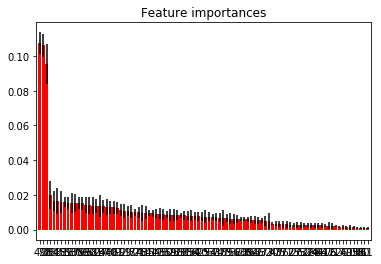

In [23]:
a = processa_tudo(model_vars[cols_alta_correlacao])

array([[1428,  438],
       [ 618,  382]])

Base de TREINO
             precision    recall  f1-score   support

      False       0.92      0.96      0.94      5483
       True       0.92      0.85      0.89      3112

avg / total       0.92      0.92      0.92      8595

Base de TESTE
             precision    recall  f1-score   support

      False       0.70      0.77      0.73      1866
       True       0.47      0.38      0.42      1000

avg / total       0.62      0.63      0.62      2866



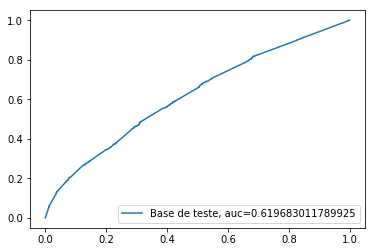

Feature ranking:
1. feature ALUNO_COUNT_CO_PESSOA_FISICA (0.170528)
2. feature MAX_ALUNO_MEAN_NU_IDADE (0.167958)
3. feature MIN_ALUNO_MEAN_NU_IDADE (0.160589)
4. feature LAT (0.087591)
5. feature NU_TTL_MATRICLAS (0.082770)
6. feature NU_FUNCIONARIOS (0.081225)
7. feature SUM_qtd_em_aquisicao (0.078156)
8. feature NU_COMPUTADOR_PER_MATRICULA (0.078091)
9. feature SUM_TURMA_IN_MANHA (0.048767)
10. feature SUM_TURMA_IN_TARDE (0.044324)


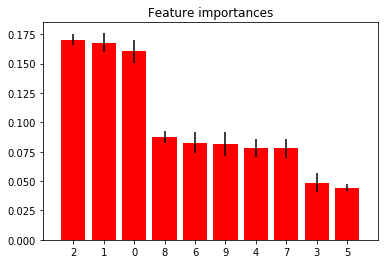

In [24]:
b = processa_tudo(model_vars[a[0][:10]+ ['target']])

array([[1381,  485],
       [ 645,  355]])

Base de TREINO
             precision    recall  f1-score   support

      False       0.86      0.92      0.89      5483
       True       0.84      0.74      0.79      3112

avg / total       0.85      0.86      0.85      8595

Base de TESTE
             precision    recall  f1-score   support

      False       0.68      0.74      0.71      1866
       True       0.42      0.35      0.39      1000

avg / total       0.59      0.61      0.60      2866



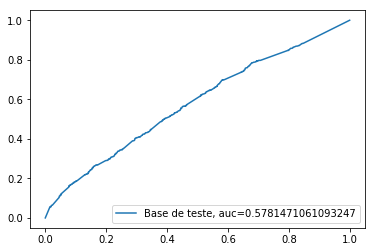

Feature ranking:
1. feature MAX_ALUNO_MEAN_NU_IDADE (0.353423)
2. feature MIN_ALUNO_MEAN_NU_IDADE (0.339134)
3. feature ALUNO_COUNT_CO_PESSOA_FISICA (0.307443)


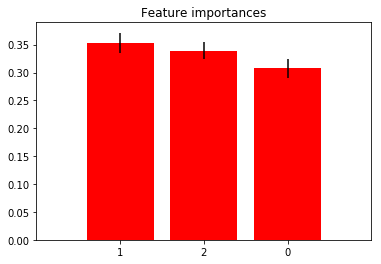

In [25]:
b = processa_tudo(model_vars[b[0][:3]+ ['target']])

<img src='https://media.giphy.com/media/3o6Mb2JwJPVu7VMDSw/giphy.gif'/>

#### Esse resultado está muito ruim (claramente com _overfitting_), vamos fazer uns ajustes com cross validation e grid search.

RandomizedSearchCV took 2.29 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.582 (std: 0.014)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 7, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.568 (std: 0.016)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 6, 'min_samples_split': 3}

Model with rank: 3
Mean validation score: 0.567 (std: 0.021)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 8, 'min_samples_split': 10}

GridSearchCV took 23.77 seconds for 216 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.579 (std: 0.023)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}

Model with rank: 1
Mean validation score:

array([[873, 153],
       [157, 873]])

Base de TREINO
             precision    recall  f1-score   support

      False       0.57      0.58      0.58      3086
       True       0.58      0.57      0.57      3082

avg / total       0.58      0.58      0.58      6168

Base de TESTE
             precision    recall  f1-score   support

      False       0.85      0.85      0.85      1026
       True       0.85      0.85      0.85      1030

avg / total       0.85      0.85      0.85      2056



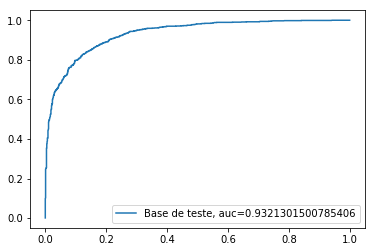

Feature ranking:
1. feature ALUNO_COUNT_CO_PESSOA_FISICA (0.035478)
2. feature MIN_ALUNO_MEAN_NU_IDADE (0.028214)
3. feature SUM_TURMA_NU_MATRICULAS (0.022145)
4. feature SUM_TURMA_IN_TARDE (0.020109)
5. feature MIN_ALUNO_MEAN_IN_H0MEM (0.018700)
6. feature MAX_ALUNO_MEAN_IN_H0MEM (0.018501)
7. feature NU_COMP_ADMINISTRATIVO (0.017985)
8. feature MAX_ALUNO_MEAN_NU_IDADE (0.017009)
9. feature MAX_DISTANCIA_SETOR_ENTIDADE (0.015327)
10. feature MAX_TURMA_NU_MATRICULAS (0.015277)
11. feature NU_EQUIP_MULTIMIDIA (0.015107)
12. feature NU_TTL_MATRICLAS (0.015091)
13. feature NU_COMPUTADOR (0.014572)
14. feature SUM_TURMA_IN_MANHA (0.014442)
15. feature NU_EQUIP_RETROPROJETOR_PER_MATRICULA (0.013531)
16. feature MIN_TURMA_NU_MATRICULAS (0.013076)
17. feature MAX_ALUNO_MEAN_IN_TERRA_NATAL (0.012647)
18. feature NU_PROFESSORES_PER_MATRICULA (0.012228)
19. feature SUM_qtd_cedidos (0.011941)
20. feature NU_SALAS_UTILIZADAS (0.011607)
21. feature MAX_qtd_pss_abx_12 (0.010943)
22. feature NU_EQUIP

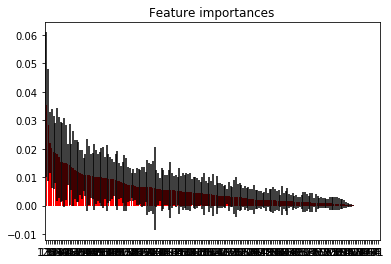

In [30]:
cols_drop = ['PROF_CO_PESSOA_FISICA','NO_ENTIDADE','dcr','LAT','LONG']
a = processa_tudo(model_vars.drop(cols_drop,axis=1).set_index(['CO_PESSOA_FISICA','CO_ENTIDADE']),True),

In [31]:
fi = a[0][0]
clf = a[0][1]

RandomizedSearchCV took 3.66 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.601 (std: 0.020)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 9, 'min_samples_split': 7}

Model with rank: 2
Mean validation score: 0.587 (std: 0.036)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}

Model with rank: 3
Mean validation score: 0.585 (std: 0.026)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 8, 'min_samples_split': 5}

Model with rank: 3
Mean validation score: 0.585 (std: 0.020)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 8, 'min_samples_split': 7}

GridSearchCV took 29.93 seconds for 216 candidate parameter settings.
Model with rank: 1
Mean validation score:

array([[991,  35],
       [ 40, 990]])

Base de TREINO
             precision    recall  f1-score   support

      False       0.56      0.57      0.57      3086
       True       0.57      0.56      0.56      3082

avg / total       0.56      0.56      0.56      6168

Base de TESTE
             precision    recall  f1-score   support

      False       0.96      0.97      0.96      1026
       True       0.97      0.96      0.96      1030

avg / total       0.96      0.96      0.96      2056



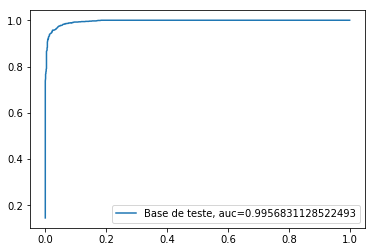

Feature ranking:
1. feature MAX_ALUNO_MEAN_NU_IDADE (0.048634)
2. feature MIN_ALUNO_MEAN_NU_IDADE (0.042083)
3. feature MAX_ALUNO_MEAN_IN_H0MEM (0.041435)
4. feature MIN_ALUNO_MEAN_IN_H0MEM (0.037651)
5. feature SUM_TURMA_NU_MATRICULAS (0.036886)
6. feature MAX_ALUNO_MEAN_IN_TERRA_NATAL (0.034592)
7. feature ALUNO_COUNT_CO_PESSOA_FISICA (0.033058)
8. feature MIN_ALUNO_MEAN_IN_TERRA_NATAL (0.030249)
9. feature MAX_TURMA_NU_MATRICULAS (0.029335)
10. feature NU_PROFESSORES_PER_MATRICULA (0.027801)
11. feature MIN_TURMA_NU_MATRICULAS (0.027115)
12. feature SUM_TURMA_IN_MANHA (0.025671)
13. feature SUM_TURMA_IN_DISC_CIENCIAS (0.024146)
14. feature NU_COMPUTADOR_PER_MATRICULA (0.022111)
15. feature MAX_DISTANCIA_SETOR_ENTIDADE (0.021933)
16. feature NU_EQUIP_MULTIMIDIA_PER_MATRICULA (0.021616)
17. feature NU_FUNCIONARIOS (0.019995)
18. feature NU_SALAS_UTILIZADAS_PER_MATRICULA (0.019774)
19. feature NU_TTL_MATRICLAS (0.019481)
20. feature NU_COMPUTADOR (0.018726)
21. feature SUM_TURMA_IN_DIS

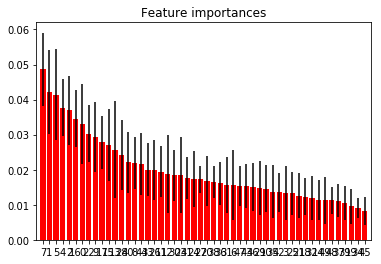

In [32]:
md_b = model_vars.set_index(['CO_PESSOA_FISICA','CO_ENTIDADE'])[fi[:50] + ['target']]
b = processa_tudo(md_b,True),

In [33]:
clf = b[0][1]

### Consideracoes:
01. Com Grid Search a performance melhora consideravelmente.

02. O resultado retirando uma amostra da base para balancear (com o ```sample``` do pandas ) ficou estranho, resultado muito bom no teste e ruim no treino e quando aplica-se a todo o dataset.

### Com esse resultado estamos assim:
<!--
<img src='img/homer-simpson-woohoo-gif-6.gif'/>
-->

## Primeiro, vamos analisar quando o classificador erra.

In [34]:
y_true = md_b.target
X = md_b.drop('target',axis=1).values
y_pred = clf.predict(X)
lc = [c for y1,y2,c in zip(y_true,y_pred,md_b.index) if y1 != y2]

In [ ]:
1 - len(lc)/len(md_b.index)